This is an machine learning uni project in the Universität Potsdam. 
- Tutor: Chenpo Hu
- Date: 26.09.2018 



# 1. Data Loading & Data Understanding

## 1.1 Load and add Header Row 
- Check Feature representaion as well: sparse etc. 

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import StratifiedShuffleSplit
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from jupyterthemes import jtplot

#jtplot.style('chesterish',grid=False)

# load data 
#df = pd.read_csv(r'C:\Users\chenp\Desktop\00_CS_Master_Kurse_SS2018\ML1_IDA\P6_V\caravan.train.csv')

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Info = pd.read_csv(r'C:\Users\chenp\Desktop\00_CS_Master_Kurse_SS2018\ML1_IDA\P6_V\caravan.info.csv', sep='\t')

print Info

#add a header row to the training data (C1-C86); define the first 3/4 training data as our Train data;
Train = pd.read_csv(r'C:\Users\chenp\Desktop\00_CS_Master_Kurse_SS2018\ML1_IDA\P6_V\caravan.train.csv', 
                    sep='\t', names = ["C1MOSTYPE", "C2MAANTHUI", "C3MGEMOMV","C4MGEMLEEF", "C5MOSHOOFD", 
                                       "C6MGODRK","C7MGODPR", "C8MGODOV", "C9MGODGE","C10MRELGE", "C11MRELSA",
                                       "C12MRELOV","C13MFALLEEN", "C14MFGEKIND", "C15MFWEKIND","C16MOPLHOOG", "C17MOPLMIDD",
                                       "C18MOPLLAAG","C19MBERHOOG", "C20MBERZELF", "C21MBERBOER","C22MBERMIDD", 
                                       "C23MBERARBG", "C24MBERARBO","C25MSKA", "C26MSKB1", "C27MSKB2","C28MSKC", 
                                       "C29MSKD", "C30MHHUUR","C31MHKOOP", "C32MAUT1", "C33MAUT2","C34MAUT0", "C35MZFONDS",
                                       "C36MZPART","C37MINKMthirty", "C38MINK3045", "C39MINK4575","C40MINK7512", "C41MINK123M",
                                       "C42MINKGEM","C43MKOOPKLA", "C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND", "C65AWAPART", 
                                       "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND", "C86CARAVAN"])


#add a header row to the training data (C1-C85); define the last 1/4 training data as our Test data;
#Test = pd.read_csv(r'C:\Users\chenp\Desktop\00_CS_Master_Kurse_SS2018\ML1_IDA\P6_V\caravan.train.csv', sep='\t', names = ["C1_MOSTYPE", "C2_MAANTHUI", "C3_MGEMOMV","C4_MGEMLEEF", "C5_MOSHOOFD", "C6_MGODRK","C7_MGODPR", "C8_MGODOV", "C9_MGODGE","C10_MRELGE", "C11_MRELSA", "C12_MRELOV","C13_MFALLEEN", "C14_MFGEKIND", "C15_MFWEKIND","C16_MOPLHOOG", "C17_MOPLMIDD", "C18_MOPLLAAG","C19_MBERHOOG", "C20_MBERZELF", "C21_MBERBOER","C22_MBERMIDD", "C23_MBERARBG", "C24_MBERARBO","C25_MSKA", "C26_MSKB1", "C27_MSKB2","C28_MSKC", "C29_MSKD", "C30_MHHUUR","C31_MHKOOP", "C32_MAUT1", "C33_MAUT2","C34_ MAUT0", "C35_MZFONDS", "C36_MZPART","C37_MINKM30", "C38_MINK3045", "C39_MINK4575","C40_MINK7512", "C41_MINK123M", "C42_MINKGEM","C43_MKOOPKLA", "C44_PWAPART", "C45_PWABEDR","C46_PWALAND", "C47_PPERSAUT", "C48_PBESAUT","C49_PMOTSCO", "C50_PVRAAUT", "C51_PAANHANG","C52_PTRACTOR", "C53_PWERKT", "C54_PBROM","C55_PLEVEN", "C56_PPERSONG", "C57_PGEZONG","C58_PWAOREG", "C59_PBRAND", "C60_PZEILPL","C61_PPLEZIER", "C62_PFIETS", "C63_PINBOED","C64_PBYSTAND", "C65_AWAPART", "C66_AWABEDR","C67_AWALAND","C68_APERSAUT", "C69_ABESAUT", "C70_AMOTSCO","C71_AVRAAUT", "C72_AAANHANG", "C73_ATRACTOR","C74_AWERKT", "C75_ABROM", "C76_ALEVEN","C77_APERSONG", "C78_AGEZONG", "C79_AWAOREG","C80_ABRAND","C81_AZEILPL", "C82_APLEZIER", "C83_AFIETS","C84_AINBOED", "C85_ABYSTAND", "C86_CARAVAN"],skiprows=4366, nrows=1456)

#The orginal caravan.test.csv was renamed by me to caravan.output.csv
Output = pd.read_csv(r'C:\Users\chenp\Desktop\00_CS_Master_Kurse_SS2018\ML1_IDA\P6_V\caravan.output.csv', sep='\t', names = [
                                       "C1MOSTYPE", "C2MAANTHUI", "C3MGEMOMV","C4MGEMLEEF", "C5MOSHOOFD", 
                                       "C6MGODRK","C7MGODPR", "C8MGODOV", "C9MGODGE","C10MRELGE", "C11MRELSA",
                                       "C12MRELOV","C13MFALLEEN", "C14MFGEKIND", "C15MFWEKIND","C16MOPLHOOG", "C17MOPLMIDD",
                                       "C18MOPLLAAG","C19MBERHOOG", "C20MBERZELF", "C21MBERBOER","C22MBERMIDD", 
                                       "C23MBERARBG", "C24MBERARBO","C25MSKA", "C26MSKB1", "C27MSKB2","C28MSKC", 
                                       "C29MSKD", "C30MHHUUR","C31MHKOOP", "C32MAUT1", "C33MAUT2","C34MAUT0", "C35MZFONDS",
                                       "C36MZPART","C37MINKMthirty", "C38MINK3045", "C39MINK4575","C40MINK7512", "C41MINK123M",
                                       "C42MINKGEM","C43MKOOPKLA", "C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND", "C65AWAPART", 
                                       "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND", "C86CARAVAN"])

OutputdropM = Output[["C43MKOOPKLA", "C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND", "C65AWAPART", 
                                       "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND"]]
OutputselecdropM = Output[["C47PPERSAUT","C44PWAPART", "C61PPLEZIER", "C43MKOOPKLA","C59PBRAND","C64PBYSTAND","C58PWAOREG","C62PFIETS"]]

OutputdropM2 = Output[["C43MKOOPKLA", "C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND"]]

#view the 5 rows of the raw data in the training data and the testing data 
print "first 5 rows of Train are:\n", Train.head()
#print "first 5 rows of Test are:\n", Test.head()

#view the raw data of Train and Test
print "Train:\n" , Train
#print "Test:\n", Test
#print "TraindropM:\n", TraindropM
#scaler = preprocessing.StandardScaler().fit(Train)

c:\users\chenp\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


                            DATA DICTIONARY
0                Nr Name Description Domain
1         1 MOSTYPE Customer Subtype see L0
2        2 MAANTHUI Number of houses 1 � 10
3        3 MGEMOMV Avg size household 1 � 6
4                 4 MGEMLEEF Avg age see L1
5      5 MOSHOOFD Customer main type see L2
6            6 MGODRK Roman catholic see L3
7                   7 MGODPR Protestant ...
8                   8 MGODOV Other religion
9                      9 MGODGE No religion
10                        10 MRELGE Married
11                11 MRELSA Living together
12                 12 MRELOV Other relation
13                      13 MFALLEEN Singles
14   14 MFGEKIND Household without children
15      15 MFWEKIND Household with children
16         16 MOPLHOOG High level education
17       17 MOPLMIDD Medium level education
18        18 MOPLLAAG Lower level education
19                  19 MBERHOOG High status
20                 20 MBERZELF Entrepreneur
21                       21 MBER

## 1.2. Data Understanding: Data Exploration

### 1.2.1 Check Missing Values
If there is any missing values, then those missing values should be handled. But it turns out that there is no missing values. 

In [3]:
#check if there is null value in the raw training data and testing data or not:
print "sum of Null value in Train:", Train.isnull().sum().sum()

Train.info()
Output.info()

sum of Null value in Train: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
C1MOSTYPE         5822 non-null int64
C2MAANTHUI        5822 non-null int64
C3MGEMOMV         5822 non-null int64
C4MGEMLEEF        5822 non-null int64
C5MOSHOOFD        5822 non-null int64
C6MGODRK          5822 non-null int64
C7MGODPR          5822 non-null int64
C8MGODOV          5822 non-null int64
C9MGODGE          5822 non-null int64
C10MRELGE         5822 non-null int64
C11MRELSA         5822 non-null int64
C12MRELOV         5822 non-null int64
C13MFALLEEN       5822 non-null int64
C14MFGEKIND       5822 non-null int64
C15MFWEKIND       5822 non-null int64
C16MOPLHOOG       5822 non-null int64
C17MOPLMIDD       5822 non-null int64
C18MOPLLAAG       5822 non-null int64
C19MBERHOOG       5822 non-null int64
C20MBERZELF       5822 non-null int64
C21MBERBOER       5822 non-null int64
C22MBERMIDD       5822 non-null int64
C23MBERARBG       5822 non-

### 1.2.2 Check the data coding quality and data group internal correlation
- Motivation: If the Data is clean and reasonable coded, then the corelation of Religion 6_9 should be negative to each other, the same or similar for Relationship10_13, Children14_15,Education16_18,Job19_24,SocialClass24_29,HauseOwnership30_31,CarNumber32_34,Income37_41. Since those values can normally not exist at the same time. Thouse fields should actually be 
- Result: the data is not normally coded. Since thouse data fields belongs to the sociodemographic variables, which belongs to sensitive data of the customers. So those data are normally coded using some codeing methods. After online research I knows that they are ZIP encoded. So I would say that thouse sociodemographic variables are not helpful for the models, they would be noises, unless I can corruppt the coding. 

In [4]:
Religion6_9 = Train[['C6MGODRK','C7MGODPR', 'C8MGODOV', 'C9MGODGE']]

Relationship10_13 = Train[["C10MRELGE", "C11MRELSA", "C12MRELOV","C13MFALLEEN"]]

Children14_15 = Train[["C14MFGEKIND", "C15MFWEKIND"]]

Education16_18 = Train[["C16MOPLHOOG", "C17MOPLMIDD", "C18MOPLLAAG"]]

Job19_24 =  Train[["C19MBERHOOG", "C20MBERZELF", "C21MBERBOER","C22MBERMIDD", 
                                       "C23MBERARBG", "C24MBERARBO"]]

SocialClass24_29 = Train[["C24MBERARBO","C25MSKA", "C26MSKB1", "C27MSKB2","C28MSKC", 
                                       "C29MSKD"]]

HauseOwnership30_31 = Train[["C30MHHUUR","C31MHKOOP"]]

CarNumber32_34 =  Train[["C32MAUT1", "C33MAUT2","C34MAUT0"]]

Income37_41 = Train[["C37MINKMthirty", "C38MINK3045", "C39MINK4575","C40MINK7512", "C41MINK123M"]]

print Religion6_9 ,'\n', Relationship10_13, '\n', Children14_15,'\n', Education16_18, '\n',Job19_24,'\n',SocialClass24_29,'\n',HauseOwnership30_31,'\n',CarNumber32_34,'\n',Income37_41,'\n',Train[['C43MKOOPKLA']],'\n',Train[['C42MINKGEM']]

##Todo: Feature Representaition: Transform attributes, depending of model structure  For instance, linear model compute inner product of attributes and model parameters.  All attributes have to be numeric.  Larger attribute values: larger value of inner product  Categorial attributes, attributes without ordering, textual attributes have to be converted.

      C6MGODRK  C7MGODPR  C8MGODOV  C9MGODGE
0            0         5         1         3
1            1         4         1         4
2            0         4         2         4
3            2         3         2         4
4            1         4         1         4
5            0         5         0         5
6            2         2         0         5
7            0         7         0         2
8            0         1         3         6
9            3         5         0         2
10           1         4         1         4
11           1         3         2         4
12           1         4         1         4
13           0         5         0         4
14           0         6         1         2
15           0         7         0         2
16           0         6         0         3
17           0         5         0         4
18           2         4         0         3
19           0         2         0         7
20           0         6         0         3
21        

      C42MINKGEM
0              4
1              5
2              3
3              4
4              6
5              3
6              3
7              3
8              2
9              4
10             8
11             3
12             3
13             4
14             3
15             3
16             5
17             4
18             4
19             3
20             3
21             3
22             5
23             4
24             4
25             4
26             5
27             3
28             1
29             3
...          ...
5792           4
5793           6
5794           2
5795           3
5796           3
5797           7
5798           3
5799           3
5800           2
5801           4
5802           7
5803           4
5804           2
5805           4
5806           4
5807           4
5808           2
5809           2
5810           4
5811           4
5812           3
5813           4
5814           5
5815           4
5816           5
5817           3
5818          

### 1.2.3 Data/Feature correlation
#### 1.2.3.1 Data/Feature correlation of all data sets
This is also double check for 1.2.2: If the data of the sociodemographic variables are properly coded in the raw data, then the table should display lots of nagative -1 values for the sociodemographic variables.

In [5]:
Train.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#### 1.2.3.2 Data Feature correlation between C44-C85
- C44-C85:Since in this zone, there are three red line run through.

In [6]:
Train[["C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND", "C65AWAPART", "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND"]].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

### 1.3 Value Counts of CARAVAN
It is clear that our dataset is highly unbalanced with only 6.36% of observations actually buying the insurance.

y: 
0    5474
1     348
Name: C86CARAVAN, dtype: int64
Caravan Ratio: 6.36%


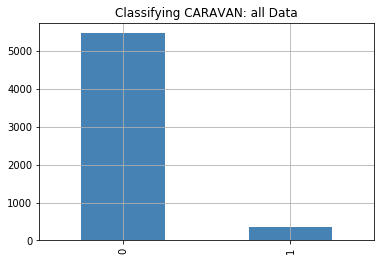

In [13]:
from __future__ import division

#y_Train_original.value_counts().plot(kind='bar', title='Classifying CARAVAN 2', color='steelblue', grid=True)
#print "y_Train: \n", y_Train_original.value_counts()
#print "\n"

#y_TestdropM2.value_counts().plot(kind='bar', title='Classifying CARAVAN', color='steelblue', grid=True)
#print "y_Test: \n",y_Test.value_counts()
#print "\n"
X = Train.drop(['C86CARAVAN'], axis=1)
y = Train['C86CARAVAN']

plt.subplot(1,1,1)
y.value_counts().plot(kind='bar', title='Classifying CARAVAN: all Data', color='steelblue', grid=True)
print "y: \n",y.value_counts()
print("Caravan Ratio: {:.2%}".format(348/5474))
#print float(format(), .02%)

# 2. Business Understanding 
Determination of target customers for Caravan insurance.
This is a Cross selling problem: Cross-selling is the action or practice of selling an additional product or service to an existing customer (https://en.wikipedia.org/wiki/Cross-selling).
- Benefit Item: Customer who would buy Caravan 
- To translate it into the data understanding, we care more about, if we could predict the "1" class correctly or not. Because the profit Item are "1" class. But as shown in 1.3, it is clear that our dataset is highly unbalanced with only 6.36% of observations actually buying the insurance

# 3. Preprocessing

## 3.1 Feature initial selection
- TraindropM: Apart from 'Purchasing Power Class', all sociodemographic variables derived from zip codes were discarded, because they did not add predictive power to the model.
- TraindropM2: since the "Contribution of policy" of group C44-C64 and "Number of policy" of groups  are highly correleted, so I would generate a second TraindropM2 datasets, which includes one of the groups. I choose to keep the "Contribution" group, since "number" are not a measure for the real value, for example, 10 car policies for VW may has less value that 1 car policy for one Lamborghini Veneno Roadster.

In [8]:
#  Apart  from  'Purchasing  Power  Class',  all  sociodemographic  variables  derived  from  zip  codeswere  discarded,  because  they  did  not  add  predictive  power  to  the  model.except for "C1MOSTYPE", "C2MAANTHUI", "C3MGEMOMV","C4MGEMLEEF", "C5MOSHOOFD","C42MINKGEM","C43MKOOPKLA" 
TraindropM = Train[["C43MKOOPKLA", "C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND", "C65AWAPART", 
                                       "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND", "C86CARAVAN"]]

print "first 5 rows of TraindropM are:\n", TraindropM.head()
print TraindropM.describe()

TraindropM2 = Train[["C43MKOOPKLA", "C44PWAPART", "C45PWABEDR","C46PWALAND", "C47PPERSAUT", 
                                       "C48PBESAUT","C49PMOTSCO", "C50PVRAAUT", "C51PAANHANG","C52PTRACTOR", "C53PWERKT", 
                                       "C54PBROM","C55PLEVEN", "C56PPERSONG", "C57PGEZONG","C58PWAOREG", "C59PBRAND",
                                       "C60PZEILPL","C61PPLEZIER", "C62PFIETS", "C63PINBOED","C64PBYSTAND", "C86CARAVAN"]]

print "first 5 rows of TraindropM are:\n", TraindropM.head()


first 5 rows of TraindropM are:
   C43MKOOPKLA  C44PWAPART  C45PWABEDR  C46PWALAND  C47PPERSAUT  C48PBESAUT  \
0            3           0           0           0            6           0   
1            4           2           0           0            0           0   
2            4           2           0           0            6           0   
3            4           0           0           0            6           0   
4            3           0           0           0            0           0   

   C49PMOTSCO  C50PVRAAUT  C51PAANHANG  C52PTRACTOR     ...      C77APERSONG  \
0           0           0            0            0     ...                0   
1           0           0            0            0     ...                0   
2           0           0            0            0     ...                0   
3           0           0            0            0     ...                0   
4           0           0            0            0     ...                0   

   C78AGEZON

## 3.2 Split Train Test for Sampling
Split before SMOTE to avoid data bleeding. 
### 3.2.1 Split Train Test for TraindropM

In [9]:
# Feature size 
XdropM = TraindropM.drop(['C86CARAVAN'], axis=1)
#ydropM = TraindropM['C86CARAVAN']

X_Train_originaldropM,X_TestdropM,y_Train_originaldropM,y_TestdropM= train_test_split(XdropM, y, test_size=0.3,random_state=42)

print('X and y Input Data:   ', XdropM.shape, y.shape)
print('Train Set Shape:       ', X_Train_originaldropM.shape, y_Train_originaldropM.shape)
print('Test Set Shape:       ', X_TestdropM.shape, y_TestdropM.shape)

#y_Train = Train['C86_CARAVAN']
#y_Test = Test['C86_CARAVAN']
#X_Train = Train.drop(['C86_CARAVAN'], axis=1)
#X_Test = Test.drop(['C86_CARAVAN'], axis=1)
#print  "\n\n"

#print "The description of features of trian: \n \n", X_Train_originaldropM.describe()
#print  "\n\n"

#print "The description of y of trian: \n \n", y_Train_originaldropM.describe()
#print  "\n\n"
#print "The description of features of test:\n \n",  X_TestdropM.describe()
#print  "\n\n"
#print "The description of y of trian: \n \n", y_TestdropM.describe()


('X and y Input Data:   ', (5822, 43), (5822L,))
('Train Set Shape:       ', (4075, 43), (4075L,))
('Test Set Shape:       ', (1747, 43), (1747L,))


### 3.2.2 Split Train Test for TraindropM2

In [10]:
X_TraindropM2 = TraindropM2.drop(['C86CARAVAN'], axis=1)
y_TraindropM2 = TraindropM2['C86CARAVAN']

#scalerT = preprocessing.StandardScaler().fit(Train)
#min_max_scaler = preprocessing.MinMaxScaler()
#Train = scaler.fit_transform(Train)

#print Train

#scaler = preprocessing.StandardScaler().fit(X)
#min_max_scaler = preprocessing.MinMaxScaler()
#X = scaler.fit_transform(X)

#

#print X

X_Train_original,X_TestdropM2,y_Train_original,y_TestdropM2= train_test_split(X_TraindropM2, y_TraindropM2, test_size=0.3,random_state=42)

print('X and y Input Data:   ', X_TraindropM2.shape, y_TraindropM2.shape)
print('Test Set Shape:       ', X_Train_original.shape, y_Train_original.shape)
print('Test Set Shape:       ', X_TestdropM2.shape, y_TestdropM2.shape)


#y_Train = Train['C86_CARAVAN']
#y_Test = Test['C86_CARAVAN']
#X_Train = Train.drop(['C86_CARAVAN'], axis=1)
#X_Test = Test.drop(['C86_CARAVAN'], axis=1)
print  "\n\n"

print "The description of features of trian: \n \n", X_Train_original.describe()
print  "\n\n"

#print "The description of y of trian: \n \n", y_Train_original.describe()
print  "\n\n"
#print "The description of features of test:\n \n",  X_Test.describe()
print  "\n\n"
#print "The description of y of trian: \n \n", y_Test.describe()

#fig = plt.figure(figsize=(10,10))

# Tells the total count of different values in CARAVAN

('X and y Input Data:   ', (5822, 22), (5822L,))
('Test Set Shape:       ', (4075, 22), (4075L,))
('Test Set Shape:       ', (1747, 22), (1747L,))



The description of features of trian: 
 
       C43MKOOPKLA   C44PWAPART   C45PWABEDR   C46PWALAND  C47PPERSAUT  \
count  4075.000000  4075.000000  4075.000000  4075.000000  4075.000000   
mean      4.272147     0.783067     0.045399     0.071656     2.988712   
std       1.989120     0.961997     0.395917     0.500141     2.918357   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     0.000000     0.000000     0.000000     0.000000   
50%       4.000000     0.000000     0.000000     0.000000     5.000000   
75%       6.000000     2.000000     0.000000     0.000000     6.000000   
max       8.000000     3.000000     6.000000     4.000000     8.000000   

        C48PBESAUT   C49PMOTSCO   C50PVRAAUT  C51PAANHANG  C52PTRACTOR  \
count  4075.000000  4075.000000  4075.000000  4075.000000  4075.0000

## 3.3 SMOTE of Train data 
### 3.3.1 SMOTE for the Train data: TraindropM
After droping the most sociodemographic variables derived from zip codes

In [11]:
from imblearn.over_sampling import SMOTE

doOversampling = True

if doOversampling:
# Apply regular SMOTE
    sm = SMOTE(kind='regular')
    X_TraindropM, y_TraindropM = sm.fit_sample(X_Train_originaldropM, y_Train_originaldropM)
    print('Training Set Shape after oversampling:   ', X_TraindropM.shape, y_TraindropM.shape)
    print(pd.crosstab(y_TraindropM,y_TraindropM))
else:
    X_TraindropM = X_Train_originaldropM
    y_TraindropM = y_Train_originaldropM

('Training Set Shape after oversampling:   ', (7692L, 43L), (7692L,))
col_0     0     1
row_0            
0      3846     0
1         0  3846


### 3.3.2 SMOTE for the Train data: TraindropM

In [12]:
doOversampling2 = True

if doOversampling2:
# Apply regular SMOTE
    sm = SMOTE(kind='regular')
    X_TraindropM2, y_TraindropM2 = sm.fit_sample(X_Train_original, y_Train_original)
    print('Training Set Shape after oversampling:   ', X_TraindropM2.shape, y_TraindropM2.shape)
    print(pd.crosstab(y_TraindropM2,y_TraindropM2))
else:
    X_TraindropM2 = X_Train_original
    y_TraindropM2 = y_Train_original

##Transforms features by scaling each feature to a given range

('Training Set Shape after oversampling:   ', (7692L, 22L), (7692L,))
col_0     0     1
row_0            
0      3846     0
1         0  3846


## 3.4 Feature Importance
- Factors ordered by F-statistic: the higher the F-statistic, the better prediction potential of the factor 
- The table is sorted after F value 
- used TraindropM2: uses 22 features
- The top 4 features (F > 44) are also used in capital 6 to analyse the persona of the target group

In [13]:
from statsmodels.stats import anova
import statsmodels.api as sm    
from statsmodels.formula.api import ols

mtmodel1 = ols('C86CARAVAN ~ C43MKOOPKLA + C44PWAPART + C45PWABEDR + C46PWALAND + C47PPERSAUT +   C48PBESAUT + C49PMOTSCO + C50PVRAAUT + C51PAANHANG + C52PTRACTOR + C53PWERKT +   C54PBROM + C55PLEVEN + C56PPERSONG + C57PGEZONG + C58PWAOREG + C59PBRAND +  C60PZEILPL + C61PPLEZIER + C62PFIETS + C63PINBOED + C64PBYSTAND ', Train).fit()    
#Anova table for one or more fitted linear models.Single factor analysis, prediction power : http://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/  # http://www.statisticshowto.com/support-or-reject-null-hypothesis/
# An F statistic is a value you get when you run an ANOVA test or a regression analysis to find out if the means between two populations are significantly different. 
anovatable = sm.stats.anova_lm(mtmodel1)
anovatable_sorted = anovatable.sort_values(['df', 'sum_sq', 'mean_sq','F','PR(>F)'], ascending =  [False,False, False, True,False])
anovatable_sorted.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )
#print(anova.anova_lm(mt_model1))


c:\users\chenp\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\users\chenp\anaconda2\lib\site-packages\statsmodels\stats\anova.py:129: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  table.ix[index, ['df', 'sum_sq']] = np.c_[arr[~idx].sum(1), sum_sq]
c:\users\chenp\anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\chenp\anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\chenp\anacon

## 3.5 Select top 8 features (F Value >5) from TraindropM2 based on the feature importance
TrainselecdropM

In [14]:
#Xselec = (Train[Train.columns[[47,44,61,1,16,10,82,59]]].values)
#print Xselec

#select top 8 features to avoid overfit 

TrainselecdropM = TraindropM2[["C47PPERSAUT","C44PWAPART", "C61PPLEZIER", "C43MKOOPKLA","C59PBRAND","C64PBYSTAND","C58PWAOREG","C62PFIETS"]]
                                       
         
print (TrainselecdropM.describe())

TrainselecdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

XselecdropM = TrainselecdropM
#yselecdropM = TraindropM['C86CARAVAN']


X_TrainselecdropM,X_TestselecdropM,y_TrainselecdropM,y_TestselecdropM= train_test_split(XselecdropM, y, test_size=0.3,random_state=42)

print('X and y Input Data:   ', XselecdropM.shape, y.shape)
print('Train Set Shape:       ', X_TrainselecdropM.shape, y_TrainselecdropM.shape)
print('Test Set Shape:       ', X_TestselecdropM.shape, y_TestselecdropM.shape)


#y_Train = Train['C86_CARAVAN']
#y_Test = Test['C86_CARAVAN']
#X_Train = Train.drop(['C86_CARAVAN'], axis=1)
#X_Test = Test.drop(['C86_CARAVAN'], axis=1)
#print  "\n\n"

#print "The description of features of trian with top 8 selected features: \n \n", X_TrainselecdropM.describe()
#print  "\n\n"

#print "The description of y of trian with top 8 selected features: \n \n", y_TrainselecdropM.describe()
#print  "\n\n"
#print "The description of features of test with top 8 selected features:\n \n",  X_TestselecdropM.describe()
#print  "\n\n"
#print "The description of y of trian with top 8 selected features: \n \n", y_TestselecdropM.describe()

       C47PPERSAUT   C44PWAPART  C61PPLEZIER  C43MKOOPKLA    C59PBRAND  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean      2.970457     0.771213     0.018894     4.236345     1.827722   
std       2.920669     0.958623     0.273028     2.007150     1.879290   
min       0.000000     0.000000     0.000000     1.000000     0.000000   
25%       0.000000     0.000000     0.000000     3.000000     0.000000   
50%       5.000000     0.000000     0.000000     4.000000     2.000000   
75%       6.000000     2.000000     0.000000     6.000000     4.000000   
max       8.000000     3.000000     6.000000     8.000000     8.000000   

       C64PBYSTAND   C58PWAOREG    C62PFIETS  
count  5822.000000  5822.000000  5822.000000  
mean      0.047578     0.023531     0.025249  
std       0.409016     0.375274     0.156894  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75% 

## 3.6 Feature correlation of the selected top 8 features 

In [15]:
TrainselecdropM.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# 4. Train, test, evaluate the Models and generate output file

## 4.1 The 1st Pioneer Base Model to check how the Prediction Result would be like

Train, test and evaluate the Random Forest Classifier with the Train data after droping the most sociodemographic variables derived from zip codes

### 4.1.1 Train and Test the Random Forest classifier
We choose to use TraindropM2 to evaluate the model, since this data set are the cleanst of the three canditate data sets.

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_TraindropM2, y_TraindropM2)
test_predictions2 = clf2.predict(X_TestdropM2)

#define the Colorcodes 
CBLACK  = '\33[30m'
CRED    = '\33[31m'
CGREEN  = '\33[32m'
CYELLOW = '\33[33m'
CBLUE   = '\33[34m'
CVIOLET = '\33[35m'
CBEIGE  = '\33[36m'
CWHITE  = '\33[37m'

CBLACKBG  = '\33[40m'
CREDBG    = '\33[41m'
CGREENBG  = '\33[42m'
CYELLOWBG = '\33[43m'
CBLUEBG   = '\33[44m'
CVIOLETBG = '\33[45m'
CBEIGEBG  = '\33[46m'
CWHITEBG  = '\33[47m'

CGREY    = '\33[90m'
CEND = '\033[0m'

### 4.1.2 Evaluate the model 

****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 25.98%
Model accuracyselecdropM: 89.24% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.6073286808580926
0.906786271450858


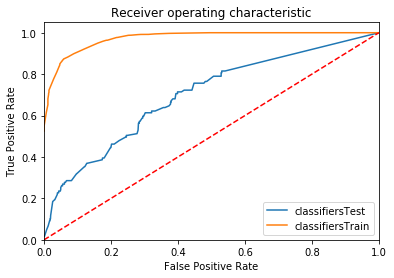

Log LossselecdropM: 0.71
Confusion Matrix: 
[[1526  102]
 [  86   33]]
BenefitItemselecdropM: 33
BenefitCoselecdropM: 27.73%
CostItemselecdropM: 135
CostCoselecdropM: 7.73%
ImproveRatioselecdropM: 358.86%


In [19]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,f1_score,accuracy_score,log_loss,confusion_matrix
from __future__ import division

print('****ResultsselecdropM****')
print('\n----------------Unhelpful Scores\n')

test_predictionsdropMR = clf2.predict(X_TestdropM2)
accdropMR = f1_score(y_TestdropM2, test_predictionsdropMR)
print("F-scoreselecdropM: {:.2%}".format(accdropMR))
    
test_predictionsdropMR = clf2.predict(X_TestdropM2)
acc2dropMR = accuracy_score(y_TestdropM2, test_predictionsdropMR)

print('Model accuracyselecdropM: {:.2%} '.format(acc2dropMR))
    
    
print('\n----------------Useful Scores: loss and cost-benefit scores\n')
    
print('ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): \nIf both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.')

RocScoreR=roc_auc_score(y_TestdropM2, clf2.predict(X_TestdropM2))
fprBR, tprBR, thresholdsBR = roc_curve(y_TestdropM2, clf2.predict_proba(X_TestdropM2)[:,1])
RocScoreTrainR=roc_auc_score(y_TraindropM2, clf2.predict(X_TraindropM2))
fprBTrainR, tprBTrainR, thresholdsBTrainR = roc_curve(y_TraindropM2, clf2.predict_proba(X_TraindropM2)[:,1])
    
print RocScoreR
print RocScoreTrainR
plt.figure()
plt.plot(fprBR, tprBR,  label='classifiersTest' % RocScoreR)
plt.plot(fprBTrainR, tprBTrainR, label='classifiersTrain' % RocScoreTrainR)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()       
    
test_predictionsdropMR = clf2.predict_proba(X_TestdropM2)
llselecdropMR = log_loss(y_TestdropM2, test_predictionsdropMR)
print("Log LossselecdropM: {:.2f}".format(llselecdropMR))

print"Confusion Matrix: \n", confusion_matrix(y_TestdropM2, clf2.predict(X_TestdropM2))

test_predictionsselecdropMR = clf2.predict(X_TestdropM2)
confusionselecdropMR = metrics.confusion_matrix(y_TestdropM2, test_predictionsselecdropMR)
TNselecdropMR = confusionselecdropMR[0, 0]
TPselecdropMR = confusionselecdropMR[1, 1]
FNselecdropMR = confusionselecdropMR[1, 0]
FPselecdropMR = confusionselecdropMR[0, 1]
BenefitItemselecdropMR = TPselecdropMR 
BenefitCoselecdropMR = TPselecdropMR / (TPselecdropMR + FNselecdropMR) # this is specificity in statistics 
print("BenefitItemselecdropM: {}".format(BenefitItemselecdropMR))
print("BenefitCoselecdropM: {:.2%}".format(BenefitCoselecdropMR))
    
CostItemselecdropMR = (TPselecdropMR + FPselecdropMR)
CostCoselecdropMR = (TPselecdropMR + FPselecdropMR) / (TPselecdropMR + TNselecdropMR + FPselecdropMR +FNselecdropMR) 
          
print("CostItemselecdropM: {}".format(CostItemselecdropMR))
print("CostCoselecdropM: {:.2%}".format(CostCoselecdropMR))

if CostCoselecdropMR == 0: 
    ImproveRatioselecdropMR = 0
else: 
    ImproveRatioselecdropMR = format((BenefitItemselecdropMR/CostItemselecdropMR) /((TPselecdropMR+FNselecdropMR) /(TPselecdropMR + TNselecdropMR + FPselecdropMR +FNselecdropMR)), '.2%')    
print(CBLUE+"ImproveRatioselecdropM: {}".format(ImproveRatioselecdropMR)+CEND)

### 4.1.3 Feature importance evaluated based on Random Forest Classifier 2 (used the picked train dataset with out the zip codes features)

Feature ranking:
1. C43MKOOPKLA (0.311930)
2. C47PPERSAUT (0.181307)
3. C59PBRAND (0.171922)
4. C44PWAPART (0.130422)
5. C62PFIETS (0.031299)
6. C54PBROM (0.030412)
7. C55PLEVEN (0.025091)
8. C61PPLEZIER (0.022949)
9. C49PMOTSCO (0.016648)
10. C64PBYSTAND (0.013073)
11. C58PWAOREG (0.011999)
12. C51PAANHANG (0.009459)
13. C45PWABEDR (0.008019)
14. C46PWALAND (0.007852)
15. C57PGEZONG (0.007003)
16. C48PBESAUT (0.006832)
17. C52PTRACTOR (0.006477)
18. C63PINBOED (0.003916)
19. C56PPERSONG (0.001769)
20. C53PWERKT (0.000639)
21. C60PZEILPL (0.000596)
22. C50PVRAAUT (0.000385)


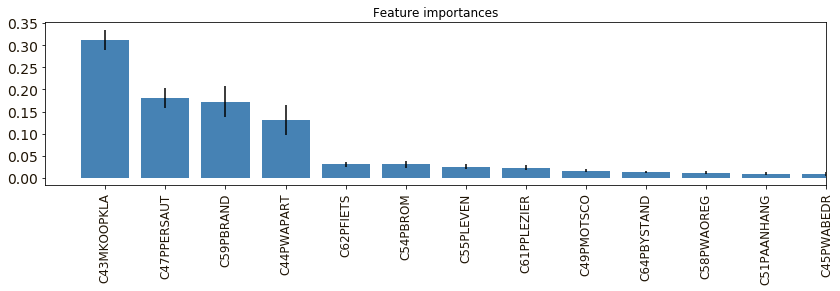

In [20]:
#features = Test.drop(['CARAVAN'], axis=1)

importances2 = clf2.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in clf2.estimators_],
             axis=0)
indices2 = np.argsort(importances2[0:22])[::-1]

indices = indices2[0:22]

# Print the feature ranking
print("Feature ranking:")

#features = Train.columns

for f in range(22):
    print("%d. %s (%f)" % (f + 1, (TraindropM2.columns.values[:22]).reshape(-1)[indices[f]], importances2[indices[f]]))

# Plot the feature importances of the forest
#import pylab as pl
plt.figure(figsize=(14, 3))
plt.title("Feature importances")
plt.bar(range(22), importances2[indices], yerr=std2[indices], color="steelblue", align="center")

plt.yticks(size=14,color="#201506")
plt.xticks(range(22), TraindropM2.columns.values[:22].reshape(-1)[indices], rotation='vertical',size=12,color="#201506")
plt.xlim([-1, 12])
plt.show()

## 4.2 Models 
- The hyperparameters for LGBMClassifier are selected based on the Automated Hyperparameter Optimization method published by Will Koehrsen in Github (https://github.com/WillKoehrsen). 
- The below models, if they have hyperparameters, then they are selected based on the multiple manuel experiments and experience.If they don´t have hyperparameters, then it´s just base models.
There are three groups of features:
1) Holdout:
- TraindropM (43 features)
- TrainselecdropM (top 8 features)
- TrainselecdropM2 (22 features)
I classify the models that I apply in 5 groups:
- #Gruppe 1: K Neighbors 
- #Gruppe 2: Boosting 
- #Gruppe 3: Trees 
- #Gruppe 4: Bayes
- #Gruppe 5: non-linear classification SVM using RBF kernel Trick 

In [21]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from IPython.display import display
from itertools import compress
from math import isnan
from sklearn import tree
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from __future__ import division


classifiers = [
#Gruppe 1: K Neighbors 
    #Classification is computed from a simple majority vote of the nearest neighbors of each point: 
    #a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
    KNeighborsClassifier(3),
    
#Gruppe 2: Boosting  
    # Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning, and a family of machine learning algorithms that convert weak learners to strong ones.
    
    # An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
    AdaBoostClassifier(),
    
    # GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=42),
    
    # What: Light GBM is a gradient boosting framework that uses tree based learning algorithm.    
    # Pros: handle the large size of data and takes lower memory to run;focuses on accuracy of results.
    # Cons: Light GBM is sensitive to overfitting and can easily overfit small data. 
    lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6311794044268164,
        learning_rate=0.027802518491219938, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.06183118355912668,
        reg_lambda=0.24742831407472365, silent=True,
        subsample=0.999742610271968, subsample_for_bin=280000,
        subsample_freq=1, verbose=1),

  #  Neural Network performs not so good and actually not as suitable as other models in this situation
  #  MLPClassifier(activation='relu', alpha=1e-05,
  #     batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
  #     epsilon=1e-08, hidden_layer_sizes=(64), learning_rate='constant',
  #     learning_rate_init=0.001, max_iter=2000, momentum=0.9,
  #     nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
  #     tol=0.001, validation_fraction=0.1, verbose=True,
  #     warm_start=False),
    
#Gruppe 3: Trees 
    
    # lgb.LGBMClassifier and GradientBoostingClassifier in Gruppe 1 also uses tree methods 

    # Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
    # Pruning:   Remove test nodes whose leaves have less than 𝜏 instances.  Collect in new leaf node that is labeled with the majority class 
    # Pruning parameter 𝜏 is a regularization parameter that has to be tuned (e.g., by cross validation).
    DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=15, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, min_impurity_decrease=1e-07),
   
    # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
    # Random Forests are an improvement over bagged decision trees.
    # In statistics, bootstrapping is any test or metric that relies on random sampling with replacement. #Bagging: Bootstrap aggregating, also called bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. 
    RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_decrease=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight='balanced_subsample'),
    # RF vs ET: Both methods are about the same, with the ET being a bit worse when there is a high number of noisy features (in high dimensional data-sets).That said, provided the (perhaps manual) feature selection is near optimal, the performance is about the same, however, ET's can be computationally faster.
    
    # This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.
    # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    # The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.
    ExtraTreesClassifier(n_estimators=500, criterion='gini', max_depth=15,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features='auto', max_leaf_nodes=None, min_impurity_decrease=1e-07, 
                                bootstrap=True, oob_score=False, n_jobs=1, 
                                random_state=42, verbose=1, warm_start=False, class_weight='balanced_subsample'),

#Gruppe 4: Bayes   
    
    # Bayes‘ equation: 𝑃(𝜃|𝐗,𝐲) =(𝑃(𝐲|𝐗,𝜃)/𝑃(𝜃))/ 𝑃(𝐲|𝐗)       
    # Classification: a posteriori (“posterior”) probability that θ is the correct parameter given observations 𝐲|𝐗.
    # 𝑃(𝜃): A priori (“prior”) probability of nature choosing θ: System parameter 𝜃∗ (randomly)
    # 𝑃(𝐲|𝐗,𝜃): Likelihood of observing 𝐲|𝐗 when model parameter is 𝜃.
    # Probability of observing 𝐲|𝐗; independent of 𝜃.
    # Maximum-likelihood(ML):𝜃ML = argmaxbelow𝜃 (𝑃(𝐲|𝐗,𝜃)) = argminbelow𝛉 ∑𝑖=1 𝑛 (log(1 + ehoch(−𝑦𝑖𝐱𝑖T𝛉))) <ML:Logistic Regression,using (stochastic) gradient descent>
    # Maximum-a-positeriori(MAP): 𝜃MAP = argmaxbelow𝜃 (𝑃(𝜃|𝐲,𝐗)) = argminbelow𝛉 ∑𝑖=1 𝑛 (log(1 + e(hoch−𝑦𝑖𝐱𝑖T𝛉)) + (1/2𝜎((low𝑝)(hoch2))𝛉T𝛉  A posteriori (“posterior”) distribution: a posteriori (“posterior”) probability that θ is the correct parameter given observations 𝐲|𝐗.
    # Bayes’ theorem Classification: Predictive distribution given the data 𝑃 (𝑦|𝐱∗,𝐲,𝐗) = ∫(𝑃(𝑦|𝛉,𝐱∗)𝑃(𝛉|𝐲,𝐗)d𝛉= ∫(1/(1 + e−𝑦𝐱∗T))𝛉𝑁(𝛉|𝟎,𝜎(hoch2)𝐈)𝑑𝛉. No closed-form solution for logistic regression.  Possible to approximate by sampling from the posterior.  Standard approximation: use only MAP model instead of integrating over model space.

    # Bayes’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. 
    
    # P(A\B)= (P(B\A)\P(A))\(P(B))where A and B are events
    # P(A\B) is a conditional probability: the likelihood of event A occurring given that B is true.
    # {P(B\ A)}  is also a conditional probability: the likelihood of event B occurring given that {\displaystyle A} A is true.
    # P(A) and P(B) are the probabilities of observing  A and B independently of each other; this is known as the marginal probability.
    
    #Gaussian Naive Bayes
    #GaussianNB(),
    #Gaussian: It is used in classification and it assumes that features follow a normal distribution.
    #Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.
    
    # Linear Bayes classification ##http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
    #A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
    #The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
    #The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.
    # PDF(x|k)=ehoch(−d/2) / ((2π)hoch(p/2)) /  square root(|S|) see https://stats.stackexchange.com/questions/31366/linear-discriminant-analysis-and-bayes-rule-classification/31384#31384 The relationship of LDA and regression is here: https://stats.stackexchange.com/questions/31459/what-is-the-relationship-between-regression-and-linear-discriminant-analysis-ld 
    LinearDiscriminantAnalysis(),
    
    # Quadratic Discriminant Analysis
    # QuadraticDiscriminantAnalysis(),
    
    #Bernoulli: The binomial model is useful if your feature vectors are binary. One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.
    #Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. #There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.
    #Pros:It is easy and fast to predict class of test data set. It also perform well in multi class predictionWhen assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).
    #Cons:If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.
    BernoulliNB(alpha=1.0,fit_prior = True),
    
    
    #Logictic Regression uses Log_Loss,but SVM Hinge Loss; Moreover Log_loss is not suitble for Naive Bayes 
    #Logistic Regression and SVM can both be High dimensional features with kernels

    #Empirical risk minimization  Gradient descent method  Inexact line search  Stochastic gradient descent methods
    #The performance of SGDClassifier is not so good. Moreover, since this SGDClassifier normally uses Hinge loss, so I cannot calculate the ROC, which I use in the evaluation for all the classifiers, unless I set the loss to 'log'. so I commented this classifier. 
    #SGDClassifier(loss = 'log',penalty = 'elasticnet'),
    
    ####Linear classification Bayes####: Cost sensitive: Called multi-class “logistic regression” even though it is a classification model, linear, belongs to Bayes methods
    #For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
    #‘liblinear’ and ‘saga’ handle L1 penalty: square loss function is both convex and smooth and matches the 0–1 indicator function when {yf({\vec {x}})=0} yf({\vec  {x}})=0 and when {yf({\vec {x}})=1} yf({\vec  {x}})=1. However, the square loss function tends to penalize outliers excessively, leading to slower convergence rates (with regards to sample complexity) than for the logistic loss or hinge loss(L2) functions.https://www.csie.ntu.edu.tw/~cjlin/liblinear/ 
    # Softmax Function	Sigmoid Function: Logistic Regression generalize sigmoid function to softmax function 𝑃(𝑦|𝐱,𝛉) =ehoch𝐱T𝛉𝑦 / ∑low𝑦′ehoch𝐱T𝛉low𝑦′for 𝛉 

    #  For binary classification, 𝑦 ∈ {−1,+1} #Decision boundary is a hyperplane in input space.
    # 𝑃(𝑦=+-1|𝐱,𝛉) = 𝜎 (𝑦𝐱T𝛉) = 1 / (1+(ehoch(−𝑦𝐱T𝛉))) 
    LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced'),    # class_weight='balanced' # penalize
    
    #LogisticRegression(solver='saga', max_iter=1000, random_state=42,verbose=2),

# Gruppe 5: non-linear classification SVM using RBF kernel Trick 
    
    # Defi: Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). 
    # Defi: An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. 
    # SVM: SVM classifier with Gaussian kernel: RBF, Dual classifier, uses kernal trick:Gaussian kernel: RBF, uses squared Euclidean distance 
    
    # class_weight='balanced' # penalize
    # Kernel functions can be understood as a measure of similarity between instances. 
    # Primal view on data: “what does 𝐱 look like?” 
    # Dual view on data: “how similar is 𝐱 to each training instance?” 
    # Primal view: 𝑓𝛉𝐱 = 𝛉T𝜙𝐱  Model 𝛉 has as many parameters as the dimensionality of 𝜙 𝐱 .  Good if there are many examples with few attributes. 
    # Dual view: 𝑓𝛂𝐱 = 𝛂T𝚽𝜙𝐱  Model 𝛂 has as many parameters as there are examples.   Good if there are few examples with many attributes.  The representation 𝜙 𝐱 can even be infinite dimensional, as long as the inner product can be computed efficiently.
    # Kernel Ridge Regression # Squared loss: ℓ𝟐 𝑓𝛉 𝐱𝑖 ,𝑦𝑖 = 𝑓𝛉𝐱𝑖 −𝑦𝑖𝟐  L2 regularization: Ω2 𝛉 = ||𝛉||22 ## Minimize  𝑳 𝛉 = 𝛉T𝜙 𝐱 −𝑦𝑖 2 +𝜆𝛉T𝛉
    # Optimization criterion of the dual SVM: max 𝛃𝛽𝑖 − 𝑛𝑖=11 2 𝛽𝑖𝛽𝑗𝑦𝑖𝑦𝑗𝑘 𝐱𝑖,𝐱𝑗 𝑛 𝑖,𝑗=1 Optimization over parameters 𝛃.  Solution found with QP-Solver in 𝑂 𝑛2 .  Sparse solution.  Samples only appear as pairwise inner products.
    # Primal SVM:  Solution is a Vector 𝛉 in the space of the attributes.  Dual SVM:  The same solution is represented as weights 𝛽𝑖 of the samples. 
    # Kernel matrices are symmetric: 𝐊 = 𝐊T  Kernel matrices 𝐊 ∈ ℝ𝑛×𝑛 are positive semidefinite: ∃𝚽 ∈ ℝ𝑛×𝑚:𝐊 = 𝚽𝚽T  Kernel function 𝑘 𝐱,𝐱′ is positive semidefinite if 𝐊 is positive semidefinite for every data set.  For every positive definite function 𝑘 there is at least one mapping 𝜙 𝐱 such that 𝑘 𝐱,𝐱′ = 𝜙 𝐱 T𝜙 𝐱′ for all 𝐱 and 𝐱′.
    # Polynomial kernels: 𝑘𝑝𝑜𝑙𝑦 𝐱𝑖,𝐱𝑗 = 𝐱𝑖 T𝐱𝑗 +1 𝑝  Radial basis functions: 𝑘𝑅𝐵𝐹 𝐱𝑖,𝐱𝑗 = 𝑒−𝛾 𝐱𝑖−𝐱𝑗 2  Sigmoid kernels,   Dynamic time-warping kernels,  String kernels,  Graph kernels,
    # Kernel function 𝑘 𝐱,𝐱′ = 𝜙 𝐱 T𝜙 𝐱′ computes the inner product of the feature mapping of  instances.  The kernel function can often be computed without an explicit representation 𝜙 𝐱 .  E.g., polynomial kernel:  𝑘𝑝𝑜𝑙𝑦 𝐱𝑖,𝐱𝑗 = 𝐱𝑖 T𝐱𝑗 +1 𝑝  Infinite-dimensional feature mappings are possible  Eg., RBF kernel:  𝑘𝑅𝐵𝐹 𝐱𝑖,𝐱𝑗 = 𝑒−𝛾 𝐱𝑖−𝐱𝑗 2 Kernel functions for time series, strings, graphs, …  For a given kernel matrix, the Mercer map provides a feature mapping. Useful if a learning problem is given as a kernel function but learning should take place in the primal.  For example if the kernel matrix will be too large (quadratic memory consumption!
    # Representer Theorem:  𝑓𝛉∗ 𝐱 = 𝛼𝑖 ∗𝜙 𝐱𝑖 T𝜙 𝐱𝑛 𝑖=1   Instances only interact through inner products  Great for few instances, many attributes  Kernel learning algorithms:  Kernel ridge regression  Kernel perceptron, SVM
    # Kernel: 𝑘𝑅𝐵𝐹 𝐱𝑖,𝐱𝑗 = exp hoch(−𝛾𝐱𝑖 −𝐱𝑗hoch2)  No finite-dimensional feature mapping 𝜙.
    # Empirical risk minimization for a classification problem with a 0-1 loss function is known to be an NP-hard problem even for such a relatively simple class of functions as linear classifiers.[2] Though, it can be solved efficiently when the minimal empirical risk is zero, i.e. data is linearly separable.
    # Empirical risk minimization  Gradient descent method  Inexact line search  Stochastic gradient descent methods
    # In practice, machine learning algorithms cope with that either by employing a convex approximation to the 0-1 loss function (like hinge loss for SVM), which is easier to optimize, or by imposing assumptions on the distribution {\displaystyle P(x,y)} P(x,y) (and thus stop being agnostic learning algorithms to which the above result applies).
    # Support vector machines  Gradient or stochastic gradient, hinge loss, L2regularizer.  Maximizes margin between instances and plane.
    SVC(C=10, class_weight='balanced', gamma='auto', kernel='rbf',
              max_iter=-1, probability=True, random_state=42, verbose=True)]   # Linear: Etra Trees: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.


#from costcla.sampling import cost_sampling
#from costcla.metrics import savings_score
#from costcla import models
#data = TraindropM.ix[:, 1:-5]
#sets = train_test_split(X_TraindropM, y, cost_mat =[[],[],[],[]], test_size=0.3,random_state=42) 
#X_trainC, X_testC, y_trainC, y_testC, cost_mat_trainC, cost_mat_testC = sets
#y_pred_test_lr = LogisticRegression(random_state=0).fit(X_trainC, y_trainC).predict(X_testC)
#f = CostSensitiveLogisticRegression()
#f.fit(X_trainC, y_trainC, cost_mat_trainC)
#y_pred_test_cslr = f.predict(X_testC)

## 4.3 Train, test and evaluate the models  

### 4.3.1 Train, test and evaluate the models using train_test_split  
#### 4.3.1.1 Train, test and evaluate the models with the datasets: Smote X_TraindropM; y_TraindropM

KNeighborsClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 18.75%
Model accuracydropM: 89.58% 
ROC just use this to check overfitting:
 
0.5624367683191213
0.8529641185647425


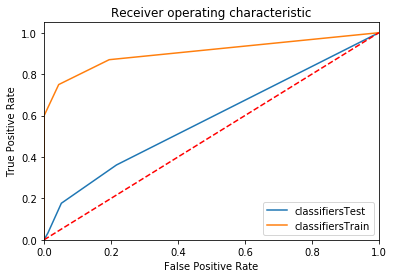


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 2.00
Brier score loss: 0.10
BenefitItemdropM: 21
BenefitCodropM: 17.65%
CostItemdropM: 105
CostCodropM: 6.01%
ImproveRatiodropM: 293.61%
balancetradeoffradio: 5.00
ProfitratiodropM: 0.20

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1428
MaxBudgetPerTargetAudienceBdropM: 140.06

In order to reach the profit goal, then the mininum target ord

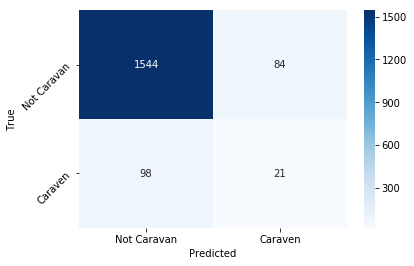

[0 0 1 ... 0 0 0]
AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 24.65%
Model accuracydropM: 78.31% 
ROC just use this to check overfitting:
 
0.6616098527863233
0.7909516380655226


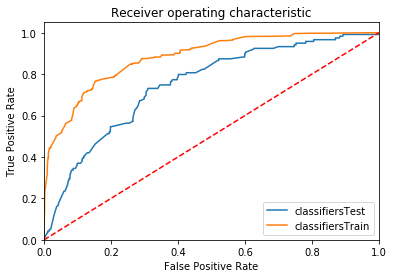


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.68
Brier score loss: 0.22
BenefitItemdropM: 62
BenefitCodropM: 52.10%
CostItemdropM: 384
CostCodropM: 21.98%
ImproveRatiodropM: 237.03%
balancetradeoffradio: 6.19
ProfitratiodropM: 0.16

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1768
MaxBudgetPerTargetAudienceBdropM: 113.12

In order to reach the profit goal, then the mininum target or

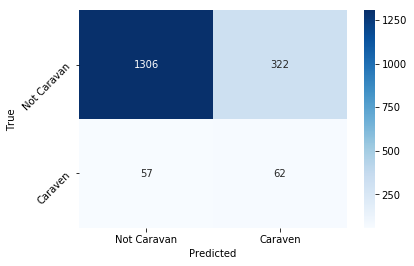

[1 1 1 ... 0 0 0]
GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.84%
Model accuracydropM: 88.44% 
ROC just use this to check overfitting:
 
0.5718724836371895
0.9082163286531462


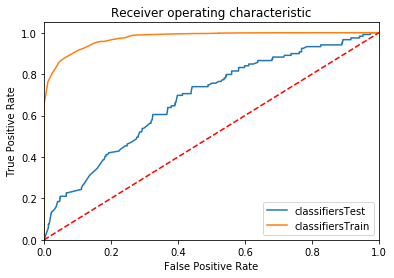


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.35
Brier score loss: 0.12
BenefitItemdropM: 25
BenefitCodropM: 21.01%
CostItemdropM: 133
CostCodropM: 7.61%
ImproveRatiodropM: 275.95%
balancetradeoffradio: 5.32
ProfitratiodropM: 0.19

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1520
MaxBudgetPerTargetAudienceBdropM: 131.58

In order to reach the profit goal, then the mininum target ord

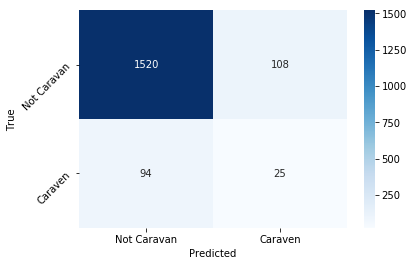

[0 0 0 ... 0 0 0]
LGBMClassifier
LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.631179404427, importance_type='split',
        learning_rate=0.0278025184912, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.0618311835591,
        reg_lambda=0.247428314075, silent=True, subsample=0.999742610272,
        subsample_for_bin=280000, subsample_freq=1, verbose=1)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 23.11%
Model accuracydropM: 80.19% 
ROC just use this to check overfitting:
 
0.6327994342700225
0.8352834113364535


c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

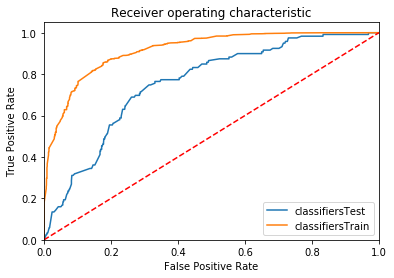


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.43
Brier score loss: 0.20
BenefitItemdropM: 52
BenefitCodropM: 43.70%
CostItemdropM: 331
CostCodropM: 18.95%
ImproveRatiodropM: 230.63%
balancetradeoffradio: 6.37
ProfitratiodropM: 0.16

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1820
MaxBudgetPerTargetAudienceBdropM: 109.89

In order to reach the profit goal, then the mininum target or

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


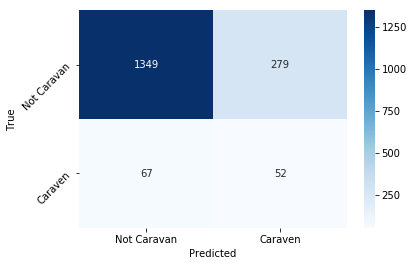

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 1 1 ... 1 1 0]
DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.61%
Model accuracydropM: 88.27% 
ROC just use this to check overfitting:
 
0.5709511077158136
0.8928757150286012


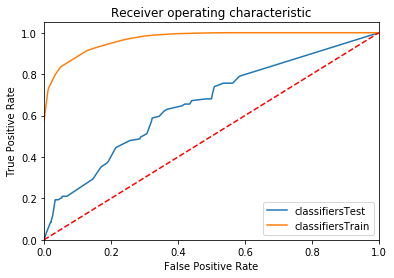


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.99
Brier score loss: 0.12
BenefitItemdropM: 25
BenefitCodropM: 21.01%
CostItemdropM: 136
CostCodropM: 7.78%
ImproveRatiodropM: 269.87%
balancetradeoffradio: 5.44
ProfitratiodropM: 0.18

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1554
MaxBudgetPerTargetAudienceBdropM: 128.70

In order to reach the profit goal, then the mininum target ord

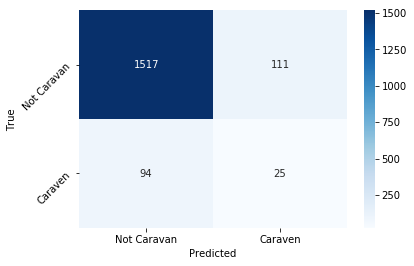

[0 1 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=1e-07,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 28.25%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Model accuracydropM: 85.46% 
ROC just use this to check overfitting:
 


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


0.6532658517952636
0.861414456578263


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


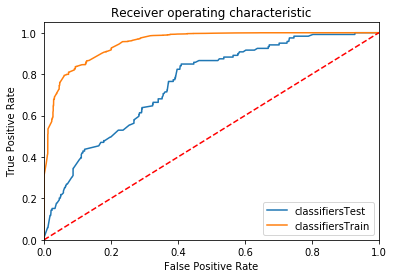


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.38


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Brier score loss: 0.15
BenefitItemdropM: 50
BenefitCodropM: 42.02%
CostItemdropM: 235
CostCodropM: 13.45%
ImproveRatiodropM: 312.35%
balancetradeoffradio: 4.70
ProfitratiodropM: 0.21

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1342
MaxBudgetPerTargetAudienceBdropM: 149.03

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audience are:
MinTargetAudie

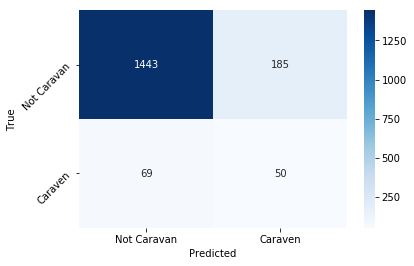

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
           criterion='gini', max_depth=15, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 28.57%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


Model accuracydropM: 83.11% 
ROC just use this to check overfitting:
 


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


0.6757247124894183
0.8082423296931878


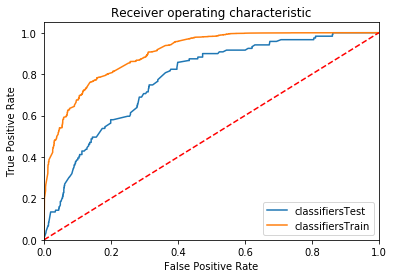


----------------Useful Scores: loss and cost-benefit scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Log LossdropM: 0.46


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Brier score loss: 0.17
BenefitItemdropM: 59
BenefitCodropM: 49.58%
CostItemdropM: 294
CostCodropM: 16.83%
ImproveRatiodropM: 294.61%
balancetradeoffradio: 4.98
ProfitratiodropM: 0.20

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1422
MaxBudgetPerTargetAudienceBdropM: 140.65

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audience are:
MinTargetAudie

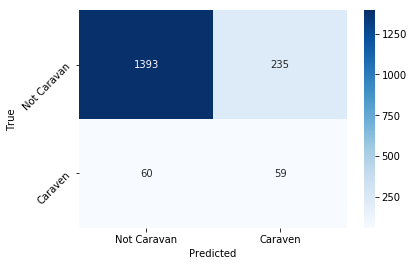

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 0 0 0]
LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 23.72%
Model accuracydropM: 70.18% 
ROC just use this to check overfitting:
 
0.6919946111122581
0.7011180447217888


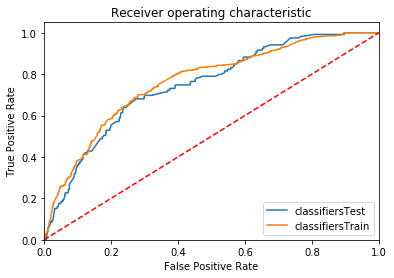


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.57
Brier score loss: 0.30
BenefitItemdropM: 81
BenefitCodropM: 68.07%
CostItemdropM: 564
CostCodropM: 32.28%
ImproveRatiodropM: 210.84%
balancetradeoffradio: 6.96
ProfitratiodropM: 0.14

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1988
MaxBudgetPerTargetAudienceBdropM: 100.60

In order to reach the profit goal, then the mininum target or

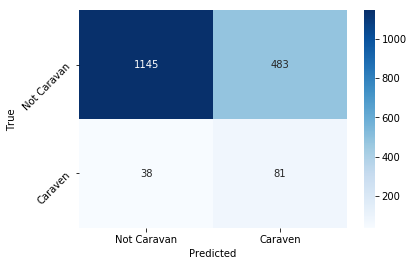

[0 1 1 ... 0 0 1]
BernoulliNB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 25.56%
Model accuracydropM: 73.33% 
ROC just use this to check overfitting:
 
0.7049919476390065
0.7028081123244929


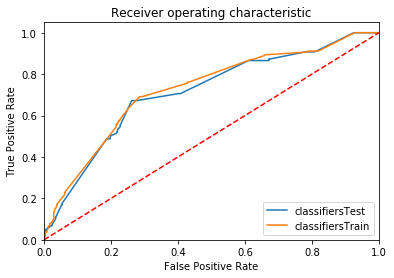


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.70
Brier score loss: 0.27
BenefitItemdropM: 80
BenefitCodropM: 67.23%
CostItemdropM: 507
CostCodropM: 29.02%
ImproveRatiodropM: 231.65%
balancetradeoffradio: 6.34
ProfitratiodropM: 0.16

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1811
MaxBudgetPerTargetAudienceBdropM: 110.44

In order to reach the profit goal, then the mininum target or

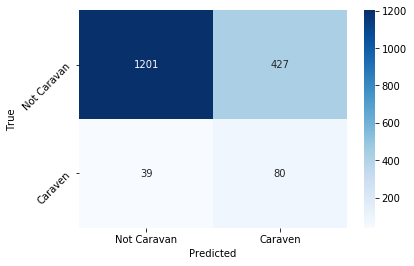

[0 1 1 ... 1 0 0]
[LibLinear]==============================================================================================================
LogisticRegression
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=2, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 23.37%
Model accuracydropM: 70.35% 
ROC just use this to check overfitting:
 
0.6851268763033468
0.6998179927197088


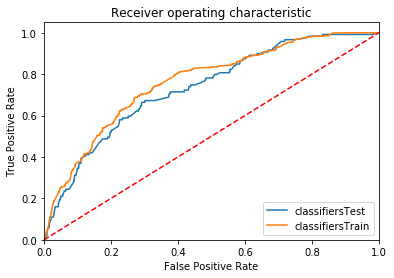


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.56
Brier score loss: 0.30
BenefitItemdropM: 79
BenefitCodropM: 66.39%
CostItemdropM: 557
CostCodropM: 31.88%
ImproveRatiodropM: 208.22%
balancetradeoffradio: 7.05
ProfitratiodropM: 0.14

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 2014
MaxBudgetPerTargetAudienceBdropM: 99.30

In order to reach the profit goal, then the mininum target ord

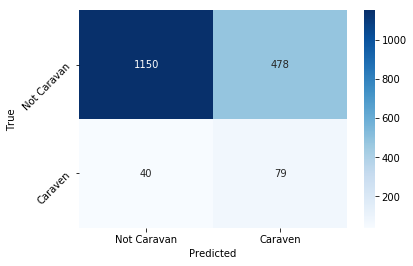

[0 1 1 ... 0 0 1]
[LibSVM]==============================================================================================================
SVC
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 24.50%
Model accuracydropM: 76.36% 
ROC just use this to check overfitting:
 
0.6706403691697809
0.7705408216328654


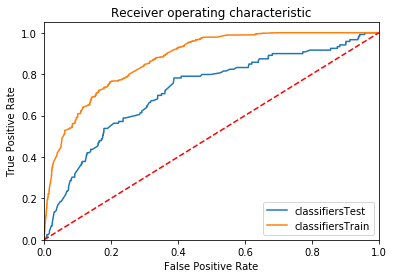


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.48
Brier score loss: 0.24
BenefitItemdropM: 67
BenefitCodropM: 56.30%
CostItemdropM: 428
CostCodropM: 24.50%
ImproveRatiodropM: 229.81%
balancetradeoffradio: 6.39
ProfitratiodropM: 0.16

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1825
MaxBudgetPerTargetAudienceBdropM: 109.59

In order to reach the profit goal, then the mininum target or

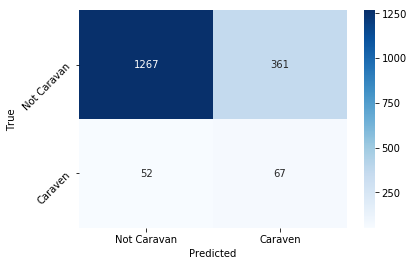

[1 0 1 ... 0 0 0]


In [22]:
# define the confusion matrix 
import csv
from sklearn.metrics import brier_score_loss
#lldropM = log_loss(y_TestdropM, test_predictionsdropM
#def logloss(true_label, lldropM):
    #if true_label == 1:
       # return -log(lldropM)
  #  else:
       # return -log(1 - lldropM)

def draw_confusion_matricesdropM(confusion_matriciesdropM,class_namesdropM):
    class_namesdropM = class_namesdropM.tolist()
    for cm in confusion_matricesdropM:
        classifier, cm = cm[0], cm[1]
        print'Confusion matrixdropM:\n', cm              
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.heatmap(cm, annot=True, ax = ax,cmap='Blues', fmt='g'); #annot=True to annotate cells 
        plt.ylabel('True')
        plt.xlabel('Predicted')    
        ax.xaxis.set_ticklabels(['Not Caravan', 'Caraven'],horizontalalignment="center"); ax.yaxis.set_ticklabels(['Not Caravan', 'Caraven'],rotation=45);
        plt.show()   

class_namesdropM = np.unique(np.array(y_TestdropM))

# Logging for Visual Comparison
log_colsUdropM = ["Classifier", "F-score","Accuracy"]
logUdropM = pd.DataFrame(columns=log_colsUdropM)

log_colsdropM=["Classifier", "Log Loss","OverfittingRoc","BLoss","BI","BO", "CI", "CO", "IR","BTOR","PR"] 
logdropM = pd.DataFrame(columns=log_colsdropM)

log_colsCBAdropM =["Classifier", "MTAB","MBPTAB","MTAP","MBPTAP"]
logCBAdropM = pd.DataFrame(columns=log_colsCBAdropM)


for clf in classifiers:
    clf.fit(X_TraindropM, y_TraindropM)
    namedropM = clf.__class__.__name__
    
    print("="*110)
    print(namedropM)
    print(str(clf));print('\n')
    
    print('****************ResultsdropM****************')
    print('\n----------------Unhelpful Scores\n')
   
    # The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
    # F1 = 2 * (precision * recall) / (precision + recall)#precision: tp / (tp + fp) # Recall: tp / (tp + fn) 
    # We do not care about fp: not caravan predicted to be caraven, but f1 uses precision and precision uses fp, so this rate is not so suitble in this case
    test_predictionsdropM = clf.predict(X_TestdropM)
    accdropM = metrics.f1_score(y_TestdropM, test_predictionsdropM)
    print("F-scoredropM: {:.2%}".format(accdropM))
    
    # In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
    # In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
    # We do not care so much, if we can predict "0" right or not, and the data is very imbalanced, since it has lots "0"
    test_predictionsdropM = clf.predict(X_TestdropM)
    acc2dropM = accuracy_score(y_TestdropM, test_predictionsdropM)

    print('Model accuracydropM: {:.2%} '.format(acc2dropM))
    
    # Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.
    # ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.
    # The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.
    print('ROC just use this to check overfitting:\n ')
    #If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting
    test_predictionsdropM = clf.predict(X_TestdropM)
    RocScore=roc_auc_score(y_TestdropM, test_predictionsdropM)
    fprB, tprB, thresholdsB = roc_curve(y_TestdropM, clf.predict_proba(X_TestdropM)[:,1])
    RocScoreTrain=roc_auc_score(y_TraindropM, clf.predict(X_TraindropM))
    fprBTrain, tprBTrain, thresholdsBTrain = roc_curve(y_TraindropM, clf.predict_proba(X_TraindropM)[:,1])
    
    OverfittingRoc=float(format(RocScore-RocScoreTrain,'.2f'))

    print RocScore
    print RocScoreTrain
    plt.figure()
    plt.plot(fprB, tprB, label='classifiersTest' % RocScore)
    plt.plot(fprBTrain, tprBTrain, label='classifiersTrain' % RocScoreTrain)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    print('\n----------------Useful Scores: loss and cost-benefit scores\n')
    # Trees and Logictic Regression uses Log_Loss,but SVM Hinge Loss; Moreover Log_loss is not suitble for Naive Bayes 
    # Log loss, aka logistic loss or cross-entropy loss.
    # Log loss, aka logistic loss or cross-entropy loss.
    # used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is
    #-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
    # Log loss penalizes both types of errors, but especially those predications that are confident and wrong! 
    # This is not good, since the wrongly predicted caravan (FP) at the time point of the extraction of the data may become TP!
    test_predictionsdropM = clf.predict_proba(X_TestdropM)
    lldropM = log_loss(y_TestdropM, test_predictionsdropM)
    print("Log LossdropM: {:.2f}".format(lldropM))
    
    test_predictionsdropM = clf.predict(X_TestdropM)
    
    # This function returns a score of the mean square difference between the actual outcome and the predicted probability of the possible outcome. The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual outcome can be a value between 0 and 1.The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), the more accurate the prediction is. It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.
    # Loss Functions for Classification: Zero-one loss, Logistic loss,Perceptron loss, Hinge Loss: not all the models use log_loss 
    BLoss= brier_score_loss(y_TestdropM, test_predictionsdropM)
    print("Brier score loss: {:.2f}".format(BLoss))
    confusiondropM = metrics.confusion_matrix(y_TestdropM, test_predictionsdropM)
    TNdropM = confusiondropM[0, 0]
    TPdropM = confusiondropM[1, 1]
    FNdropM = confusiondropM[1, 0]
    FPdropM = confusiondropM[0, 1]
    BenefitItemdropM = TPdropM 
    BenefitCodropM = TPdropM / (TPdropM + FNdropM) # this is specificity in statistics 
    print("BenefitItemdropM: {}".format(BenefitItemdropM))
    print("BenefitCodropM: {:.2%}".format(BenefitCodropM))

    
    CostItemdropM = (TPdropM + FPdropM)
    CostCodropM = (TPdropM + FPdropM) / (TPdropM + TNdropM + FPdropM +FNdropM) 
          
    print("CostItemdropM: {}".format(CostItemdropM))
    print("CostCodropM: {:.2%}".format(CostCodropM))
    if CostCodropM == 0: 
        ImproveRatiodropM = 0
    else: 
        ImproveRatiodropM = (BenefitItemdropM/CostItemdropM) /((TPdropM+FNdropM) /(TPdropM + TNdropM + FPdropM+FNdropM))       
    print(CBLUE+"ImproveRatiodropM: {:.2%}".format(ImproveRatiodropM)+CEND)
    
    #scenario BenefitItem*price-CostItem*
    if BenefitItemdropM == 0:
        balancetradeoffradiodropM = 0
    else:
        balancetradeoffradiodropM = float(format(CostItemdropM/BenefitItemdropM , '.2f'))
    if CostCodropM == 0: 
        ProfitratiodropM=0
    else:
        ProfitratiodropM = float(format(BenefitItemdropM/CostItemdropM, '.2f'))
    print(CBLUE+"balancetradeoffradio: {0:.2f}".format(balancetradeoffradiodropM)+CEND)
    print(CBLUE+"ProfitratiodropM: {0:.2f}".format(ProfitratiodropM)+CEND)
 
    
    print('\n----------------Scenario analysis shreshold: marketing and controlling strategies\n')
    #   #Scenario: give a budget and the revenue, then I can predict, how much you can spend on each costItem or how many costItem can be spent 
    Budget = 200000
    #One scenario considers benefitgoal, one scenario considers the balance, no deficit
    ProfitGoal= 20000
    # Proft maybe 700 every year, the profit of every Customer is the Reveneue from each customer minus the cost of the customer management 
    ProfitPerBenefitItem = 700

    print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit, then the insurance company should be:\n\n')
# within this budget, the smallest amount of  target audience should be reached, in order to keep the balance of the account 
# Min CostItem
    if balancetradeoffradiodropM == 0:
        MinTargetAudienceBdropM = 0
    else:
        MinTargetAudienceBdropM= int((Budget/ProfitPerBenefitItem)*balancetradeoffradiodropM)
    
    #For every Target Audience, how much the company can spend for max. so that the company can keep the balance and avoid deficit
    if MinTargetAudienceBdropM == 0:
        MaxBudgetPerTargetAudienceBdropM = 0
    else:
        MaxBudgetPerTargetAudienceBdropM = float(format(Budget/MinTargetAudienceBdropM, '.2f'))
    
    #To reach the benifit goal, at least MinTargetAudienceP should be reached 
    if balancetradeoffradiodropM == 0:
        MinTargetAudiencePdropM = 0
    else:
        MinTargetAudiencePdropM = int(((Budget + ProfitGoal)/ProfitPerBenefitItem)*balancetradeoffradiodropM)
    
    #To reach the benifit goal, at most MaxBudgetPerTargetAudienceP can be spent 
    if MinTargetAudienceBdropM == 0:
        MaxBudgetPerTargetAudiencePdropM = 0
    else:
        MaxBudgetPerTargetAudiencePdropM = float(format(Budget/MinTargetAudiencePdropM, '.2f'))
            
    print("MinTargetAudienceBdropM: {}".format(MinTargetAudienceBdropM))
    print("MaxBudgetPerTargetAudienceBdropM: {0:.2f}".format(MaxBudgetPerTargetAudienceBdropM)) 
    print('\nIn order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audience are:')
    print("MinTargetAudiencePdropM: {}".format(MinTargetAudiencePdropM))
    print("MaxBudgetPerTargetAudiencePdropM: {0:.2f}".format(MaxBudgetPerTargetAudiencePdropM)+"\n")

    log_entryUdropM = pd.DataFrame([[namedropM, accdropM,acc2dropM]], columns=log_colsUdropM)#FPR*100,
    logUdropM = logUdropM.append(log_entryUdropM,ignore_index=True)
    
    log_entrydropM = pd.DataFrame([[namedropM,lldropM,OverfittingRoc,BLoss,BenefitItemdropM,BenefitCodropM, CostItemdropM, CostCodropM,ImproveRatiodropM,balancetradeoffradiodropM,ProfitratiodropM]], columns=log_colsdropM)#FPR*100,
    logdropM = logdropM.append(log_entrydropM,ignore_index=True)
        
    
    log_entryCBAdropM = pd.DataFrame([[namedropM,MinTargetAudienceBdropM,MaxBudgetPerTargetAudienceBdropM,MinTargetAudiencePdropM,MaxBudgetPerTargetAudiencePdropM]], columns=log_colsCBAdropM)
    logCBAdropM = logCBAdropM.append(log_entryCBAdropM,ignore_index=True)
   
    reportdropM = classification_report(y_TestdropM, test_predictionsdropM)
    print(reportdropM)
    confusion_matricesdropM = [
    ( "", confusion_matrix(y_TestdropM, test_predictionsdropM))
    ]
    draw_confusion_matricesdropM(confusion_matricesdropM,class_namesdropM)
    
    predictions = clf.predict(OutputdropM)
    print predictions
    #new_column = df['Classifiers'] 
#    pd.DataFrame(predictions).to_csv('C:\Users\chenp\Desktop\output.csv', index = False,header = False, sep=',', mode='a',encoding ='utf-8')
    with open('C:\Users\chenp\Desktop\output.4.3.1.1.csv', 'a') as csvfile:#, newline=''
                fwriter = csv.writer(csvfile, delimiter=',',quotechar='/',quoting=csv.QUOTE_MINIMAL)#, 
                fwriter.writerow(predictions)
    #numpy.savetxt('C:/localpath/test.csv',prediction, ,delimiter=',')
    #pd.read_csv(r'C:\Users\chenp\Desktop\00_CS_Master_Kurse_SS2018\ML1_IDA\P6_V\caravan.output.csv', sep='\t',


#### 4.3.1.2 Train, test and evaluate the models with the datasets: Smote X_TrainselecdropM; y_TrainselecdropM

KNeighborsClassifier
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 3.12%
Model accuracyselecdropM: 92.90% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.5062534841946607
0.5313210345007687


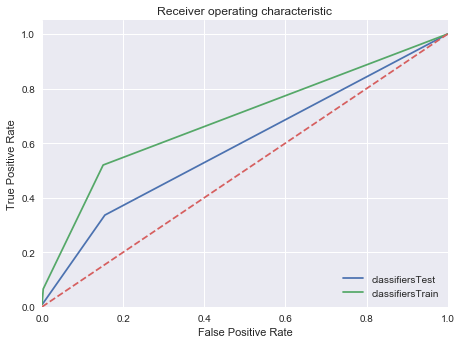

Log LossselecdropM: 1.65
Brier score loss: 0.07
BenefitItemselecdropM: 2
BenefitCoselecdropM: 1.68%
CostItemselecdropM: 9
CostCoselecdropM: 0.52%
ImproveRatioselecdropM: 326.24%
balancetradeoffradioselecdropM: 4.50
ProfitratioselecdropM: 0.22

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1285
MaxBudgetPerTargetAudienceBselecdropM: 155.64

In order to reach the profit goal, then the mininum target ordience numbe

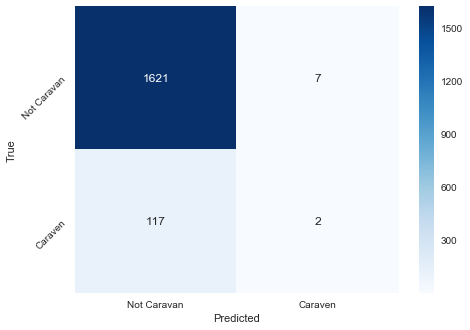

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


[0 0 0 ... 0 0 0]
AdaBoostClassifier
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 0.00%
Model accuracyselecdropM: 93.19% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.5
0.5057701871393633


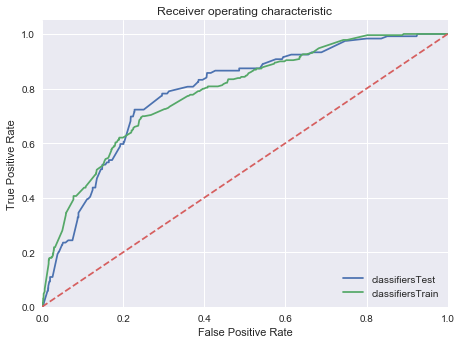

Log LossselecdropM: 0.66
Brier score loss: 0.07
BenefitItemselecdropM: 0
BenefitCoselecdropM: 0.00%
CostItemselecdropM: 0
CostCoselecdropM: 0.00%
ImproveRatioselecdropM: 0.00%
balancetradeoffradioselecdropM: 0.00
ProfitratioselecdropM: 0.00

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 0
MaxBudgetPerTargetAudienceBselecdropM: 0.00

In order to reach the profit goal, then the mininum target ordience number and t

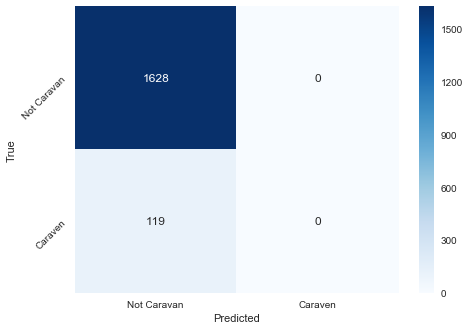

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


[0 0 0 ... 0 0 0]
GradientBoostingClassifier
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 14.44%
Model accuracyselecdropM: 91.18% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.5398798339974811
0.612987008563312


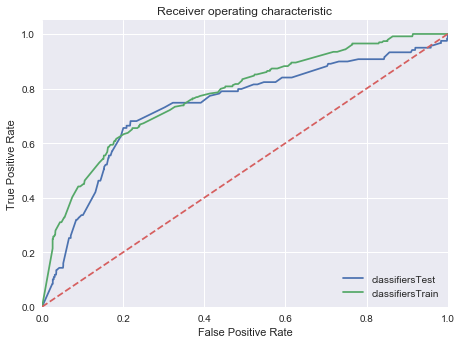

Log LossselecdropM: 1.07
Brier score loss: 0.09
BenefitItemselecdropM: 13
BenefitCoselecdropM: 10.92%
CostItemselecdropM: 61
CostCoselecdropM: 3.49%
ImproveRatioselecdropM: 312.87%
balancetradeoffradioselecdropM: 4.69
ProfitratioselecdropM: 0.21

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1340
MaxBudgetPerTargetAudienceBselecdropM: 149.25

In order to reach the profit goal, then the mininum target ordience nu

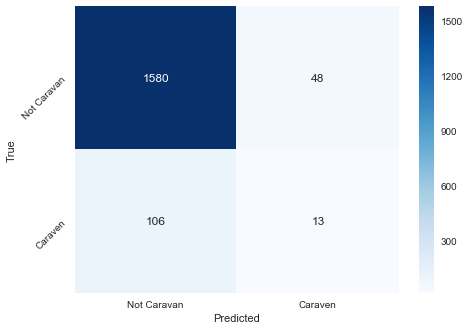

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


[0 1 0 ... 0 0 0]
LGBMClassifier
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 0.00%
Model accuracyselecdropM: 93.19% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and bot

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

0.5
0.5


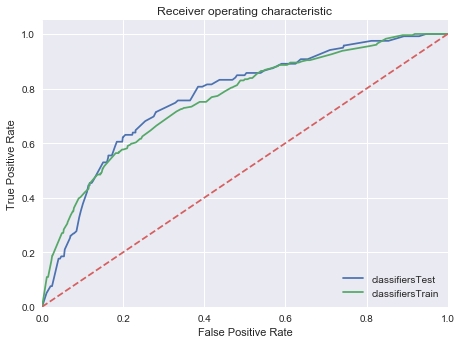

Log LossselecdropM: 0.22
Brier score loss: 0.07
BenefitItemselecdropM: 0
BenefitCoselecdropM: 0.00%
CostItemselecdropM: 0
CostCoselecdropM: 0.00%
ImproveRatioselecdropM: 0.00%
balancetradeoffradioselecdropM: 0.00
ProfitratioselecdropM: 0.00

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 0
MaxBudgetPerTargetAudienceBselecdropM: 0.00

In order to reach the profit goal, then the mininum target ordience number and t

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


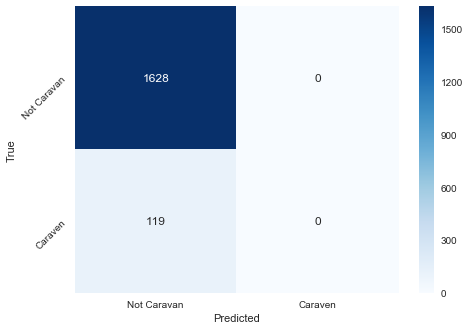

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.631179404427, importance_type='split',
        learning_rate=0.0278025184912, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.0618311835591,
        reg_lambda=0.247428314075, silent=True, subsample=0.999742610272,
        subsample_for_bin=280000, subsample_freq=1, verbose=1)


[0 0 0 ... 0 0 0]
DecisionTreeClassifier
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 4.58%
Model accuracyselecdropM: 92.84% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitti

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


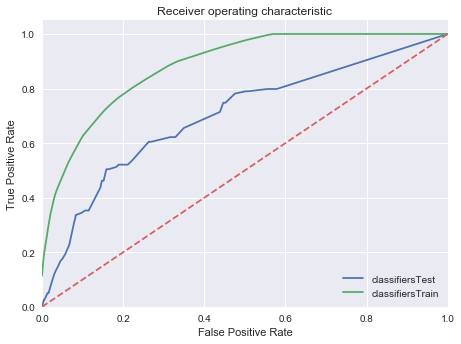

Log LossselecdropM: 0.78
Brier score loss: 0.07
BenefitItemselecdropM: 3
BenefitCoselecdropM: 2.52%
CostItemselecdropM: 12
CostCoselecdropM: 0.69%
ImproveRatioselecdropM: 367.02%
balancetradeoffradioselecdropM: 4.00
ProfitratioselecdropM: 0.25

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1142
MaxBudgetPerTargetAudienceBselecdropM: 175.13

In order to reach the profit goal, then the mininum target ordience numb

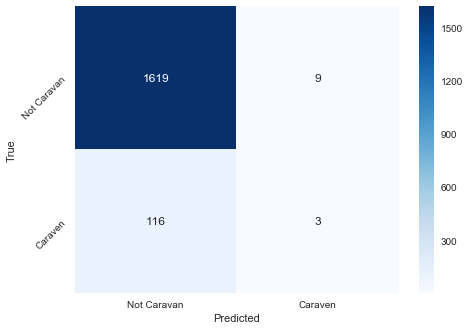

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[0 0 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.4s finished


RandomForestClassifier
****ResultsselecdropM****

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


F-scoreselecdropM: 28.43%
Model accuracyselecdropM: 83.57% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


0.6703926042161337
0.7769320816500782


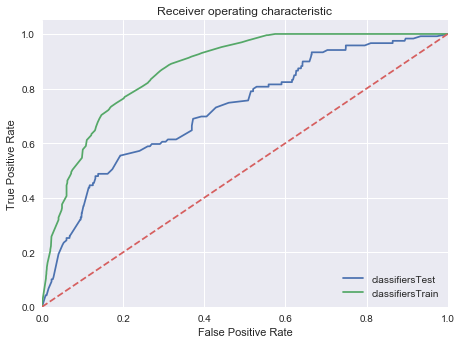

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Log LossselecdropM: 0.45


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Brier score loss: 0.16
BenefitItemselecdropM: 57
BenefitCoselecdropM: 47.90%
CostItemselecdropM: 282
CostCoselecdropM: 16.14%
ImproveRatioselecdropM: 296.74%
balancetradeoffradioselecdropM: 4.95
ProfitratioselecdropM: 0.20

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1414
MaxBudgetPerTargetAudienceBselecdropM: 141.44

In order to reach the profit goal, then the mininum target ordience number and the maximum bu

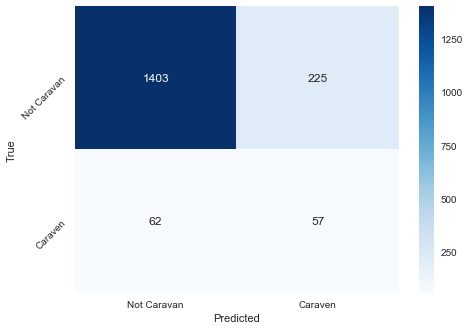

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=1e-07,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)




[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


[0 1 1 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


ExtraTreesClassifier
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 28.79%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Model accuracyselecdropM: 84.14% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


0.6695693019222432
0.7755287067377892


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


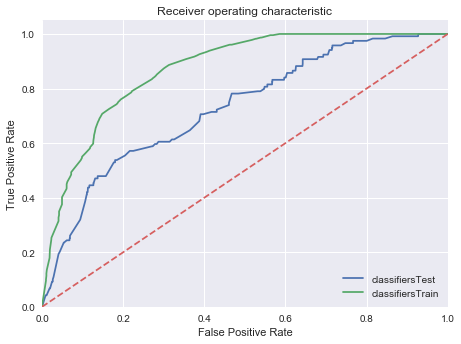

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Log LossselecdropM: 0.42
Brier score loss: 0.16
BenefitItemselecdropM: 56
BenefitCoselecdropM: 47.06%
CostItemselecdropM: 270
CostCoselecdropM: 15.46%
ImproveRatioselecdropM: 304.49%
balancetradeoffradioselecdropM: 4.82
ProfitratioselecdropM: 0.21

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1377
MaxBudgetPerTargetAudienceBselecdropM: 145.24

In order to reach the profit goal, then the mininum target ordience 

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


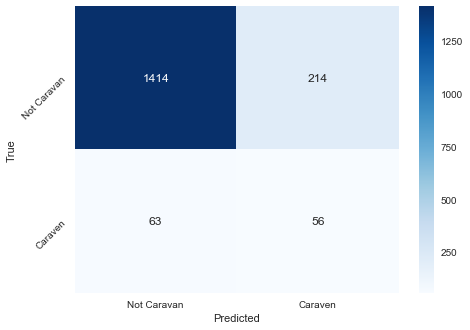

ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
           criterion='gini', max_depth=15, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)




[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


[0 1 1 ... 0 0 0]
LinearDiscriminantAnalysis
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 4.69%
Model accuracyselecdropM: 93.02% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.5107622901740548
0.519857300842252


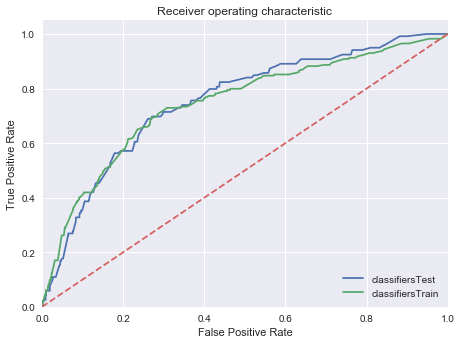

Log LossselecdropM: 0.23
Brier score loss: 0.07
BenefitItemselecdropM: 3
BenefitCoselecdropM: 2.52%
CostItemselecdropM: 9
CostCoselecdropM: 0.52%
ImproveRatioselecdropM: 489.36%
balancetradeoffradioselecdropM: 3.00
ProfitratioselecdropM: 0.33

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 857
MaxBudgetPerTargetAudienceBselecdropM: 233.37

In order to reach the profit goal, then the mininum target ordience number

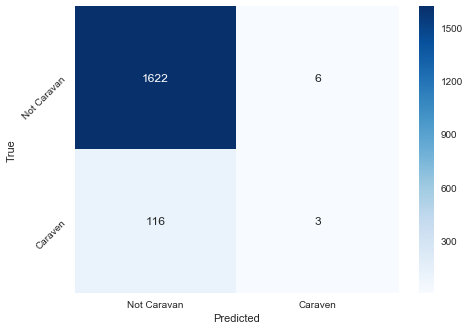

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


[0 0 0 ... 0 0 0]
BernoulliNB
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 0.00%
Model accuracyselecdropM: 93.19% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.5
0.5031967654252022


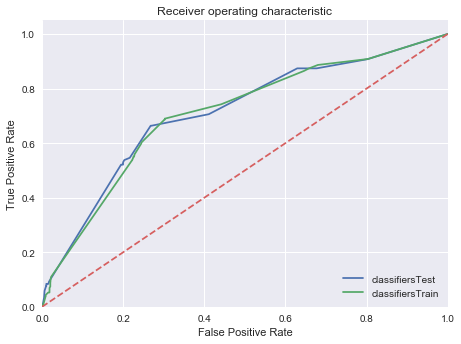

Log LossselecdropM: 0.23
Brier score loss: 0.07
BenefitItemselecdropM: 0
BenefitCoselecdropM: 0.00%
CostItemselecdropM: 0
CostCoselecdropM: 0.00%
ImproveRatioselecdropM: 0.00%
balancetradeoffradioselecdropM: 0.00
ProfitratioselecdropM: 0.00

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 0
MaxBudgetPerTargetAudienceBselecdropM: 0.00

In order to reach the profit goal, then the mininum target ordience number and t

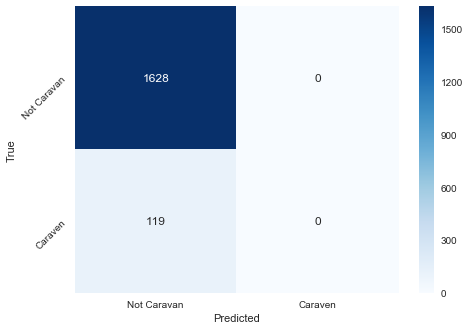

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


[0 0 0 ... 0 0 0]
[LibLinear]==============================================================================================================
LogisticRegression
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 24.09%
Model accuracyselecdropM: 70.06% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.6991694712282948
0.7011589197192342


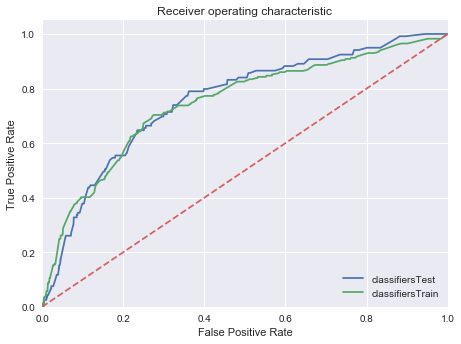

Log LossselecdropM: 0.57
Brier score loss: 0.30
BenefitItemselecdropM: 83
BenefitCoselecdropM: 69.75%
CostItemselecdropM: 570
CostCoselecdropM: 32.63%
ImproveRatioselecdropM: 213.77%
balancetradeoffradioselecdropM: 6.87
ProfitratioselecdropM: 0.15

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1962
MaxBudgetPerTargetAudienceBselecdropM: 101.94

In order to reach the profit goal, then the mininum target ordience 

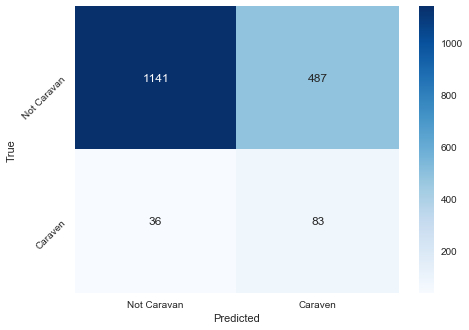

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=2, warm_start=False)


[0 1 1 ... 0 0 1]
[LibSVM]==============================================================================================================
SVC
****ResultsselecdropM****

----------------Unhelpful Scores

F-scoreselecdropM: 26.90%
Model accuracyselecdropM: 78.53% 

----------------Useful Scores: loss and cost-benefit scores

ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): 
If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
0.69010024

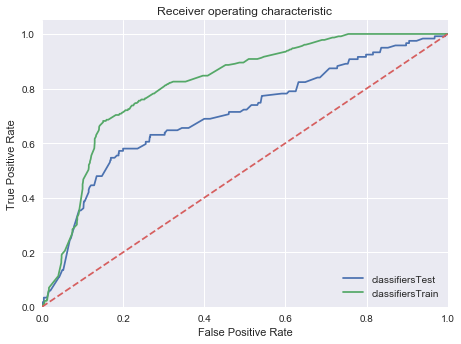

Log LossselecdropM: 0.23
Brier score loss: 0.21
BenefitItemselecdropM: 69
BenefitCoselecdropM: 57.98%
CostItemselecdropM: 394
CostCoselecdropM: 22.55%
ImproveRatioselecdropM: 257.10%
balancetradeoffradioselecdropM: 5.71
ProfitratioselecdropM: 0.18

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBselecdropM: 1631
MaxBudgetPerTargetAudienceBselecdropM: 122.62

In order to reach the profit goal, then the mininum target ordience 

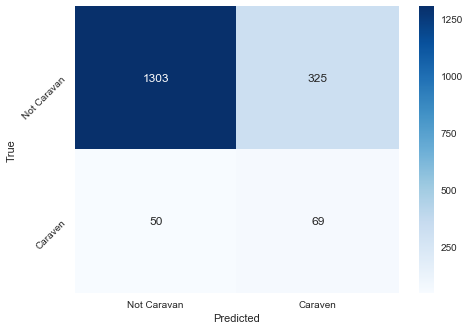

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=True)


[1 1 1 ... 0 0 0]


In [85]:
def draw_confusion_matricesselecdropM(confusion_matriciesselecdropM,class_namesselecdropM):
    class_namesselecdropM = class_namesselecdropM.tolist()
    for cm in confusion_matricesselecdropM:
        classifier, cm = cm[0], cm[1]
        print'Confusion matrixselecdropM:\n', cm              
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.heatmap(cm, annot=True, ax = ax,cmap='Blues', fmt='g'); #annot=True to annotate cells 
        plt.ylabel('True')
        plt.xlabel('Predicted')    
        ax.xaxis.set_ticklabels(['Not Caravan', 'Caraven'],horizontalalignment="center"); ax.yaxis.set_ticklabels(['Not Caravan', 'Caraven'],rotation=45);
        plt.show()   
    
        
class_namesselecdropM = np.unique(np.array(y_TestselecdropM))

# Logging for Visual Comparison
log_colsselecUdropM = ["Classifier", "F-score","Accuracy"]
logselecUdropM = pd.DataFrame(columns=log_colsselecUdropM)

log_colsselecdropM=["Classifier", "Log Loss","OverfittingRoc", "BLoss","BI","BO", "CI", "CO", "IR","BTOR","PR"] 
logselecdropM = pd.DataFrame(columns=log_colsselecdropM)

log_colsCBAselecdropM =["Classifier", "MTAB","MBPTAB","MTAP","MBPTAP"]
logCBAselecdropM = pd.DataFrame(columns=log_colsCBAselecdropM)

for clf in classifiers:
    clf.fit(X_TrainselecdropM, y_TrainselecdropM)
    nameselecdropM = clf.__class__.__name__
    
    print("="*110)
    print(nameselecdropM)
    
    print('****ResultsselecdropM****')
    print('\n----------------Unhelpful Scores\n')

    test_predictionsselecdropM = clf.predict(X_TestselecdropM)
    accselecdropM = f1_score(y_TestselecdropM, test_predictionsselecdropM)
    print("F-scoreselecdropM: {:.2%}".format(accselecdropM))
    
    test_predictionsselecdropM = clf.predict(X_TestselecdropM)
    acc2selecdropM = accuracy_score(y_TestselecdropM, test_predictionsselecdropM)

    print('Model accuracyselecdropM: {:.2%} '.format(acc2selecdropM))
    
    
    print('\n----------------Useful Scores: loss and cost-benefit scores\n')
    
    print('ROC just used here this to check overfitting(since if focus on positive values(0 here, not caravan), but we cares more about negative values): \nIf both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.')

    RocScoreselec=roc_auc_score(y_TestselecdropM, clf.predict(X_TestselecdropM))
    fprBselec, tprBselec, thresholdsBselec = roc_curve(y_TestselecdropM, clf.predict_proba(X_TestselecdropM)[:,1])
    RocScoreTrainselec=roc_auc_score(y_TrainselecdropM, clf.predict(X_TrainselecdropM))
    fprBTrainselec, tprBTrainselec, thresholdsBTrainselec = roc_curve(y_TrainselecdropM, clf.predict_proba(X_TrainselecdropM)[:,1])
    
    OverfittingRocselec=float(format(RocScoreselec-RocScoreTrainselec,'.2f'))

    
    print RocScoreselec
    print RocScoreTrainselec
    plt.figure()
    plt.plot(fprBselec, tprBselec,  label='classifiersTest' % RocScoreselec)
    plt.plot(fprBTrainselec, tprBTrainselec, label='classifiersTrain' % RocScoreTrainselec)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()  
    
    test_predictionsdropM = clf.predict_proba(X_TestselecdropM)
    llselecdropM = log_loss(y_TestselecdropM, test_predictionsdropM)
    print("Log LossselecdropM: {:.2f}".format(llselecdropM))

    test_predictionsdropM = clf.predict(X_TestselecdropM)
    
    # This function returns a score of the mean square difference between the actual outcome and the predicted probability of the possible outcome. The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual outcome can be a value between 0 and 1.The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), the more accurate the prediction is. It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.
    BLossselec= brier_score_loss(y_TestselecdropM, test_predictionsselecdropM)
    print("Brier score loss: {:.2f}".format(BLossselec))
    
    test_predictionsselecdropM = clf.predict(X_TestselecdropM)
    confusionselecdropM = metrics.confusion_matrix(y_TestselecdropM, test_predictionsselecdropM)
    TPselecdropM = confusionselecdropM[0, 0]
    TNselecdropM = confusionselecdropM[1, 1]
    FPselecdropM = confusionselecdropM[1, 0]
    FNselecdropM = confusionselecdropM[0, 1]
    BenefitItemselecdropM = TNselecdropM 
    BenefitCoselecdropM = TNselecdropM / (TNselecdropM + FPselecdropM) # this is specificity in statistics 
    print("BenefitItemselecdropM: {}".format(BenefitItemselecdropM))
    print("BenefitCoselecdropM: {:.2%}".format(BenefitCoselecdropM))
    
    CostItemselecdropM = (TNselecdropM + FNselecdropM)
    CostCoselecdropM = (TNselecdropM + FNselecdropM) / (TPselecdropM + TNselecdropM + FPselecdropM +FNselecdropM) 
          
    print("CostItemselecdropM: {}".format(CostItemselecdropM))
    print("CostCoselecdropM: {:.2%}".format(CostCoselecdropM))
    if CostCoselecdropM == 0: 
        ImproveRatioselecdropM = 0
    else: 
        ImproveRatioselecdropM = (BenefitItemselecdropM/CostItemselecdropM) /((TNselecdropM+FPselecdropM) /(TPselecdropM + TNselecdropM + FPselecdropM +FNselecdropM))   
    print(CBLUE+"ImproveRatioselecdropM: {:.2%}".format(ImproveRatioselecdropM)+CEND)
    
    #scenario BenefitItem*price-CostItem*
    if BenefitItemselecdropM == 0:
        balancetradeoffradioselecdropM = 0
    else:
        balancetradeoffradioselecdropM = float(format(CostItemselecdropM/BenefitItemselecdropM , '.2f'))
    if CostCoselecdropM == 0: 
        ProfitratioselecdropM=0
    else:
        ProfitratioselecdropM = float(format(BenefitItemselecdropM/CostItemselecdropM, '.2f'))
    print(CBLUE+"balancetradeoffradioselecdropM: {0:.2f}".format(balancetradeoffradioselecdropM)+CEND)
    print(CBLUE+"ProfitratioselecdropM: {0:.2f}".format(ProfitratioselecdropM)+CEND)

    
    print('\n----------------Scenario analysis shreshold: marketing and controlling strategies\n')
    #   #Scenario: give a budget and the revenue, then I can predict, how much you can spend on each costItem or how many costItem can be spent 
    Budget = 200000
    #One scenario considers benefitgoal, one scenario considers the balance, no deficit
    ProfitGoal= 20000
    # Proft maybe 700 every year, the profit of every Customer is the Reveneue from each customer minus the cost of the customer management 
    ProfitPerBenefitItem = 700

    print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+CBLUE+'\nThen to keep the account balance not to be deficit, then the insurance company should be:\n\n'+CEND)
# within this budget, the smallest amount of  target audience should be reached, in order to keep the balance of the account 
# Min CostItem
    if balancetradeoffradioselecdropM == 0:
        MinTargetAudienceBselecdropM = 0
    else:
        MinTargetAudienceBselecdropM= int((Budget/ProfitPerBenefitItem)*balancetradeoffradioselecdropM)
    
    #For every Target Audience, how much the company can spend for max. so that the company can keep the balance and avoid deficit
    if MinTargetAudienceBselecdropM == 0:
        MaxBudgetPerTargetAudienceBselecdropM = 0
    else:
        MaxBudgetPerTargetAudienceBselecdropM = float(format(Budget/MinTargetAudienceBselecdropM, '.2f'))
    
    #To reach the benifit goal, at least MinTargetAudienceP should be reached 
    if balancetradeoffradioselecdropM == 0:
        MinTargetAudiencePselecdropM = 0
    else:
        MinTargetAudiencePselecdropM = int(((Budget + ProfitGoal)/ProfitPerBenefitItem)*balancetradeoffradioselecdropM)
    
    #To reach the benifit goal, at most MaxBudgetPerTargetAudienceP can be spent 
    if MinTargetAudienceBselecdropM == 0:
        MaxBudgetPerTargetAudiencePselecdropM = 0
    else:
        MaxBudgetPerTargetAudiencePselecdropM = float(format(Budget/MinTargetAudiencePselecdropM, '.2f'))
    
    
    print(CRED+"MinTargetAudienceBselecdropM: {}".format(MinTargetAudienceBselecdropM)+CEND)
    print(CRED+"MaxBudgetPerTargetAudienceBselecdropM: {0:.2f}".format(MaxBudgetPerTargetAudienceBselecdropM)+CEND) 
    print('\nIn order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audience are:')
    print(CRED+"MinTargetAudiencePselecdropM: {}".format(MinTargetAudiencePselecdropM)+CEND)
    print(CRED+"MaxBudgetPerTargetAudiencePselecdropM: {0:.2f}".format(MaxBudgetPerTargetAudiencePselecdropM)+CEND+"\n")

    log_entryselecUdropM = pd.DataFrame([[nameselecdropM, accselecdropM,acc2selecdropM]], columns=log_colsselecUdropM)#FPR*100,
    logselecUdropM = logselecUdropM.append(log_entryselecUdropM,ignore_index=True)

    log_entryselecdropM = pd.DataFrame([[nameselecdropM,llselecdropM,OverfittingRocselec, BLossselec,BenefitItemselecdropM,BenefitCoselecdropM, CostItemselecdropM, CostCoselecdropM,ImproveRatioselecdropM,balancetradeoffradioselecdropM,ProfitratioselecdropM]], columns=log_colsselecdropM)#FPR*100,
    logselecdropM = logselecdropM.append(log_entryselecdropM,ignore_index=True)
        
    
    log_entryCBAselecdropM = pd.DataFrame([[nameselecdropM,MinTargetAudienceBselecdropM,MaxBudgetPerTargetAudienceBselecdropM,MinTargetAudiencePselecdropM,MaxBudgetPerTargetAudiencePselecdropM]], columns=log_colsCBAselecdropM)
    logCBAselecdropM = logCBAselecdropM.append(log_entryCBAselecdropM,ignore_index=True)
    
    
    reportselecdropM = classification_report(y_TestselecdropM, test_predictionsselecdropM)
    print(reportselecdropM)
    confusion_matricesselecdropM = [
    ( "", confusion_matrix(y_TestselecdropM, test_predictionsselecdropM))
    ]
    draw_confusion_matricesselecdropM(confusion_matricesselecdropM,class_namesselecdropM)
    
    print("="*60)
    print(str(clf));print('\n')
    
    predictions = clf.predict(OutputselecdropM)
    print predictions
    #new_column = df['Classifiers'] 
#    pd.DataFrame(predictions).to_csv('C:\Users\chenp\Desktop\output.csv', index = False,header = False, sep=',', mode='a',encoding ='utf-8')
    with open('C:\Users\chenp\Desktop\output.selec.4.3.1.2.csv', 'a') as csvfile:#, newline=''
                fwriter = csv.writer(csvfile, delimiter=',',quotechar='/',quoting=csv.QUOTE_MINIMAL)#, 
                fwriter.writerow(predictions)

#### 4.3.1.3 Train, test and evaluate the models with the datasets:  Smote X_TraindropM2, y_TraindropM2 

KNeighborsClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 12.37%
Model accuracydropM: 90.27% 
ROC just use this to check overfitting: 

0.5310712737183325
0.7849713988559542


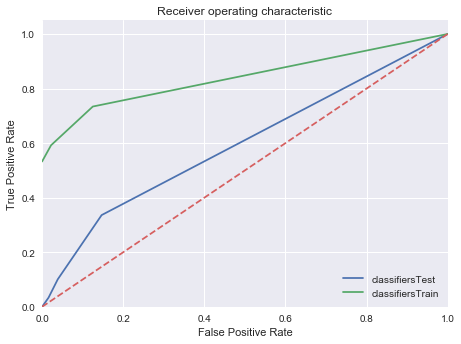


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 2.16
Brier score loss: 0.10
BenefitItemdropM: 12
BenefitCodropM: 10.08%
CostItemdropM: 75
CostCodropM: 4.29%
ImproveRatio: 234.89%
balancetradeoffradio: 6.25
balancetradeoffradio: 6.25
ProfitratiodropM: 0.89

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1785
MaxBudgetPerTargetAudienceBdropM: 112.04

In order to reach the profit goal, then t

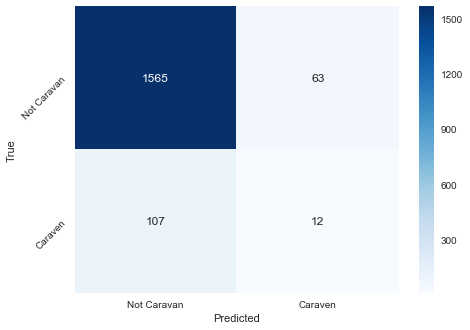

[0 1 1 ... 0 0 0]
AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 26.53%
Model accuracydropM: 75.90% 
ROC just use this to check overfitting: 

0.703234364999071
0.7758710348413936


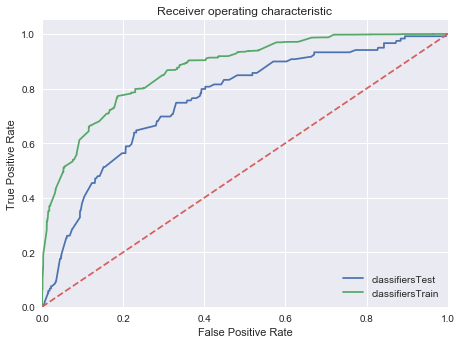


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.68
Brier score loss: 0.24
BenefitItemdropM: 76
BenefitCodropM: 63.87%
CostItemdropM: 454
CostCodropM: 25.99%
ImproveRatio: 245.76%
balancetradeoffradio: 5.97
balancetradeoffradio: 5.97
ProfitratiodropM: 0.15

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1705
MaxBudgetPerTargetAudienceBdropM: 117.30

In order to reach the profit goal, then

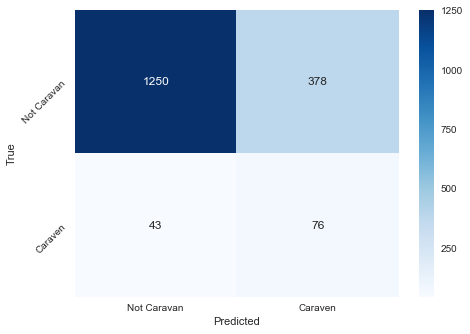

[0 1 1 ... 0 0 0]
GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.80%
Model accuracydropM: 88.09% 
ROC just use this to check overfitting: 

0.585607953255012
0.8965158606344253


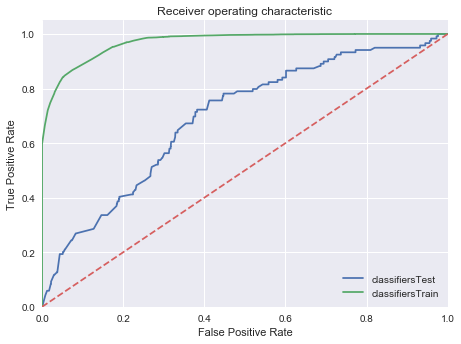


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.36
Brier score loss: 0.12
BenefitItemdropM: 29
BenefitCodropM: 24.37%
CostItemdropM: 147
CostCodropM: 8.41%
ImproveRatio: 289.62%
balancetradeoffradio: 5.07
balancetradeoffradio: 5.07
ProfitratiodropM: 0.46

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1448
MaxBudgetPerTargetAudienceBdropM: 138.12

In order to reach the profit goal, then 

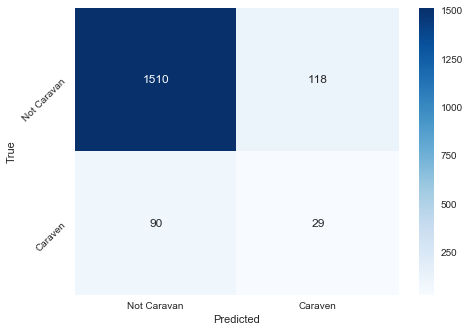

[0 0 0 ... 0 0 0]
LGBMClassifier
LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.631179404427, importance_type='split',
        learning_rate=0.0278025184912, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.0618311835591,
        reg_lambda=0.247428314075, silent=True, subsample=0.999742610272,
        subsample_for_bin=280000, subsample_freq=1, verbose=1)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 24.76%
Model accuracydropM: 77.73% 
ROC just use this to check overfitting: 



c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6663277104453574
0.8095423816952678


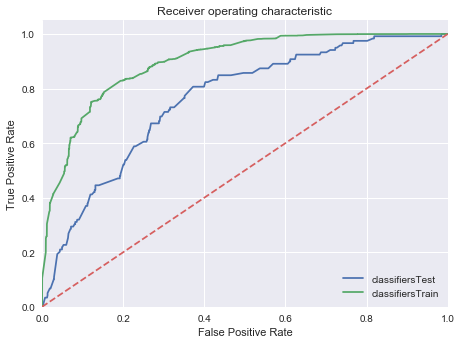


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.46
Brier score loss: 0.22
BenefitItemdropM: 64
BenefitCodropM: 53.78%
CostItemdropM: 398
CostCodropM: 22.78%
ImproveRatio: 236.07%
balancetradeoffradio: 6.22
balancetradeoffradio: 6.22
ProfitratiodropM: 0.17

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1777
MaxBudgetPerTargetAudienceBdropM: 112.55

In order to reach the profit goal, then

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


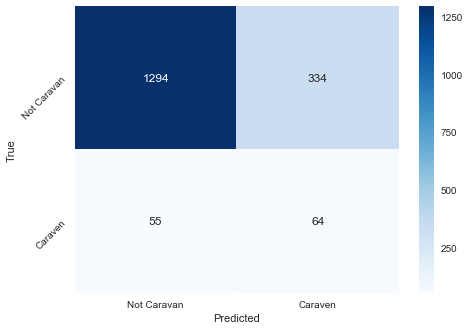

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 1 1 ... 1 1 0]
DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.53%
Model accuracydropM: 81.22% 
ROC just use this to check overfitting: 

0.6110658022422728
0.874544981799272


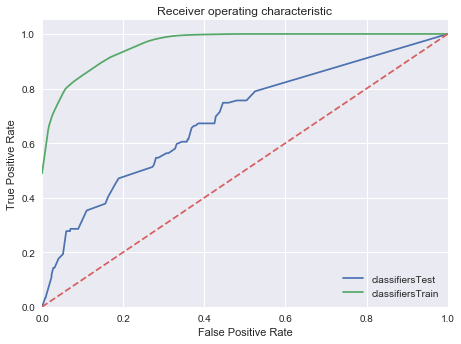


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 1.06
Brier score loss: 0.19
BenefitItemdropM: 45
BenefitCodropM: 37.82%
CostItemdropM: 299
CostCodropM: 17.12%
ImproveRatio: 220.95%
balancetradeoffradio: 6.64
balancetradeoffradio: 6.64
ProfitratiodropM: 0.22

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1897
MaxBudgetPerTargetAudienceBdropM: 105.43

In order to reach the profit goal, then

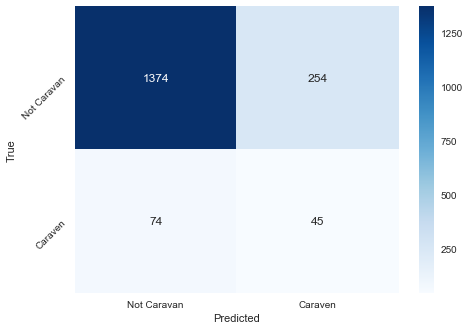

[0 0 0 ... 0 1 0]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=1e-07,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 27.76%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Model accuracydropM: 85.40% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


0.6490641711229946
0.874154966198648


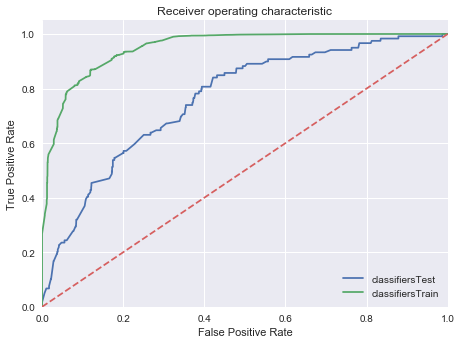


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.39


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Brier score loss: 0.15
BenefitItemdropM: 49
BenefitCodropM: 41.18%
CostItemdropM: 234
CostCodropM: 13.39%
ImproveRatio: 307.42%
balancetradeoffradio: 4.78
balancetradeoffradio: 4.78
ProfitratiodropM: 0.29

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1365
MaxBudgetPerTargetAudienceBdropM: 146.52

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audien

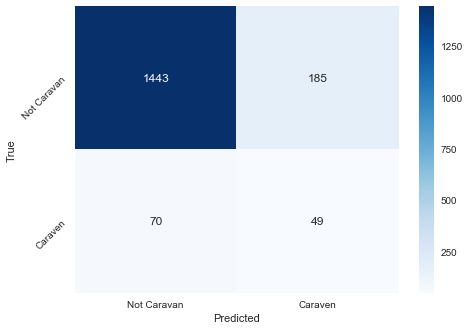

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 0 0 0]


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
           criterion='gini', max_depth=15, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 29.03%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Model accuracydropM: 82.37% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


0.6873103049573638
0.8195527821112844


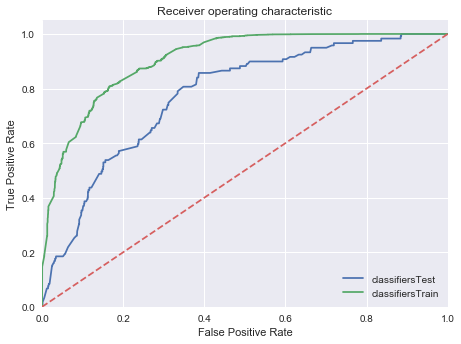


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.47


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Brier score loss: 0.18
BenefitItemdropM: 63
BenefitCodropM: 52.94%
CostItemdropM: 315
CostCodropM: 18.03%
ImproveRatio: 293.61%
balancetradeoffradio: 5.00
balancetradeoffradio: 5.00
ProfitratiodropM: 0.21

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1428
MaxBudgetPerTargetAudienceBdropM: 140.06

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audien

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


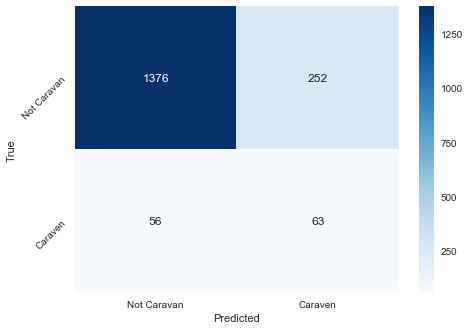

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


[0 1 1 ... 0 0 0]
LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 24.15%
Model accuracydropM: 68.00% 
ROC just use this to check overfitting: 

0.7114802923626453
0.6783671346853875


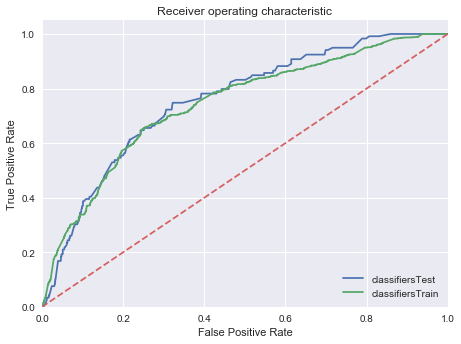


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.58
Brier score loss: 0.32
BenefitItemdropM: 89
BenefitCodropM: 74.79%
CostItemdropM: 618
CostCodropM: 35.37%
ImproveRatio: 211.42%
balancetradeoffradio: 6.94
balancetradeoffradio: 6.94
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1982
MaxBudgetPerTargetAudienceBdropM: 100.91

In order to reach the profit goal, then

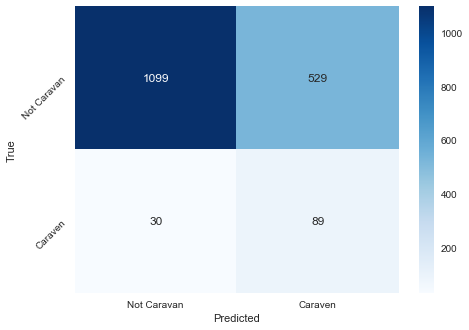

[0 1 1 ... 0 0 1]
BernoulliNB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 25.20%
Model accuracydropM: 72.81% 
ROC just use this to check overfitting: 

0.7022278198748787
0.6964378575143004


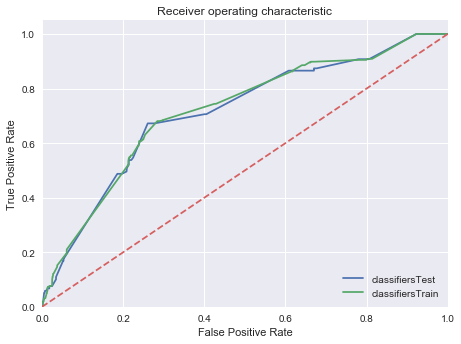


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.60
Brier score loss: 0.27
BenefitItemdropM: 80
BenefitCodropM: 67.23%
CostItemdropM: 516
CostCodropM: 29.54%
ImproveRatio: 227.61%
balancetradeoffradio: 6.45
balancetradeoffradio: 6.45
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1842
MaxBudgetPerTargetAudienceBdropM: 108.58

In order to reach the profit goal, then

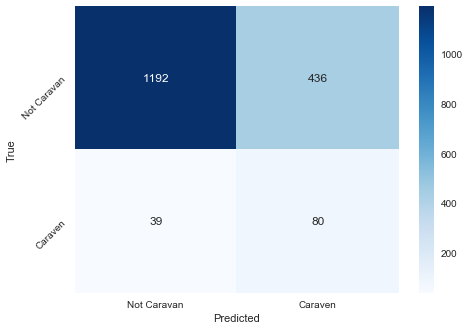

[0 1 1 ... 1 0 0]
[LibLinear]==============================================================================================================
LogisticRegression
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=2, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 24.01%
Model accuracydropM: 68.12% 
ROC just use this to check overfitting: 

0.7081999876117523
0.6777171086843474


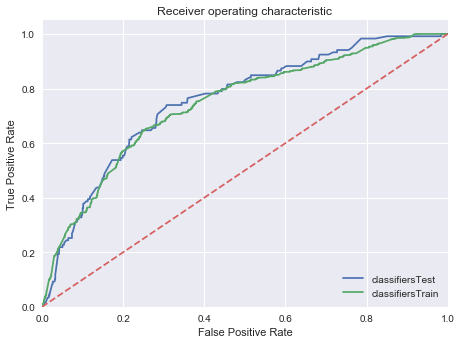


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.57
Brier score loss: 0.32
BenefitItemdropM: 88
BenefitCodropM: 73.95%
CostItemdropM: 614
CostCodropM: 35.15%
ImproveRatio: 210.41%
balancetradeoffradio: 6.98
balancetradeoffradio: 6.98
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1994
MaxBudgetPerTargetAudienceBdropM: 100.30

In order to reach the profit goal, then

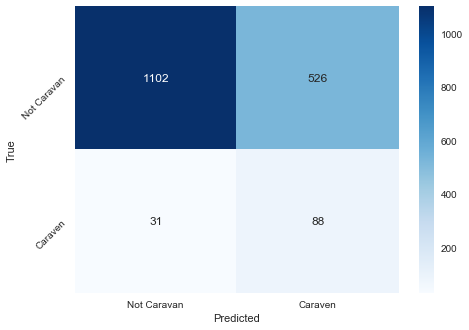

[0 1 1 ... 0 0 1]
[LibSVM]==============================================================================================================
SVC
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 22.85%
Model accuracydropM: 76.42% 
ROC just use this to check overfitting: 

0.6475801622860446
0.7901716068642746


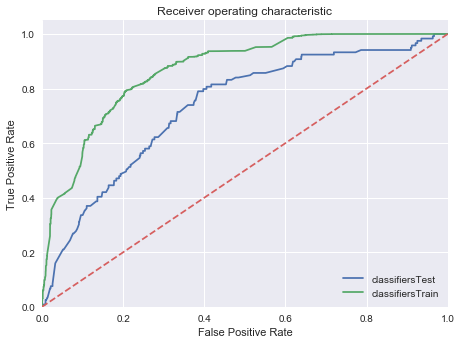


----------------Useful Scores: loss and cost-benefit scores

Log LossdropM: 0.50
Brier score loss: 0.24
BenefitItemdropM: 61
BenefitCodropM: 51.26%
CostItemdropM: 415
CostCodropM: 23.76%
ImproveRatio: 215.79%
balancetradeoffradio: 6.80
balancetradeoffradio: 6.80
ProfitratiodropM: 0.16

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropM: 1942
MaxBudgetPerTargetAudienceBdropM: 102.99

In order to reach the profit goal, then

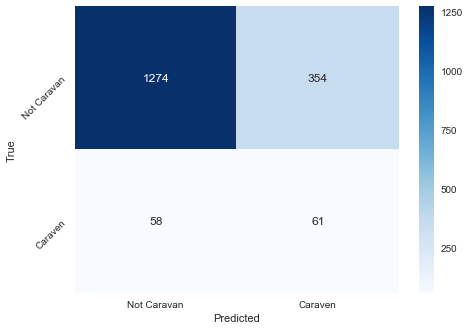

[1 0 1 ... 0 0 0]


In [110]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from __future__ import division

def draw_confusion_matricesdropM2(confusion_matricesdropM2,class_namesdropM2):
    class_namesdropM2 = class_namesdropM2.tolist()
    for cm in confusion_matricesdropM2:
        classifier, cm = cm[0], cm[1]
        print'Confusion matrixdropM:\n', cm              
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.heatmap(cm, annot=True, ax = ax,cmap='Blues', fmt='g'); #annot=True to annotate cells 
        plt.ylabel('True')
        plt.xlabel('Predicted')    
        ax.xaxis.set_ticklabels(['Not Caravan', 'Caraven'],horizontalalignment="center"); ax.yaxis.set_ticklabels(['Not Caravan', 'Caraven'],rotation=45);
        plt.show()   
    
        
class_namesdropM2 = np.unique(np.array(y_TestdropM2))

# Logging for Visual Comparison
log_colsUdropM2 = ["Classifier", "F-score","Accuracy"]
logUdropM2 = pd.DataFrame(columns=log_colsUdropM2)

log_colsdropM2=["Classifier","Log Loss","OverfittingRoc", "BLoss2","BI","BO", "CI", "CO", "IR","BTOR","PR"] 
logdropM2 = pd.DataFrame(columns=log_colsdropM2)

log_colsCBAdropM2 =["Classifier", "MTAB","MBPTAB","MTAP","MBPTAP"]
logCBAdropM2 = pd.DataFrame(columns=log_colsCBAdropM2)


CBLACK  = '\33[30m'
CRED    = '\33[31m'
CGREEN  = '\33[32m'
CYELLOW = '\33[33m'
CBLUE   = '\33[34m'
CVIOLET = '\33[35m'
CBEIGE  = '\33[36m'
CWHITE  = '\33[37m'

CBLACKBG  = '\33[40m'
CREDBG    = '\33[41m'
CGREENBG  = '\33[42m'
CYELLOWBG = '\33[43m'
CBLUEBG   = '\33[44m'
CVIOLETBG = '\33[45m'
CBEIGEBG  = '\33[46m'
CWHITEBG  = '\33[47m'

CGREY    = '\33[90m'
CEND = '\033[0m'

for clf in classifiers:
    clf.fit(X_TraindropM2, y_TraindropM2)
    namedropM2 = clf.__class__.__name__
    
    print("="*110)
    print(namedropM2)
    print(str(clf));print('\n')
    
    print('****************ResultsdropM****************')
    print('\n----------------Unhelpful Scores\n')

    test_predictionsdropM2 = clf.predict(X_TestdropM2)
    accdropM2 = f1_score(y_TestdropM2, test_predictionsdropM2)
    print("F-scoredropM: {:.2%}".format(accdropM2))
    
    test_predictionsdropM2 = clf.predict(X_TestdropM2)
    acc2dropM2 = accuracy_score(y_TestdropM, test_predictionsdropM2)

    print('Model accuracydropM: {:.2%} '.format(acc2dropM2))
     
    
    print('ROC just use this to check overfitting: \n')
#If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
    RocScore2=roc_auc_score(y_TestdropM2, test_predictionsdropM2)
    fprB2, tprB2, thresholdsB2 = roc_curve(y_TestdropM2, clf.predict_proba(X_TestdropM2)[:,1])
    RocScoreTrain2=roc_auc_score(y_TraindropM2, clf.predict(X_TraindropM2))
    fprBTrain2, tprBTrain2, thresholdsBTrain2 = roc_curve(y_TraindropM2, clf.predict_proba(X_TraindropM2)[:,1])
    
    OverfittingRoc2=float(format(RocScore2-RocScoreTrain2,'.2f'))

    
    print RocScore2
    print RocScoreTrain2
    plt.figure()
    plt.plot(fprB2, tprB2, label='classifiersTest' % RocScore2)
    plt.plot(fprBTrain2, tprBTrain2, label='classifiersTrain' % RocScoreTrain2)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    print('\n----------------Useful Scores: loss and cost-benefit scores\n')
    test_predictionsdropM2 = clf.predict_proba(X_TestdropM2)
    lldropM2 = log_loss(y_TestdropM, test_predictionsdropM2)
    print("Log LossdropM: {:.2f}".format(lldropM2))
    
    test_predictionsdropM2 = clf.predict(X_TestdropM2)
    
    # This function returns a score of the mean square difference between the actual outcome and the predicted probability of the possible outcome. The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual outcome can be a value between 0 and 1.The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), the more accurate the prediction is. It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.
    BLoss2= brier_score_loss(y_TestdropM2, test_predictionsdropM2)
    print("Brier score loss: {:.2f}".format(BLoss2))
    
    test_predictionsdropM2 = clf.predict(X_TestdropM2)
    confusiondropM2 = metrics.confusion_matrix(y_TestdropM2, test_predictionsdropM2)
    TPdropM2 = confusiondropM2[0, 0]
    TNdropM2 = confusiondropM2[1, 1]
    FPdropM2 = confusiondropM2[1, 0]
    FNdropM2 = confusiondropM2[0, 1]
    BenefitItemdropM2 = TNdropM2 
    BenefitCodropM2 = TNdropM2 / (TNdropM2 + FPdropM2) # this is specificity in statistics 
    print("BenefitItemdropM: {}".format(BenefitItemdropM2))
    print("BenefitCodropM: {:.2%}".format(BenefitCodropM2))
    
    CostItemdropM2 = (TNdropM2 + FNdropM2)
    CostCodropM2 = (TNdropM2 + FNdropM2) / (TPdropM2 + TNdropM2 + FPdropM2 +FNdropM2) 
          
    print("CostItemdropM: {}".format(CostItemdropM2))
    print("CostCodropM: {:.2%}".format(CostCodropM2))
        
    ImproveRatiodropM2 = (BenefitItemdropM2/CostItemdropM2) /((TNdropM2+FPdropM2) /(TPdropM2 + TNdropM2 + FPdropM2+FNdropM2))   
    print("ImproveRatio: {:.2%}".format(ImproveRatiodropM2))
    
    #scenario BenefitItem*price-CostItem*
    balancetradeoffradiodropM2 = float(format(CostItemdropM2/BenefitItemdropM2 , '.2f'))
    print(CBLUE+"balancetradeoffradio: {0:.2f}".format(balancetradeoffradiodropM2)+CEND)
    ProfitratiodropM2 = float(format(BenefitItemdropM/CostItemdropM2, '.2f'))
    print(CBLUE+"balancetradeoffradio: {0:.2f}".format(balancetradeoffradiodropM2)+CEND)
    print(CBLUE+"ProfitratiodropM: {0:.2f}".format(ProfitratiodropM2)+CEND)
    
    print('\n----------------Scenario analysis shreshold: marketing and controlling strategies\n')
    #   #Scenario: give a budget and the revenue, then I can predict, how much you can spend on each costItem or how many costItem can be spent 
    Budget = 200000
    #One scenario considers benefitgoal, one scenario considers the balance, no deficit
    ProfitGoal= 20000
    # Proft maybe 700 every year, the profit of every Customer is the Reveneue from each customer minus the cost of the customer management 
    ProfitPerBenefitItem = 700

    print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit, then the insurance company should be:\n\n')
# within this budget, the smallest amount of  target audience should be reached, in order to keep the balance of the account 
# Min CostItem
    MinTargetAudienceBdropM2= int((Budget/ProfitPerBenefitItem)*balancetradeoffradiodropM2)
    
    #For every Target Audience, how much the company can spend for max. so that the company can keep the balance and avoid deficit
    MaxBudgetPerTargetAudienceBdropM2 = float(format(Budget/MinTargetAudienceBdropM2, '.2f'))
    
    #To reach the benifit goal, at least MinTargetAudienceP should be reached 
    MinTargetAudiencePdropM2 = int(((Budget + ProfitGoal)/ProfitPerBenefitItem)*balancetradeoffradiodropM2)
    
    #To reach the benifit goal, at most MaxBudgetPerTargetAudienceP can be spent 
    MaxBudgetPerTargetAudiencePdropM2 = float(format(Budget/MinTargetAudiencePdropM2, '.2f'))
    
    
    print("MinTargetAudienceBdropM: {}".format(MinTargetAudienceBdropM2))
    print("MaxBudgetPerTargetAudienceBdropM: {0:.2f}".format(MaxBudgetPerTargetAudienceBdropM2)) 
    print('\nIn order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audience are:')
    print("MinTargetAudiencePdropM: {}".format(MinTargetAudiencePdropM2))
    print("MaxBudgetPerTargetAudiencePdropM: {0:.2f}".format(MaxBudgetPerTargetAudiencePdropM2)+"\n")

    log_entryUdropM2 = pd.DataFrame([[namedropM2, accdropM2,acc2dropM2]], columns=log_colsUdropM2)#FPR*100,
    logUdropM2 = logUdropM2.append(log_entryUdropM2,ignore_index=True)
    
    log_entrydropM2 = pd.DataFrame([[namedropM2,lldropM2,OverfittingRoc2,BLoss2,BenefitItemdropM2,BenefitCodropM2, CostItemdropM2, CostCodropM2,ImproveRatiodropM2,balancetradeoffradiodropM2,ProfitratiodropM2]], columns=log_colsdropM2)#FPR*100,
    logdropM2 = logdropM2.append(log_entrydropM2,ignore_index=True)
        
    
    log_entryCBAdropM2 = pd.DataFrame([[namedropM2,MinTargetAudienceBdropM2,MaxBudgetPerTargetAudienceBdropM2,MinTargetAudiencePdropM2,MaxBudgetPerTargetAudiencePdropM2]], columns=log_colsCBAdropM2)
    logCBAdropM2 = logCBAdropM2.append(log_entryCBAdropM2,ignore_index=True)
   
    reportdropM2 = classification_report(y_TestdropM2, test_predictionsdropM2)
    print(reportdropM2)
    confusion_matricesdropM2 = [
    ( "", confusion_matrix(y_TestdropM2, test_predictionsdropM2))
    ]
    draw_confusion_matricesdropM2(confusion_matricesdropM2,class_namesdropM2)
    predictions = clf.predict(OutputdropM2)
    print predictions
    #new_column = df['Classifiers'] 
#    pd.DataFrame(predictions).to_csv('C:\Users\chenp\Desktop\output.csv', index = False,header = False, sep=',', mode='a',encoding ='utf-8')
    with open('C:\Users\chenp\Desktop\output2.4.3.1.3.csv', 'a') as csvfile:#, newline=''
                fwriter = csv.writer(csvfile, delimiter=',',quotechar='/',quoting=csv.QUOTE_MINIMAL)#, 
                fwriter.writerow(predictions)

### 4.3.2 Train, test and evaluate the models using KFold: Smote X_TraindropM (here with the name X_Train) ; y_TestdropM (here with the name y_Train)

StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
KNeighborsClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.88%
Model accuracySS: 89.70% 
ROC just use this to check overfitting: 

0.5900047236655644
0.69369324141711


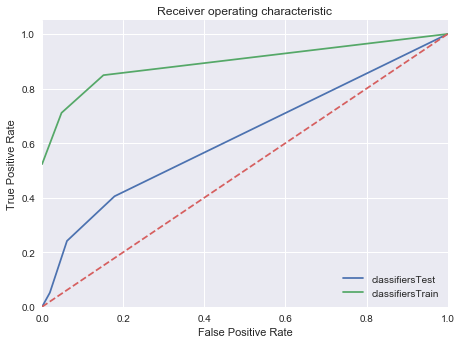


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 1.95
Brier score loss: 0.10
BenefitItemdropMSS: 28
BenefitCodropMSS: 24.14%
CostItemdropMSS: 140
CostCodropMSS: 7.21%
ImproveRatio: 334.66%
balancetradeoffradio: 5.00
balancetradeoffradio: 5.00
ProfitratiodropM: 0.20

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1428
MaxBudgetPerTargetAudienceBdropMSS: 140.06

In order to reach the prof

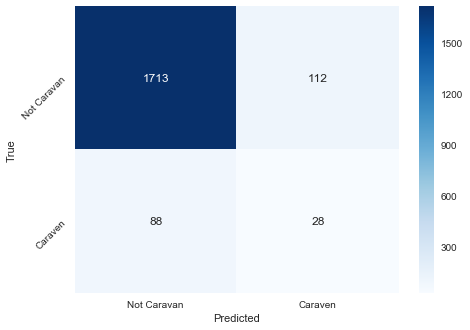

[0 0 1 ... 0 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
KNeighborsClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 13.28%
Model accuracySS: 88.56% 
ROC just use this to check overfitting: 

0.5395772319319793
0.6721161206187808


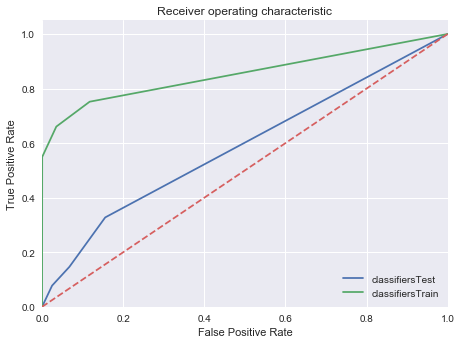


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 2.28
Brier score loss: 0.11
BenefitItemdropMSS: 17
BenefitCodropMSS: 14.66%
CostItemdropMSS: 140
CostCodropMSS: 7.21%
ImproveRatio: 203.18%
balancetradeoffradio: 8.24
balancetradeoffradio: 8.24
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2354
MaxBudgetPerTargetAudienceBdropMSS: 84.96

In order to reach the profi

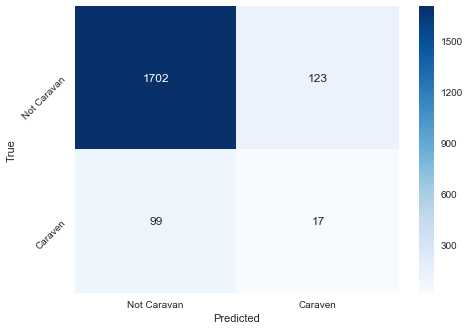

[0 0 1 ... 0 0 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
KNeighborsClassifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 10.10%
Model accuracySS: 90.82% 
ROC just use this to check overfitting: 

0.5233666061705989
0.6431176192725555


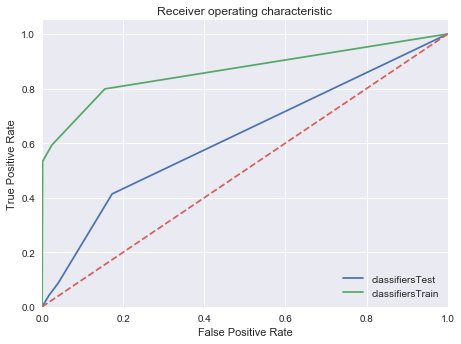


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 1.88
Brier score loss: 0.09
BenefitItemdropMSS: 10
BenefitCodropMSS: 8.62%
CostItemdropMSS: 82
CostCodropMSS: 4.23%
ImproveRatio: 203.95%
balancetradeoffradio: 8.20
balancetradeoffradio: 8.20
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2342
MaxBudgetPerTargetAudienceBdropMSS: 85.40

In order to reach the profit 

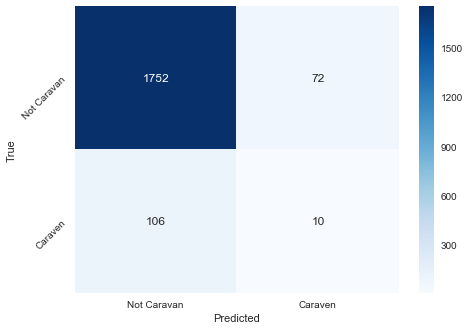

[0 0 1 ... 0 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.03%
Model accuracySS: 77.95% 
ROC just use this to check overfitting: 

0.6445937647614549
0.68911416448531


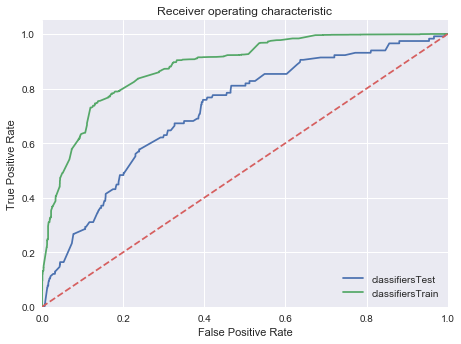


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.68
Brier score loss: 0.22
BenefitItemdropMSS: 57
BenefitCodropMSS: 49.14%
CostItemdropMSS: 426
CostCodropMSS: 21.95%
ImproveRatio: 223.89%
balancetradeoffradio: 7.47
balancetradeoffradio: 7.47
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2134
MaxBudgetPerTargetAudienceBdropMSS: 93.72

In order to reach the prof

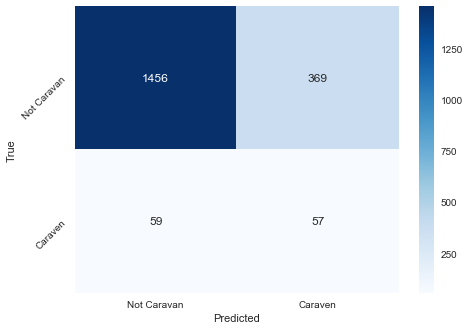

[1 0 0 ... 1 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.02%
Model accuracySS: 71.35% 
ROC just use this to check overfitting: 

0.6781435994331602
0.6801603651449145


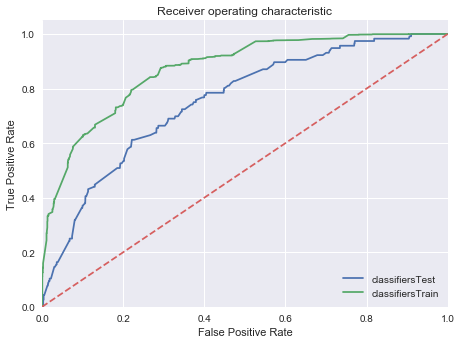


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.68
Brier score loss: 0.29
BenefitItemdropMSS: 74
BenefitCodropMSS: 63.79%
CostItemdropMSS: 588
CostCodropMSS: 30.29%
ImproveRatio: 210.58%
balancetradeoffradio: 7.95
balancetradeoffradio: 7.95
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2271
MaxBudgetPerTargetAudienceBdropMSS: 88.07

In order to reach the prof

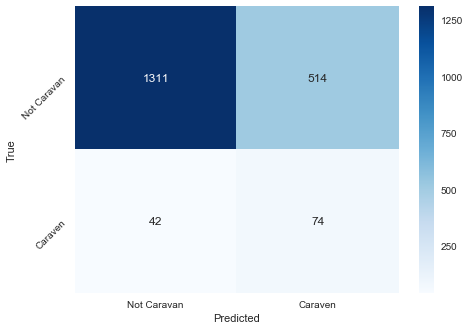

[0 0 1 ... 0 1 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.86%
Model accuracySS: 69.64% 
ROC just use this to check overfitting: 

0.6649841197822142
0.7048181388757676


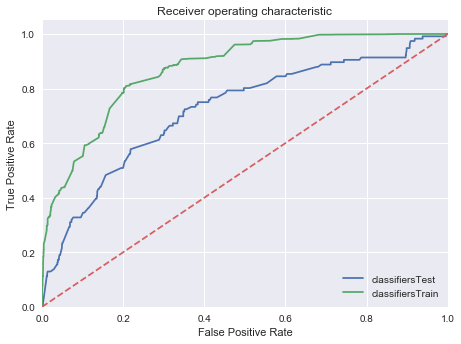


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.68
Brier score loss: 0.30
BenefitItemdropMSS: 73
BenefitCodropMSS: 62.93%
CostItemdropMSS: 619
CostCodropMSS: 31.91%
ImproveRatio: 197.23%
balancetradeoffradio: 8.48
balancetradeoffradio: 8.48
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2422
MaxBudgetPerTargetAudienceBdropMSS: 82.58

In order to reach the prof

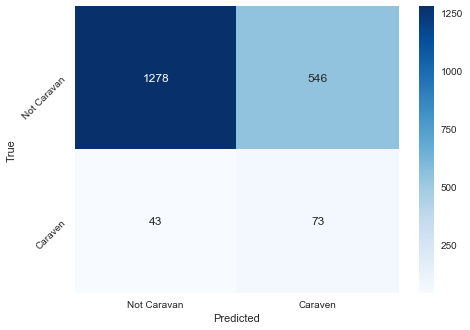

[0 0 1 ... 0 1 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 20.16%
Model accuracySS: 84.08% 
ROC just use this to check overfitti

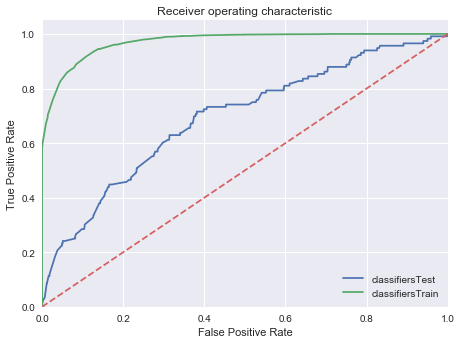


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.35
Brier score loss: 0.16
BenefitItemdropMSS: 39
BenefitCodropMSS: 33.62%
CostItemdropMSS: 271
CostCodropMSS: 13.96%
ImproveRatio: 240.80%
balancetradeoffradio: 6.95
balancetradeoffradio: 6.95
ProfitratiodropM: 0.14

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1985
MaxBudgetPerTargetAudienceBdropMSS: 100.76

In order to reach the pro

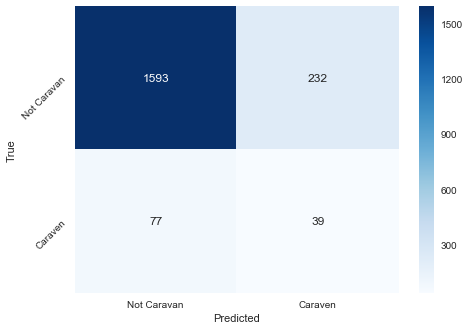

[0 0 1 ... 0 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 23.24%
Model accuracySS: 85.37% 
ROC just use this to check overfitting: 

0.6275366084081246
0.725188644030958


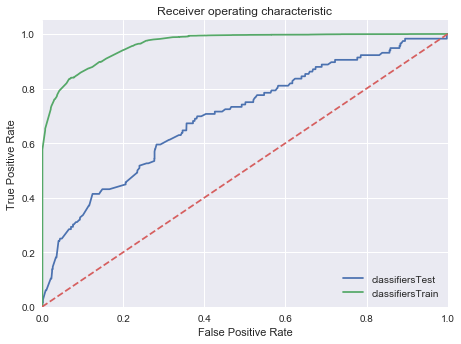


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.38
Brier score loss: 0.15
BenefitItemdropMSS: 43
BenefitCodropMSS: 37.07%
CostItemdropMSS: 254
CostCodropMSS: 13.09%
ImproveRatio: 283.27%
balancetradeoffradio: 5.91
balancetradeoffradio: 5.91
ProfitratiodropM: 0.17

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1688
MaxBudgetPerTargetAudienceBdropMSS: 118.48

In order to reach the pro

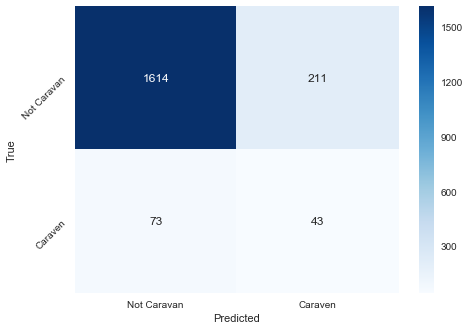

[0 0 0 ... 1 0 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 18.29%
Model accuracySS: 85.26% 
ROC just use this to check overfitting: 

0.5825582274652148
0.7400625885687293


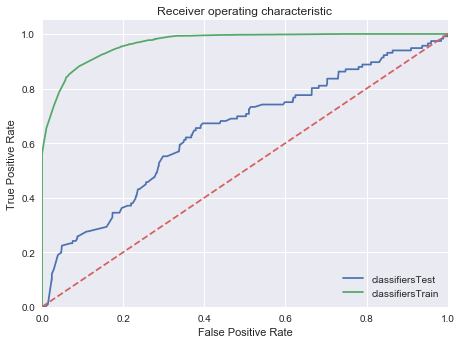


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.47
Brier score loss: 0.15
BenefitItemdropMSS: 32
BenefitCodropMSS: 27.59%
CostItemdropMSS: 234
CostCodropMSS: 12.06%
ImproveRatio: 228.71%
balancetradeoffradio: 7.31
balancetradeoffradio: 7.31
ProfitratiodropM: 0.14

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2088
MaxBudgetPerTargetAudienceBdropMSS: 95.79

In order to reach the prof

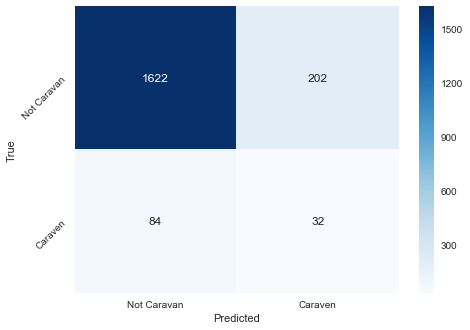

[0 0 0 ... 0 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
LGBMClassifier
LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.631179404427, importance_type='split',
        learning_rate=0.0278025184912, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.0618311835591,
        reg_lambda=0.247428314075, silent=True, subsample=0.999742610272,
        subsample_for_bin=280000, subsample_freq=1, verbose=1)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.00%
Model accuracySS: 

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

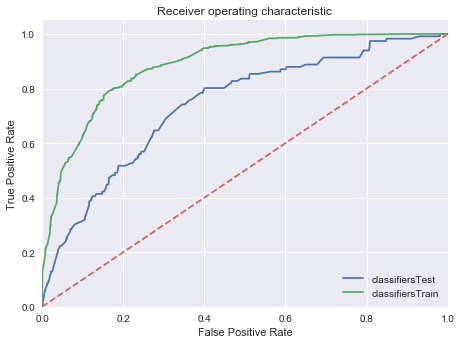


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.48
Brier score loss: 0.24
BenefitItemdropMSS: 61
BenefitCodropMSS: 52.59%
CostItemdropMSS: 465
CostCodropMSS: 23.96%
ImproveRatio: 219.51%
balancetradeoffradio: 7.62
balancetradeoffradio: 7.62
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2177
MaxBudgetPerTargetAudienceBdropMSS: 91.87

In order to reach the prof

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


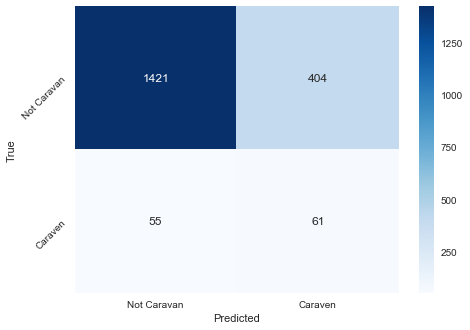

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1 1 1 ... 1 0 1]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
LGBMClassifier
LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.631179404427, importance_type='split',
        learning_rate=0.0278025184912, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.0618311835591,
        reg_lambda=0.247428314075, silent=True, subsample=0.999742610272,
        subsample_for_bin=280000, subsample_freq=1, verbose=1)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.35%
Model accuracySS: 72.28% 
ROC just use this to check overfitting: 

0.6790387

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

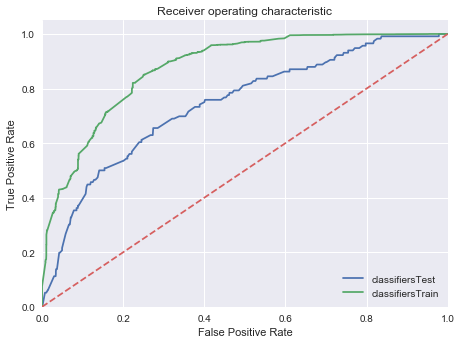


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.50
Brier score loss: 0.28
BenefitItemdropMSS: 73
BenefitCodropMSS: 62.93%
CostItemdropMSS: 568
CostCodropMSS: 29.26%
ImproveRatio: 215.05%
balancetradeoffradio: 7.78
balancetradeoffradio: 7.78
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2222
MaxBudgetPerTargetAudienceBdropMSS: 90.01

In order to reach the prof

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


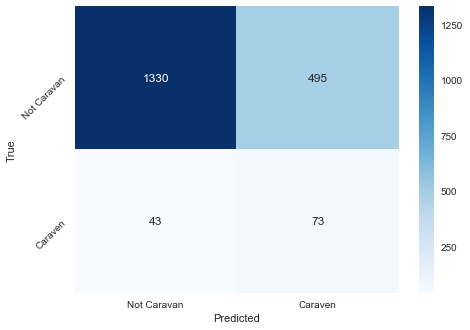

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 1 1 ... 1 1 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
LGBMClassifier
LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.631179404427, importance_type='split',
        learning_rate=0.0278025184912, max_depth=-1, metric='auc',
        min_child_samples=250, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=138, n_jobs=-1, num_leaves=40, objective='binary',
        random_state=50, reg_alpha=0.0618311835591,
        reg_lambda=0.247428314075, silent=True, subsample=0.999742610272,
        subsample_for_bin=280000, subsample_freq=1, verbose=1)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.15%
Model accuracySS: 73.09% 
ROC just use this to check overfitting: 

0.6712416

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

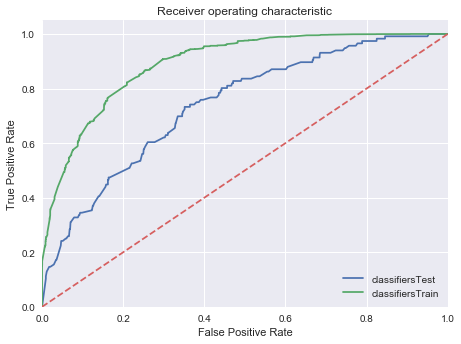


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.47
Brier score loss: 0.27
BenefitItemdropMSS: 70
BenefitCodropMSS: 60.34%
CostItemdropMSS: 546
CostCodropMSS: 28.14%
ImproveRatio: 214.41%
balancetradeoffradio: 7.80
balancetradeoffradio: 7.80
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2228
MaxBudgetPerTargetAudienceBdropMSS: 89.77

In order to reach the prof

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


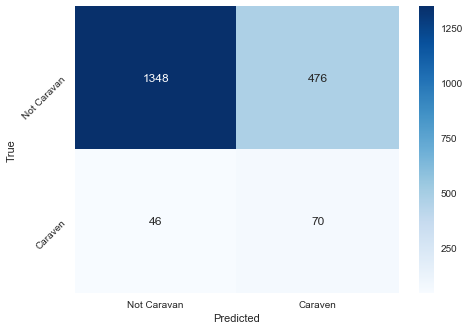

c:\users\chenp\anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0 1 1 ... 1 1 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 20.42%
Model accuracySS: 80.32% 
ROC just use this to check overfitting: 

0.6249055266887105
0.7748084028689957


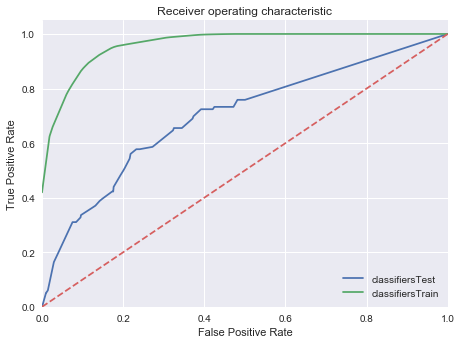


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 1.12
Brier score loss: 0.20
BenefitItemdropMSS: 49
BenefitCodropMSS: 42.24%
CostItemdropMSS: 364
CostCodropMSS: 18.75%
ImproveRatio: 225.25%
balancetradeoffradio: 7.43
balancetradeoffradio: 7.43
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2122
MaxBudgetPerTargetAudienceBdropMSS: 94.25

In order to reach the prof

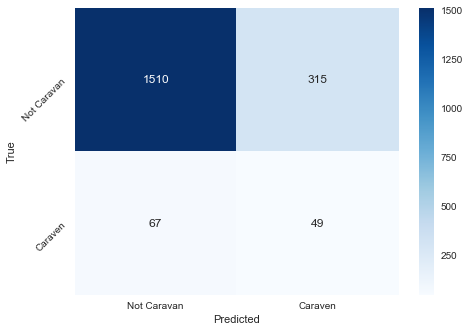

[0 0 1 ... 0 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 18.58%
Model accuracySS: 75.17% 
ROC just use this to check overfitting: 

0.6217264997638167
0.7708364833067161


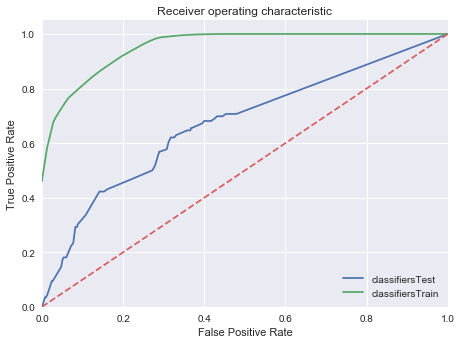


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 1.15
Brier score loss: 0.25
BenefitItemdropMSS: 55
BenefitCodropMSS: 47.41%
CostItemdropMSS: 476
CostCodropMSS: 24.52%
ImproveRatio: 193.34%
balancetradeoffradio: 8.65
balancetradeoffradio: 8.65
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2471
MaxBudgetPerTargetAudienceBdropMSS: 80.94

In order to reach the prof

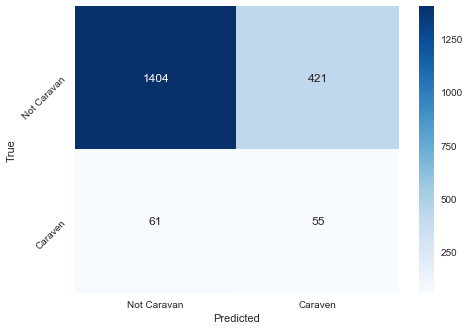

[0 0 1 ... 1 0 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=1e-07, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.16%
Model accuracySS: 86.08% 
ROC just use this to check overfitting: 

0.5869441923774955
0.7471492678318374


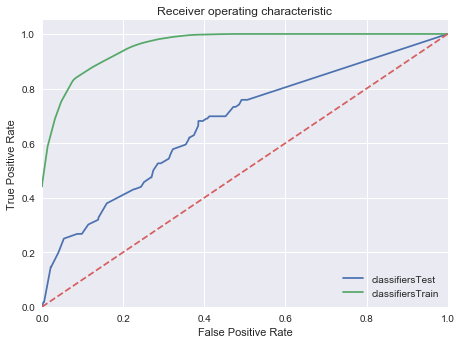


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.93
Brier score loss: 0.14
BenefitItemdropMSS: 32
BenefitCodropMSS: 27.59%
CostItemdropMSS: 218
CostCodropMSS: 11.24%
ImproveRatio: 245.49%
balancetradeoffradio: 6.81
balancetradeoffradio: 6.81
ProfitratiodropM: 0.15

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1945
MaxBudgetPerTargetAudienceBdropMSS: 102.83

In order to reach the pro

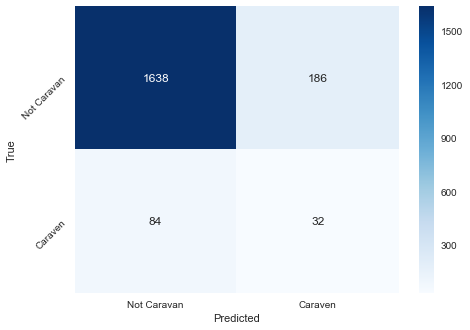

[0 0 0 ... 0 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=1e-07,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


F-scoredropM: 22.06%
Model accuracySS: 83.26% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


0.6284128483703354
0.7769127819619924


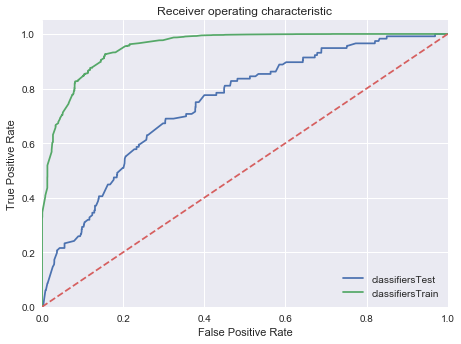


----------------Useful Scores: loss and cost-benefit scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Log LossdropMSS: 0.40


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Brier score loss: 0.17
BenefitItemdropMSS: 46
BenefitCodropMSS: 39.66%
CostItemdropMSS: 301
CostCodropMSS: 15.51%
ImproveRatio: 255.72%
balancetradeoffradio: 6.54
balancetradeoffradio: 6.54
ProfitratiodropM: 0.15

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1868
MaxBudgetPerTargetAudienceBdropMSS: 107.07

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every t

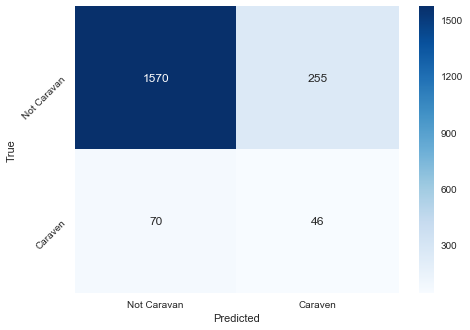

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 1 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=1e-07,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


F-scoredropM: 26.11%
Model accuracySS: 83.67% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


0.670968351440718
0.7847993309456535


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


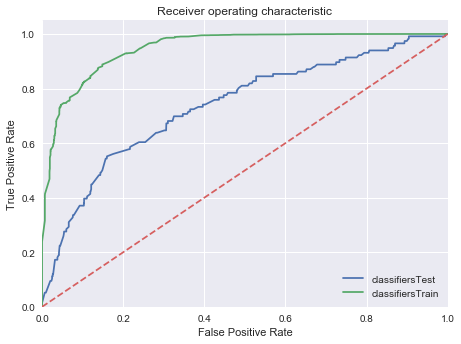


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.41


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Brier score loss: 0.16
BenefitItemdropMSS: 56
BenefitCodropMSS: 48.28%
CostItemdropMSS: 313
CostCodropMSS: 16.13%
ImproveRatio: 299.37%
balancetradeoffradio: 5.59
balancetradeoffradio: 5.59
ProfitratiodropM: 0.18

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1597
MaxBudgetPerTargetAudienceBdropMSS: 125.23

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every t

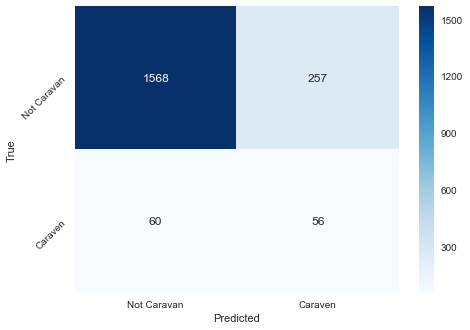

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


[0 0 1 ... 1 0 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=1e-07,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
            verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


F-scoredropM: 22.89%
Model accuracySS: 80.21% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


0.6565997428917121
0.7710829003306566


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


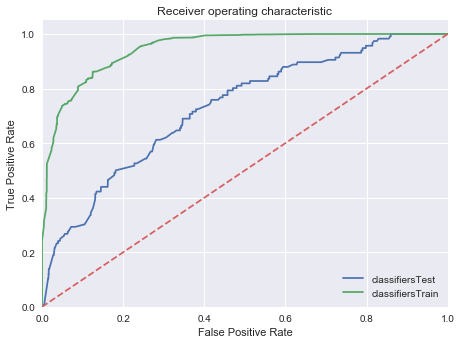


----------------Useful Scores: loss and cost-benefit scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Log LossdropMSS: 0.40


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Brier score loss: 0.20
BenefitItemdropMSS: 57
BenefitCodropMSS: 49.14%
CostItemdropMSS: 382
CostCodropMSS: 19.69%
ImproveRatio: 249.55%
balancetradeoffradio: 6.70
balancetradeoffradio: 6.70
ProfitratiodropM: 0.15

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1914
MaxBudgetPerTargetAudienceBdropMSS: 104.49

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every t

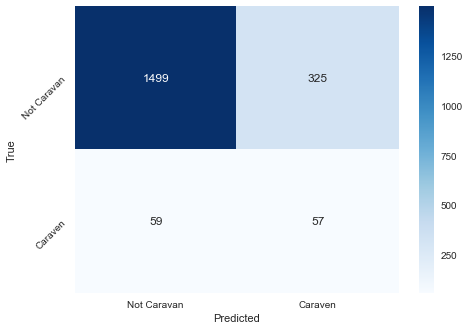

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 1 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
           criterion='gini', max_depth=15, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


F-scoredropM: 20.94%
Model accuracySS: 80.16% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


0.6321563533301843
0.7802403350941685


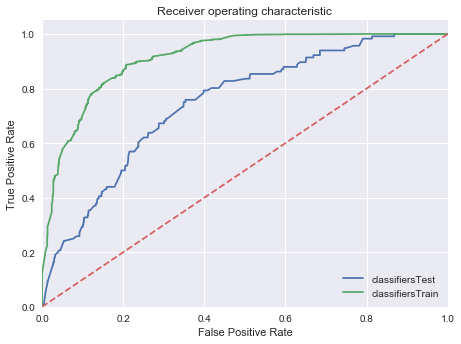


----------------Useful Scores: loss and cost-benefit scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Log LossdropMSS: 0.48
Brier score loss: 0.20
BenefitItemdropMSS: 51
BenefitCodropMSS: 43.97%
CostItemdropMSS: 371
CostCodropMSS: 19.11%
ImproveRatio: 230.02%
balancetradeoffradio: 7.27
balancetradeoffradio: 7.27
ProfitratiodropM: 0.14

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2077
MaxBudgetPerTargetAudienceBdropMSS: 96.29

In order to reach the profit goal, then the mininum target ordience number and the maxim

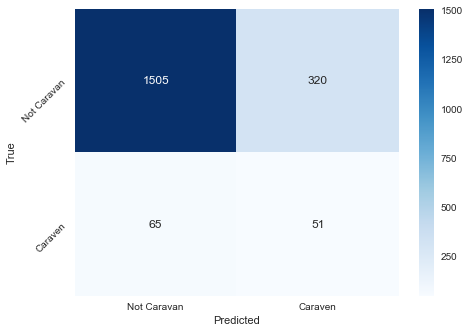

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


[0 1 1 ... 1 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
           criterion='gini', max_depth=15, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


F-scoredropM: 26.15%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Model accuracySS: 79.34% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


0.7085002361832782
0.7712221581727634


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished


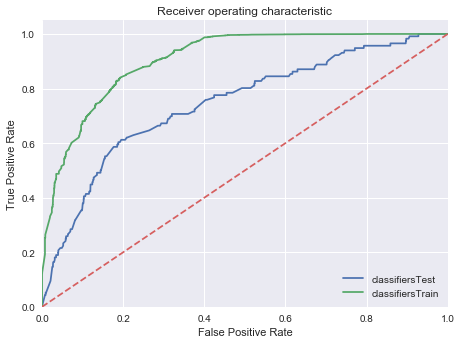


----------------Useful Scores: loss and cost-benefit scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


Log LossdropMSS: 0.49
Brier score loss: 0.21
BenefitItemdropMSS: 71
BenefitCodropMSS: 61.21%
CostItemdropMSS: 427
CostCodropMSS: 22.00%
ImproveRatio: 278.23%
balancetradeoffradio: 6.01
balancetradeoffradio: 6.01
ProfitratiodropM: 0.17

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1717
MaxBudgetPerTargetAudienceBdropMSS: 116.48

In order to reach the profit goal, then the mininum target ordience number and the maxi

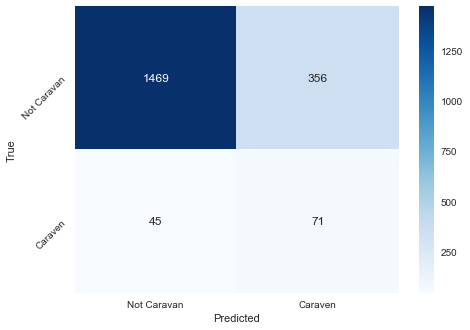

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 1 0 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=True, class_weight='balanced_subsample',
           criterion='gini', max_depth=15, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
           verbose=1, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


F-scoredropM: 24.22%


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


Model accuracySS: 80.00% 
ROC just use this to check overfitting: 



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished


0.6756843617664852
0.7726535191308456


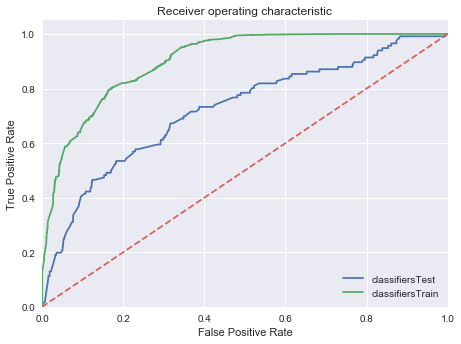


----------------Useful Scores: loss and cost-benefit scores



[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Log LossdropMSS: 0.49


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


Brier score loss: 0.20
BenefitItemdropMSS: 62
BenefitCodropMSS: 53.45%
CostItemdropMSS: 396
CostCodropMSS: 20.41%
ImproveRatio: 261.84%
balancetradeoffradio: 6.39
balancetradeoffradio: 6.39
ProfitratiodropM: 0.16

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 1825
MaxBudgetPerTargetAudienceBdropMSS: 109.59

In order to reach the profit goal, then the mininum target ordience number and the maximum budget for every t

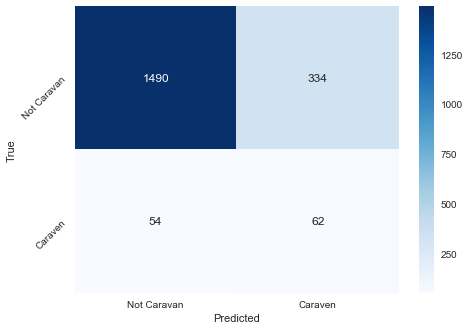

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


[0 1 1 ... 1 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.92%
Model accuracySS: 67.28% 
ROC just use this to check overfitting: 

0.6766816249409541
0.7057501582861625


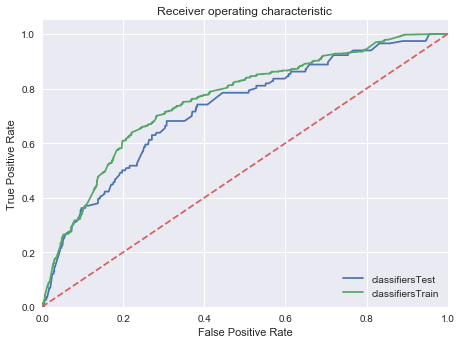


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.61
Brier score loss: 0.33
BenefitItemdropMSS: 79
BenefitCodropMSS: 68.10%
CostItemdropMSS: 677
CostCodropMSS: 34.88%
ImproveRatio: 195.26%
balancetradeoffradio: 8.57
balancetradeoffradio: 8.57
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2448
MaxBudgetPerTargetAudienceBdropMSS: 81.70

In order to reach the prof

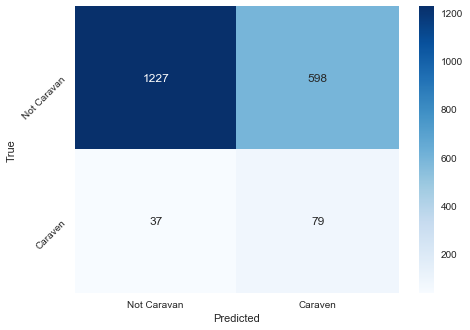

[0 1 1 ... 1 0 1]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 18.66%
Model accuracySS: 61.82% 
ROC just use this to check overfitting: 

0.6718587623996222
0.6810858666994264


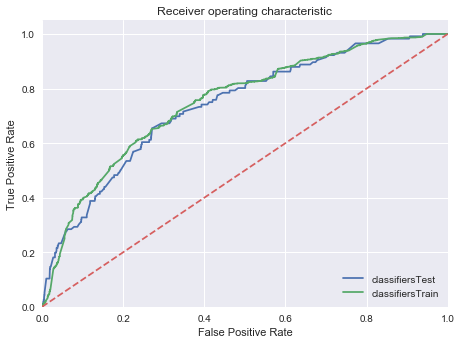


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.61
Brier score loss: 0.38
BenefitItemdropMSS: 85
BenefitCodropMSS: 73.28%
CostItemdropMSS: 795
CostCodropMSS: 40.96%
ImproveRatio: 178.90%
balancetradeoffradio: 9.35
balancetradeoffradio: 9.35
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2671
MaxBudgetPerTargetAudienceBdropMSS: 74.88

In order to reach the prof

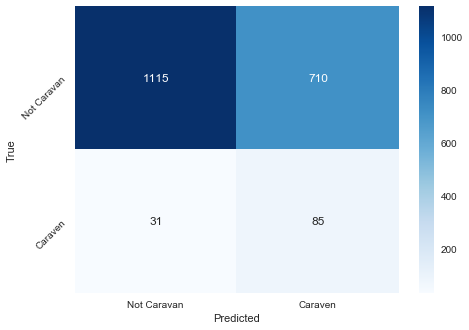

[0 1 1 ... 0 1 1]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
LinearDiscriminantAnalysis
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.55%
Model accuracySS: 66.91% 
ROC just use this to check overfitting: 

0.6706367211131277
0.6996941426547


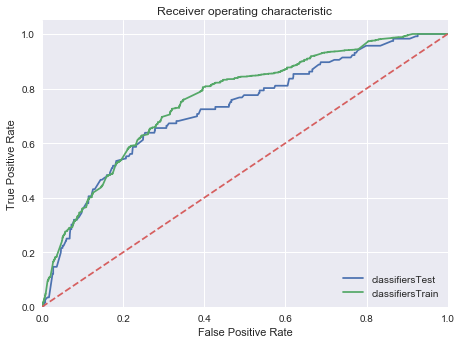


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.60
Brier score loss: 0.33
BenefitItemdropMSS: 78
BenefitCodropMSS: 67.24%
CostItemdropMSS: 682
CostCodropMSS: 35.15%
ImproveRatio: 191.27%
balancetradeoffradio: 8.74
balancetradeoffradio: 8.74
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2497
MaxBudgetPerTargetAudienceBdropMSS: 80.10

In order to reach the prof

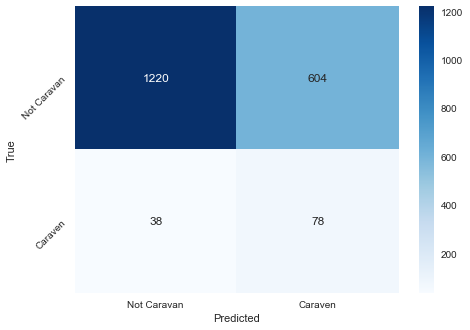

[0 1 1 ... 0 0 1]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
BernoulliNB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.33%
Model accuracySS: 71.87% 
ROC just use this to check overfitting: 

0.6808833254605575
0.7012384120354184


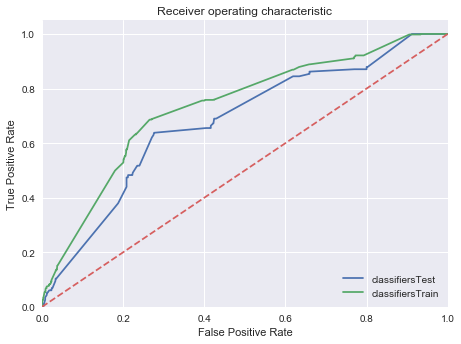


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.64
Brier score loss: 0.28
BenefitItemdropMSS: 74
BenefitCodropMSS: 63.79%
CostItemdropMSS: 578
CostCodropMSS: 29.78%
ImproveRatio: 214.23%
balancetradeoffradio: 7.81
balancetradeoffradio: 7.81
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2231
MaxBudgetPerTargetAudienceBdropMSS: 89.65

In order to reach the prof

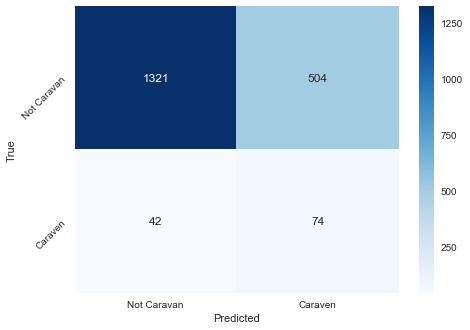

[0 1 1 ... 1 0 0]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
BernoulliNB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.07%
Model accuracySS: 70.27% 
ROC just use this to check overfitting: 

0.6844992914501654
0.6967166252445167


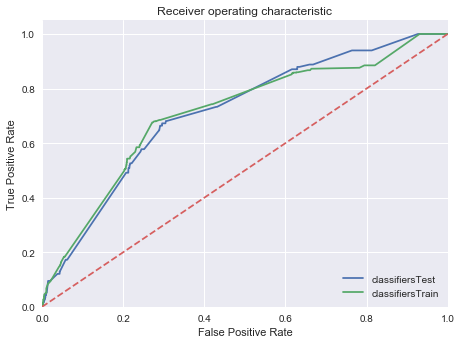


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.63
Brier score loss: 0.30
BenefitItemdropMSS: 77
BenefitCodropMSS: 66.38%
CostItemdropMSS: 615
CostCodropMSS: 31.68%
ImproveRatio: 209.50%
balancetradeoffradio: 7.99
balancetradeoffradio: 7.99
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2282
MaxBudgetPerTargetAudienceBdropMSS: 87.64

In order to reach the prof

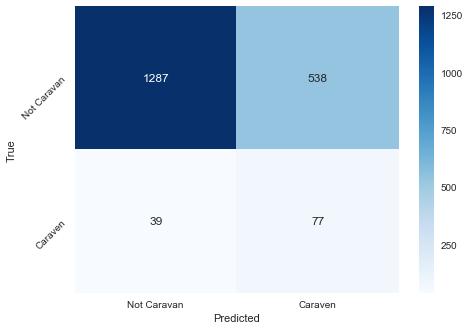

[0 1 1 ... 1 0 0]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
BernoulliNB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 21.60%
Model accuracySS: 73.81% 
ROC just use this to check overfitting: 

0.6750794010889293
0.6986726499763818


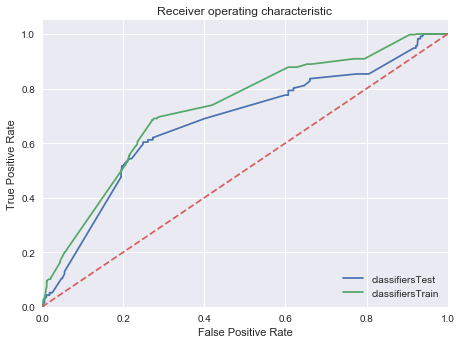


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.62
Brier score loss: 0.26
BenefitItemdropMSS: 70
BenefitCodropMSS: 60.34%
CostItemdropMSS: 532
CostCodropMSS: 27.42%
ImproveRatio: 220.05%
balancetradeoffradio: 7.60
balancetradeoffradio: 7.60
ProfitratiodropM: 0.13

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2171
MaxBudgetPerTargetAudienceBdropMSS: 92.12

In order to reach the prof

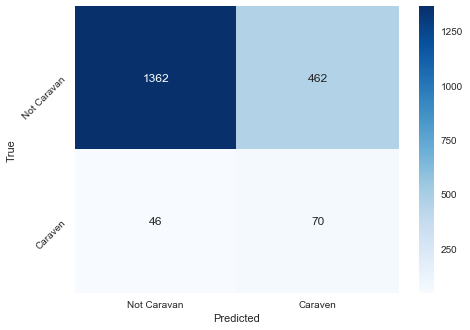

[0 1 1 ... 1 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
[LibLinear]==============================================================================================================
LogisticRegression
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=2, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.73%
Model accuracySS: 66.87% 
ROC just use this to check overfitting: 

0.6744898441190363
0.7053018776991334


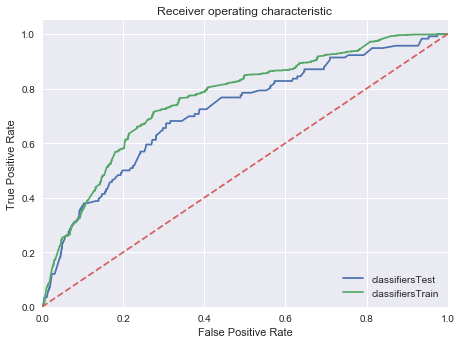


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.60
Brier score loss: 0.33
BenefitItemdropMSS: 79
BenefitCodropMSS: 68.10%
CostItemdropMSS: 685
CostCodropMSS: 35.29%
ImproveRatio: 192.98%
balancetradeoffradio: 8.67
balancetradeoffradio: 8.67
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2477
MaxBudgetPerTargetAudienceBdropMSS: 80.74

In order to reach the prof

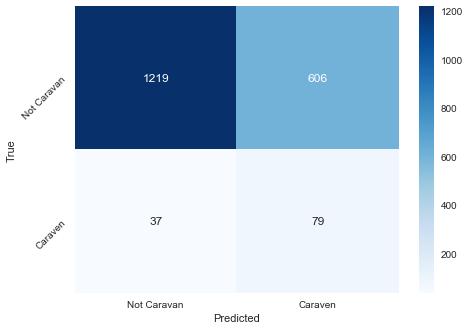

[0 1 1 ... 1 0 1]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
[LibLinear]==============================================================================================================
LogisticRegression
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=2, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.41%
Model accuracySS: 64.91% 
ROC just use this to check overfitting: 

0.6761880018894663
0.6940777350431389


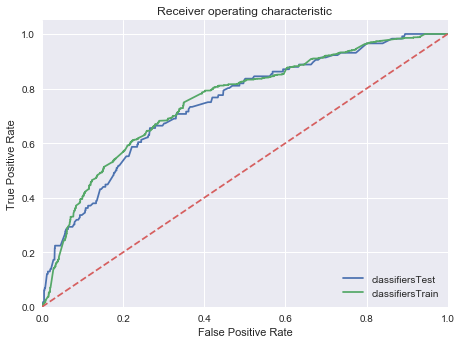


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.61
Brier score loss: 0.35
BenefitItemdropMSS: 82
BenefitCodropMSS: 70.69%
CostItemdropMSS: 729
CostCodropMSS: 37.56%
ImproveRatio: 188.21%
balancetradeoffradio: 8.89
balancetradeoffradio: 8.89
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2540
MaxBudgetPerTargetAudienceBdropMSS: 78.74

In order to reach the prof

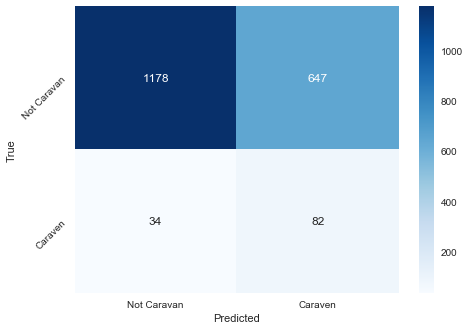

[0 1 1 ... 0 0 1]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
[LibLinear]==============================================================================================================
LogisticRegression
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=2, warm_start=False)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 19.54%
Model accuracySS: 67.32% 
ROC just use this to check overfitting: 

0.6687934815486993
0.6990824279641003


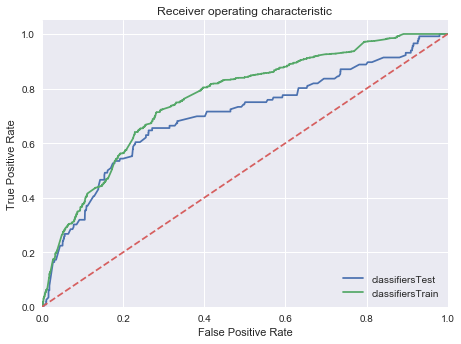


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.59
Brier score loss: 0.33
BenefitItemdropMSS: 77
BenefitCodropMSS: 66.38%
CostItemdropMSS: 672
CostCodropMSS: 34.64%
ImproveRatio: 191.63%
balancetradeoffradio: 8.73
balancetradeoffradio: 8.73
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2494
MaxBudgetPerTargetAudienceBdropMSS: 80.19

In order to reach the prof

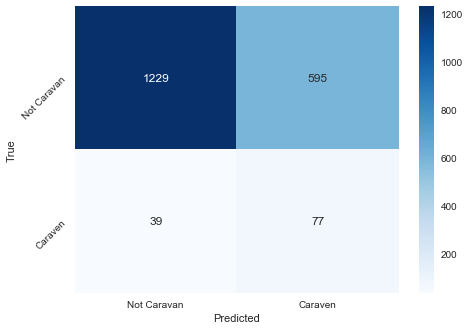

[0 1 1 ... 0 0 0]
StratifiedKFold(n_splits=3, random_state=43, shuffle=True)
('TRAIN:', array([   1,    2,    3, ..., 5817, 5819, 5820]), 'TEST:', array([   0,    5,   10, ..., 5816, 5818, 5821]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
[LibSVM]==============================================================================================================
SVC
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 18.81%
Model accuracySS: 74.65% 
ROC just use this to check overfitting: 

0.6270595181861124
0.7842665916973001


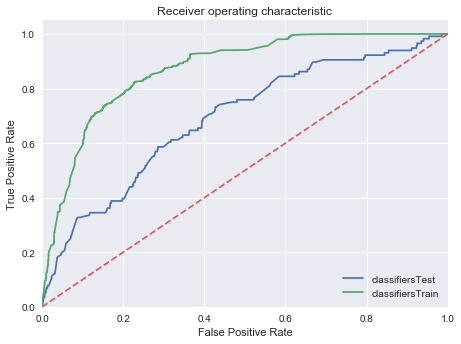


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.54
Brier score loss: 0.25
BenefitItemdropMSS: 57
BenefitCodropMSS: 49.14%
CostItemdropMSS: 490
CostCodropMSS: 25.24%
ImproveRatio: 194.65%
balancetradeoffradio: 8.60
balancetradeoffradio: 8.60
ProfitratiodropM: 0.12

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2457
MaxBudgetPerTargetAudienceBdropMSS: 81.40

In order to reach the prof

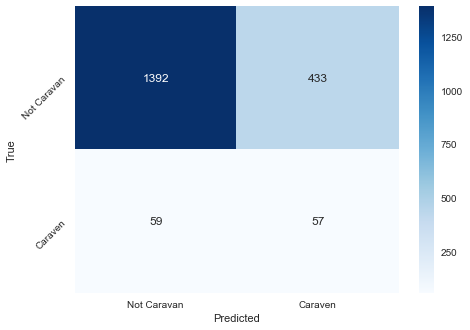

[1 0 1 ... 1 0 1]
('TRAIN:', array([   0,    1,    4, ..., 5819, 5820, 5821]), 'TEST:', array([   2,    3,    7, ..., 5792, 5802, 5813]))
('Training Set Shape after oversampling:   ', (7298L, 22L), (7298L,))
col_0     0     1
row_0            
0      3649     0
1         0  3649
[LibSVM]==============================================================================================================
SVC
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 22.69%
Model accuracySS: 73.67% 
ROC just use this to check overfitting: 

0.6945087387812943
0.7860986949660276


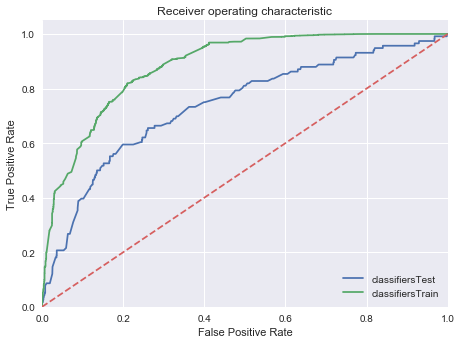


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.51
Brier score loss: 0.26
BenefitItemdropMSS: 75
BenefitCodropMSS: 64.66%
CostItemdropMSS: 545
CostCodropMSS: 28.08%
ImproveRatio: 230.27%
balancetradeoffradio: 7.27
balancetradeoffradio: 7.27
ProfitratiodropM: 0.14

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2077
MaxBudgetPerTargetAudienceBdropMSS: 96.29

In order to reach the prof

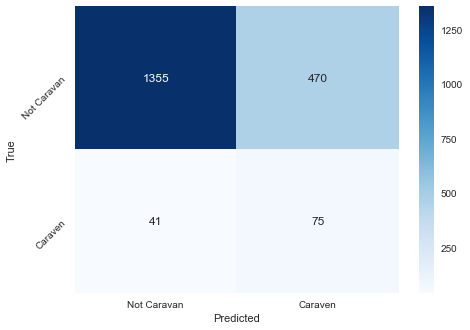

[1 0 1 ... 1 0 1]
('TRAIN:', array([   0,    2,    3, ..., 5816, 5818, 5821]), 'TEST:', array([   1,    4,    6, ..., 5817, 5819, 5820]))
('Training Set Shape after oversampling:   ', (7300L, 22L), (7300L,))
col_0     0     1
row_0            
0      3650     0
1         0  3650
[LibSVM]==============================================================================================================
SVC
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=True)


****************ResultsdropM****************

----------------Unhelpful Scores

F-scoredropM: 17.54%
Model accuracySS: 70.93% 
ROC just use this to check overfitting: 

0.6193663036902601
0.7653188474256023


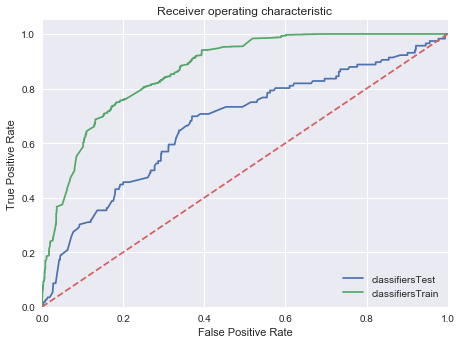


----------------Useful Scores: loss and cost-benefit scores

Log LossdropMSS: 0.53
Brier score loss: 0.29
BenefitItemdropMSS: 60
BenefitCodropMSS: 51.72%
CostItemdropMSS: 568
CostCodropMSS: 29.28%
ImproveRatio: 176.66%
balancetradeoffradio: 9.47
balancetradeoffradio: 9.47
ProfitratiodropM: 0.11

----------------Scenario analysis shreshold: marketing and controlling strategies

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit, then the insurance company should be:


MinTargetAudienceBdropMSS: 2705
MaxBudgetPerTargetAudienceBdropMSS: 73.94

In order to reach the prof

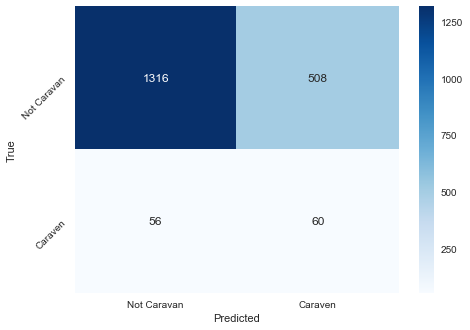

[0 0 1 ... 0 1 0]


In [103]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from __future__ import division
from sklearn.model_selection import StratifiedKFold
#Confusion matrix and confusion tables:¶
#The columns represent the actual class and the rows represent the predicted class. Lets evaluate performance:
def draw_confusion_matricesdropMSS(confusion_matriciesdropMSS,class_namesdropMSS):
    class_namesdropMSS = class_namesdropMSS.tolist()
    for cm in confusion_matricesdropMSS:
        classifier, cm = cm[0], cm[1]
        print'Confusion matrixdropM:\n', cm              
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.heatmap(cm, annot=True, ax = ax,cmap='Blues', fmt='g'); #annot=True to annotate cells 
        plt.ylabel('True')
        plt.xlabel('Predicted')    
        ax.xaxis.set_ticklabels(['Not Caravan', 'Caraven'],horizontalalignment="center"); ax.yaxis.set_ticklabels(['Not Caravan', 'Caraven'],rotation=45);
        plt.show()   


# Logging for Visual Comparison
log_colsUdropMSS = ["Classifier", "F-score","Accuracy"]
logUdropMSS = pd.DataFrame(columns=log_colsUdropMSS)

log_colsdropMSS=["Classifier", "Log Loss","OverfittingRoc","BLossS","BI","BO", "CI", "CO", "IR","BTOR","PR"] 
logdropMSS = pd.DataFrame(columns=log_colsdropMSS)

log_colsCBAdropMSS =["Classifier", "MTAB","MBPTAB","MTAP","MBPTAP"]
logCBAdropMSS = pd.DataFrame(columns=log_colsCBAdropMSS)


for clf in classifiers:
    skf = StratifiedKFold(n_splits=3,random_state=43,shuffle=True)
    print skf
    skf.get_n_splits(X, y)
    for train_index, test_index in skf.split(X,y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_Train, X_Test = X.iloc[train_index], X.iloc[test_index]
        y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
        class_namesdropMSS = np.unique(np.array(y_Test))
        
        X_Train=X_Train.drop(["C1MOSTYPE", "C2MAANTHUI", "C3MGEMOMV","C4MGEMLEEF", "C5MOSHOOFD", 
                                       "C6MGODRK","C7MGODPR", "C8MGODOV", "C9MGODGE","C10MRELGE", "C11MRELSA",
                                       "C12MRELOV","C13MFALLEEN", "C14MFGEKIND", "C15MFWEKIND","C16MOPLHOOG", "C17MOPLMIDD",
                                       "C18MOPLLAAG","C19MBERHOOG", "C20MBERZELF", "C21MBERBOER","C22MBERMIDD", 
                                       "C23MBERARBG", "C24MBERARBO","C25MSKA", "C26MSKB1", "C27MSKB2","C28MSKC", 
                                       "C29MSKD", "C30MHHUUR","C31MHKOOP", "C32MAUT1", "C33MAUT2","C34MAUT0", "C35MZFONDS",
                                       "C36MZPART","C37MINKMthirty", "C38MINK3045", "C39MINK4575","C40MINK7512", "C41MINK123M",
                                       "C42MINKGEM", "C65AWAPART", 
                                       "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND"], axis=1)
        
        X_Test =X_Test.drop(["C1MOSTYPE", "C2MAANTHUI", "C3MGEMOMV","C4MGEMLEEF", "C5MOSHOOFD", 
                                       "C6MGODRK","C7MGODPR", "C8MGODOV", "C9MGODGE","C10MRELGE", "C11MRELSA",
                                       "C12MRELOV","C13MFALLEEN", "C14MFGEKIND", "C15MFWEKIND","C16MOPLHOOG", "C17MOPLMIDD",
                                       "C18MOPLLAAG","C19MBERHOOG", "C20MBERZELF", "C21MBERBOER","C22MBERMIDD", 
                                       "C23MBERARBG", "C24MBERARBO","C25MSKA", "C26MSKB1", "C27MSKB2","C28MSKC", 
                                       "C29MSKD", "C30MHHUUR","C31MHKOOP", "C32MAUT1", "C33MAUT2","C34MAUT0", "C35MZFONDS",
                                       "C36MZPART","C37MINKMthirty", "C38MINK3045", "C39MINK4575","C40MINK7512", "C41MINK123M",
                                       "C42MINKGEM", "C65AWAPART", 
                                       "C66AWABEDR","C67AWALAND","C68APERSAUT", "C69ABESAUT", "C70AMOTSCO","C71AVRAAUT", 
                                       "C72AAANHANG", "C73ATRACTOR","C74AWERKT", "C75ABROM", "C76ALEVEN","C77APERSONG",
                                       "C78AGEZONG", "C79AWAOREG","C80ABRAND","C81AZEILPL", "C82APLEZIER", "C83AFIETS",
                                       "C84AINBOED", "C85ABYSTAND"], axis=1)

            # Apply regular SMOTE
        sm = SMOTE(kind='regular')
        X_trainSS, y_trainSS = sm.fit_sample(X_Train, y_Train)
        print('Training Set Shape after oversampling:   ', X_trainSS.shape, y_trainSS.shape)
        print(pd.crosstab(y_trainSS,y_trainSS))

        #print("TRAIN:", X_Train)
    #cv = cross_validation.StratifiedKFold(y_TraindropM, n_folds=3, random_state=42)
    #test_predictionsdropM = cross_validation.cross_val_predict(clf, X=X_TraindropM, y=y_TraindropM, n_jobs=-1, cv=cv)
        clf.fit(X_trainSS, y_trainSS)
        namedropMSS = clf.__class__.__name__
    
        print("="*110)
        print(namedropMSS)
        print(str(clf));print('\n')
    
        print('****************ResultsdropM****************')
        print('\n----------------Unhelpful Scores\n')

        test_predictionsSS = clf.predict(X_Test)
        
        accdropMSS = f1_score(y_Test, clf.predict(X_Test))
        print("F-scoredropM: {:.2%}".format(accdropMSS))
        
        test_predictionsSS = clf.predict(X_Test)
        acc2dropMSS = accuracy_score(y_Test, test_predictionsSS)

        print('Model accuracySS: {:.2%} '.format(acc2dropMSS))
     
    
        print('ROC just use this to check overfitting: \n')
#If both curves are not too far from each other indicates (Train above test) that there is little overfitting, if the roc of the train is much better that the test and both curves are far from each other, then it´s overfiting. Otherwise underfitting.
        RocScoreSS=roc_auc_score(y_Test, test_predictionsSS)
        fprBSS, tprBSS, thresholdsBSS = roc_curve(y_Test, clf.predict_proba(X_Test)[:,1])
        RocScoreTrainSS=roc_auc_score(y_Train, clf.predict(X_Train))
        fprBTrainSS, tprBTrainSS, thresholdsBTrainSS = roc_curve(y_trainSS, clf.predict_proba(X_trainSS)[:,1])
        
        OverfittingRoc=float(format(RocScoreTrainSS-RocScoreSS,'.2f'))
        
        print RocScoreSS
        print RocScoreTrainSS
        plt.figure()
        plt.plot(fprBSS, tprBSS, label='classifiersTest' % RocScoreSS)
        plt.plot(fprBTrainSS, tprBTrainSS, label='classifiersTrain' % RocScoreTrainSS)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()
    
        print('\n----------------Useful Scores: loss and cost-benefit scores\n')
        test_predictionsSS = clf.predict_proba(X_Test)
        lldropMSS = log_loss(y_Test, test_predictionsSS)
        print("Log LossdropMSS: {:.2f}".format(lldropMSS))
        
        test_predictionsSS = clf.predict(X_Test)
    
    # This function returns a score of the mean square difference between the actual outcome and the predicted probability of the possible outcome. The actual outcome has to be 1 or 0 (true or false), while the predicted probability of the actual outcome can be a value between 0 and 1.The brier score loss is also between 0 to 1 and the lower the score (the mean square difference is smaller), the more accurate the prediction is. It can be thought of as a measure of the “calibration” of a set of probabilistic predictions.
        BLossS= brier_score_loss(y_Test, test_predictionsSS)
        print("Brier score loss: {:.2f}".format(BLossS))
    
#    test_predictionsdropM = clf.predict(X_TestdropM)
        confusiondropMSS = metrics.confusion_matrix(y_Test, test_predictionsSS)
        TPdropMSS = confusiondropMSS[0, 0]
        TNdropMSS = confusiondropMSS[1, 1]
        FPdropMSS = confusiondropMSS[1, 0]
        FNdropMSS = confusiondropMSS[0, 1]
        BenefitItemdropMSS = TNdropMSS
        BenefitCodropMSS = TNdropMSS / (TNdropMSS + FPdropMSS) # this is specificity in statistics 
        print("BenefitItemdropMSS: {}".format(BenefitItemdropMSS))
        print("BenefitCodropMSS: {:.2%}".format(BenefitCodropMSS))
    
        CostItemdropMSS = (TNdropMSS + FNdropMSS)
        CostCodropMSS = (TNdropMSS + FNdropMSS) / (TPdropMSS + TNdropMSS + FPdropMSS +FNdropMSS) 
          
        print("CostItemdropMSS: {}".format(CostItemdropMSS))
        print("CostCodropMSS: {:.2%}".format(CostCodropMSS))
        
        ImproveRatiodropMSS = (BenefitItemdropMSS/CostItemdropMSS) /((TNdropMSS+FPdropMSS) /(TPdropMSS + TNdropMSS + FPdropMSS+FNdropMSS))    
        print("ImproveRatio: {:.2%}".format(ImproveRatiodropMSS))
    
        #scenario BenefitItem*price-CostItem*
        balancetradeoffradiodropMSS = float(format(CostItemdropMSS/BenefitItemdropMSS , '.2f'))
        print(CBLUE+"balancetradeoffradio: {0:.2f}".format(balancetradeoffradiodropMSS)+CEND)
        ProfitratiodropMSS = float(format(BenefitItemdropMSS/CostItemdropMSS, '.2f'))
        print(CBLUE+"balancetradeoffradio: {0:.2f}".format(balancetradeoffradiodropMSS)+CEND)
        print(CBLUE+"ProfitratiodropM: {0:.2f}".format(ProfitratiodropMSS)+CEND)
    
        print('\n----------------Scenario analysis shreshold: marketing and controlling strategies\n')
        #   #Scenario: give a budget and the revenue, then I can predict, how much you can spend on each costItem or how many costItem can be spent 
        Budget = 200000
        #One scenario considers benefitgoal, one scenario considers the balance, no deficit
        ProfitGoal= 20000
        # Proft maybe 700 every year, the profit of every Customer is the Reveneue from each customer minus the cost of the customer management 
        ProfitPerBenefitItem = 700

        print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit, then the insurance company should be:\n\n')
        # within this budget, the smallest amount of  target audience should be reached, in order to keep the balance of the account 
        # Min CostItem
        MinTargetAudienceBdropMSS= int((Budget/ProfitPerBenefitItem)*balancetradeoffradiodropMSS)
    
        #For every Target Audience, how much the company can spend for max. so that the company can keep the balance and avoid deficit
        MaxBudgetPerTargetAudienceBdropMSS = float(format(Budget/MinTargetAudienceBdropMSS, '.2f'))
    
        #To reach the benifit goal, at least MinTargetAudienceP should be reached 
        MinTargetAudiencePdropMSS = int(((Budget + ProfitGoal)/ProfitPerBenefitItem)*balancetradeoffradiodropMSS)
    
        #To reach the benifit goal, at most MaxBudgetPerTargetAudienceP can be spent 
        MaxBudgetPerTargetAudiencePdropMSS = float(format(Budget/MinTargetAudiencePdropMSS, '.2f'))
    
    
        print("MinTargetAudienceBdropMSS: {}".format(MinTargetAudienceBdropMSS))
        print("MaxBudgetPerTargetAudienceBdropMSS: {0:.2f}".format(MaxBudgetPerTargetAudienceBdropMSS)) 
        print('\nIn order to reach the profit goal, then the mininum target ordience number and the maximum budget for every target audience are:')
        print("MinTargetAudiencePdropMSS: {}".format(MinTargetAudiencePdropMSS))
        print("MaxBudgetPerTargetAudiencePdropMSS: {0:.2f}".format(MaxBudgetPerTargetAudiencePdropMSS)+"\n")

        log_entryUdropMSS = pd.DataFrame([[namedropMSS, accdropMSS,acc2dropMSS]], columns=log_colsUdropMSS)#FPR*100,
        logUdropMSS = logUdropMSS.append(log_entryUdropMSS,ignore_index=True)
    
        log_entrydropMSS = pd.DataFrame([[namedropMSS,lldropMSS,OverfittingRoc,BLossS,BenefitItemdropMSS,BenefitCodropMSS, CostItemdropMSS, CostCodropMSS,ImproveRatiodropMSS,balancetradeoffradiodropMSS,ProfitratiodropMSS]], columns=log_colsdropMSS)#FPR*100,
        logdropMSS = logdropMSS.append(log_entrydropMSS,ignore_index=True)
        
    
        log_entryCBAdropMSS = pd.DataFrame([[namedropMSS,MinTargetAudienceBdropMSS,MaxBudgetPerTargetAudienceBdropMSS,MinTargetAudiencePdropMSS,MaxBudgetPerTargetAudiencePdropMSS]], columns=log_colsCBAdropMSS)
        logCBAdropMSS = logCBAdropMSS.append(log_entryCBAdropMSS,ignore_index=True)
   
        reportdropMSS = classification_report(y_Test, test_predictionsSS)
        print(reportdropMSS)
        confusion_matricesdropMSS = [
        ( "", confusion_matrix(y_Test, test_predictionsSS))
        ]
        draw_confusion_matricesdropMSS(confusion_matricesdropMSS,class_namesdropMSS)
        predictions = clf.predict(OutputdropM2)
        print predictions
    #new_column = df['Classifiers'] 
#    pd.DataFrame(predictions).to_csv('C:\Users\chenp\Desktop\output.csv', index = False,header = False, sep=',', mode='a',encoding ='utf-8')
        with open('C:\Users\chenp\Desktop\output.KFold.4.3.2.csv', 'a') as csvfile:#, newline=''
                    fwriter = csv.writer(csvfile, delimiter=',',quotechar='/',quoting=csv.QUOTE_MINIMAL)#, 
                    fwriter.writerow(predictions)

# 5. Model Selection 
- Model Selection for "4.2 with Smote X_TraindropM2", y_TraindropM2 liminate KNeighborsClassifier,GradientBoostingClassifier,QuadraticDiscriminantAnalysis,GaussianNB  

## 5.1 Evaluate the models with the datasets: Smote X_TraindropM; y_TraindropM
- Model Selection for "4.1 with Smote X_TraindropM, y_TraindropM"
  Eliminate GaussianNB,QuadraticDiscriminantAnalysis,KNeighborsClassifier, because the Loss of these three models are higher than 2. 

### 5.1.1 Compare the unhelful scores

In [30]:
#def color_negative_red(lldropM2):
#    """
#    Takes a scalar and returns a string with
#    the css property `'color: red'` for negative
#    strings, black otherwise.
#    """
#    color = 'red' if lldropM2 > 0.7 else 'black'
#    return 'color: %s' % color

In [88]:
logUdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.1.2 Compare the Helpful Scores 

In [89]:
logdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.1.3 Compare the scenario KPIs

In [105]:
print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:\n\n')

logCBAdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:




## 5.2 Evaluate the models with the datasets: Smote X_TrainselecdropM; y_TrainselecdropM
- Model Selection for "4.2 with Smote X_TrainselecdropM", y_TrainselecdropM 
- RandomForestClassifeir, ExtraTreesClassifier, LogisticRegression and SVC performs good
- The overfitting problem is enlighted a lot in this model clusters 

### 5.2.1 Compare the unhelful scores

In [91]:
logselecUdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.2.2 Compare the helpful score 

In [92]:
logselecdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.2.3 Compare the scenario KPIs

In [106]:
print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:\n\n')

logCBAselecdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:




## 5.3 Evaluate the models with the datasets using Train_test_split: Smote X_TraindropM2; y_TraincdropM2

### 5.3.1 Compare the unhelpful scores

In [111]:
logUdropM2.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.3.2 Compare the helpful score 

In [112]:
logdropM2.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.3.3 Compare the scenario KPIs

In [113]:
print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:\n\n')

logCBAdropM.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:




## 5.4 Evaluate the models with the datasets using KFold: Smote X_TraindropM2; y_TraincdropM2

### 5.4.1 Compare the unhelpful scores

In [97]:
print ('Model Evaluation ')

logUdropMSS.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 ) 

Model Evaluation 


### 5.4.2 Compare the helpful scores
KFold is less perssimistic than holdout(Train_test_split), so the brier_score_loss is bigger than the Train_test_split. 

In [98]:
logdropMSS.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

### 5.4.3 Compare the scenario KPIs

In [109]:
print ("Business Application of the Model: \n\nLet´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. \nIn summary, the given KPIs of the insurance company are: " +CBEIGE+ "\n\nBudget = 200000 \nRevenuePerBenefitItem = 700 \nProfitGoal = 20000\n"+CEND+'\nThen to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:\n\n')

logCBAdropMSS.style.set_table_styles(
   [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
 )

Business Application of the Model: 

Let´s say that the insurance company has the budget of 200000 EUR per year for Caravan mobile home insurance marketing, the revenue from every caravan customer is 700 EUR every year, the profit goal of this year in the caravan mobile home ensurance is 20000 EUR. 
In summary, the given KPIs of the insurance company are: 

Budget = 200000 
RevenuePerBenefitItem = 700 
ProfitGoal = 20000

Then to keep the account balance not to be deficit (MTAB and MBPTAB) and to reach the proft goal (MTAP and MBPTAP), then the insurance company should be:




## 5.5 Visualise the Amount of the Benefit Items and the Cost Items 
### 5.5.1 Visualise the Amount of the Benefit Items and the Cost Items: Smote X_TraindropM; y_TraindropM

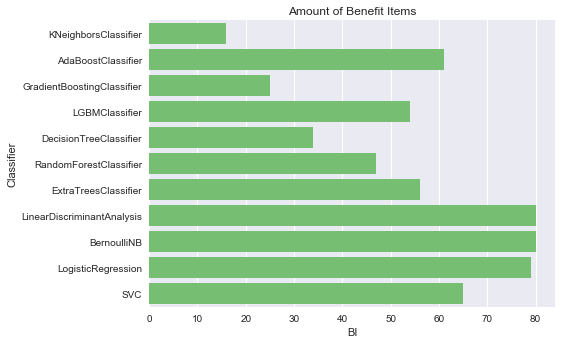

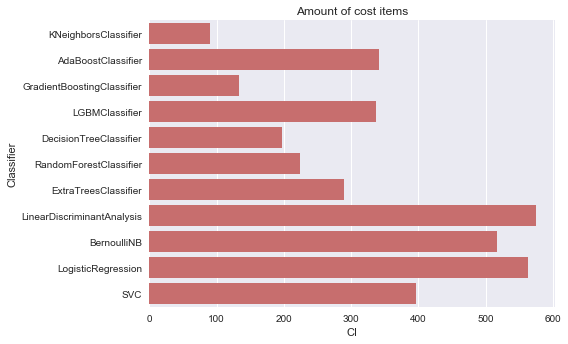

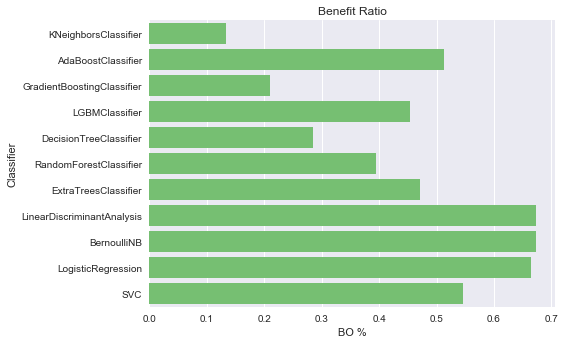

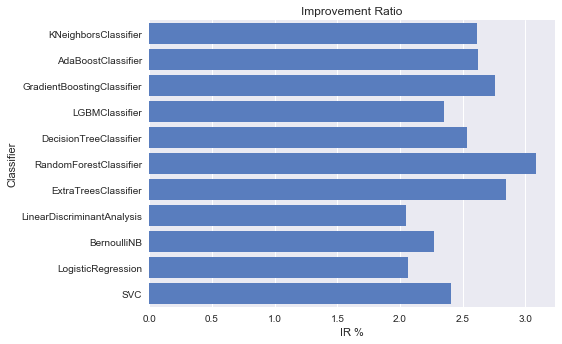

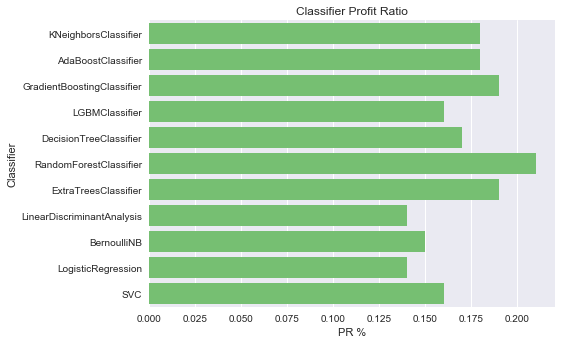

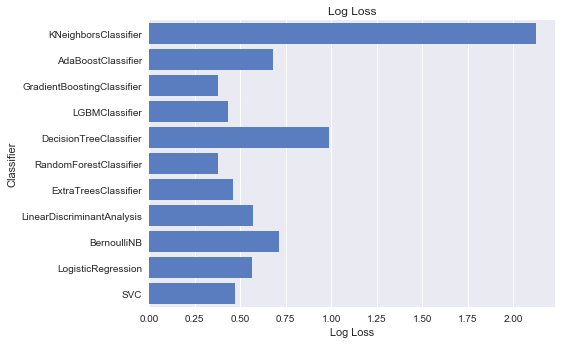

In [61]:
#log_colsselecdropM=["Classifier", "Log Loss","BI","BO", "CI", "CO", "IR","BTOR"] 

#log_colsCBAselecdropM =["Classifier", "MTAB","MBPTAB","MTAP","MBPTAP"]
sns.set(rc={'figure.figsize':(7.27,5.27)})

sns.set_color_codes("muted")
sns.barplot(x='BI', y='Classifier', data=logdropM, color="g")

plt.xlabel('BI')
plt.title('Amount of Benefit Items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='CI', y='Classifier', data=logdropM, color="r")

plt.xlabel('CI')
plt.title('Amount of cost items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='BO', y='Classifier', data=logdropM, color="g")

plt.xlabel('BO %')
plt.title('Benefit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='IR', y='Classifier', data=logdropM, color="b")

plt.xlabel('IR %')
plt.title('Improvement Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='PR', y='Classifier', data=logdropM, color="g")

plt.xlabel('PR %')
plt.title('Classifier Profit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=logdropM, color="b")

plt.xlabel('Log Loss')
plt.title('Log Loss')
plt.show()


### 5.5.2 Visualise the Amount of the Benefit Items and the Cost Items: Smote X_TrainselecdropM; y_TrainselecdropM

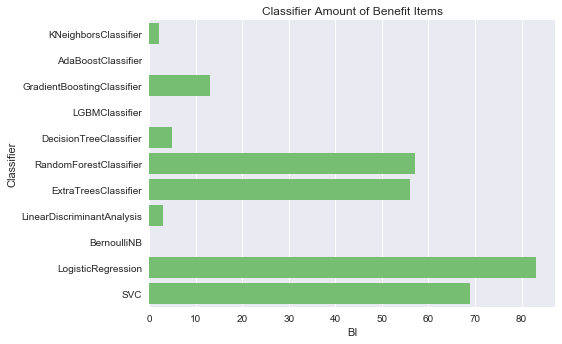

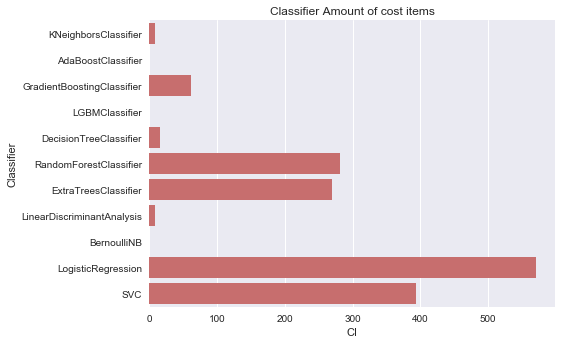

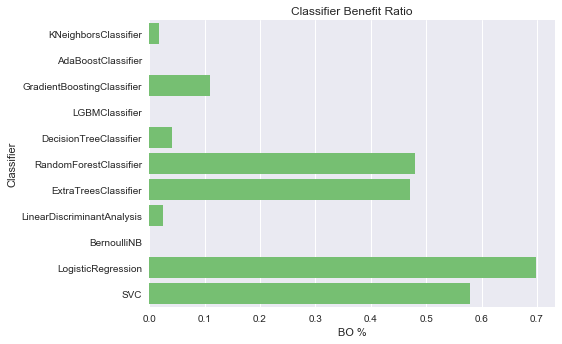

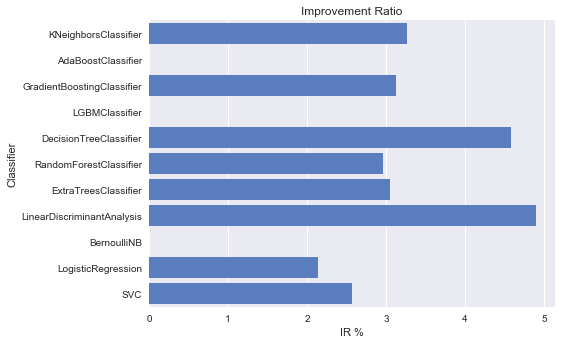

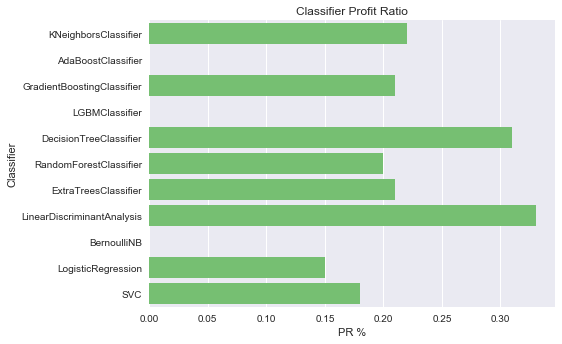

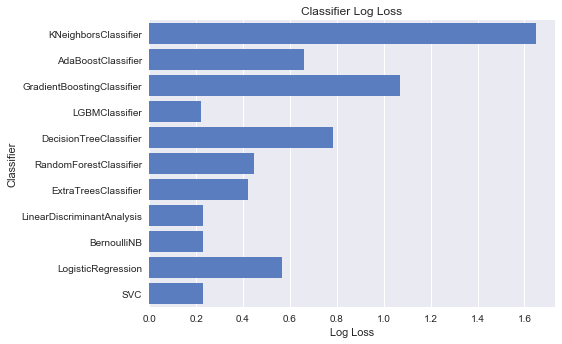

In [62]:
sns.set_color_codes("muted")
sns.barplot(x='BI', y='Classifier', data=logselecdropM, color="g")

plt.xlabel('BI')
plt.title('Classifier Amount of Benefit Items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='CI', y='Classifier', data=logselecdropM, color="r")

plt.xlabel('CI')
plt.title('Classifier Amount of cost items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='BO', y='Classifier', data=logselecdropM, color="g")

plt.xlabel('BO %')
plt.title('Classifier Benefit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='IR', y='Classifier', data=logselecdropM, color="b")

plt.xlabel('IR %')
plt.title('Improvement Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='PR', y='Classifier', data=logselecdropM, color="g")

plt.xlabel('PR %')
plt.title('Classifier Profit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=logselecdropM, color="b")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### 5.5.3 Visualise the Amount of the Benefit Items and the Cost Items: Smote X_TraindropM2; y_TrainselecdropM2

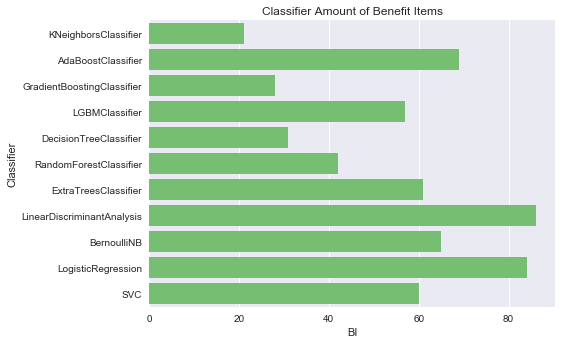

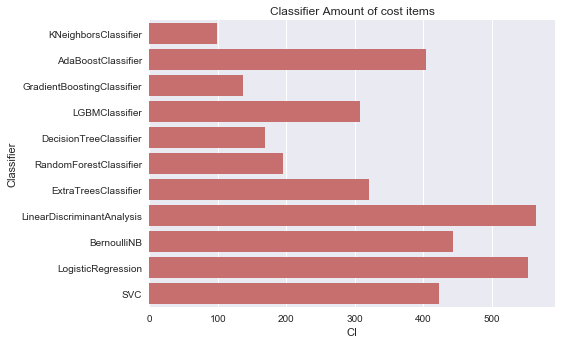

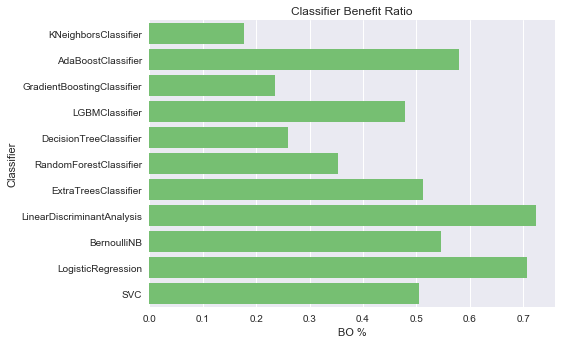

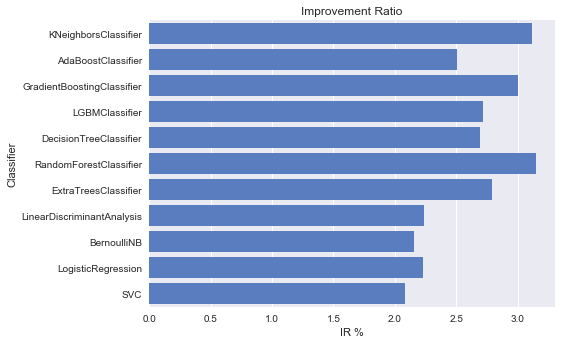

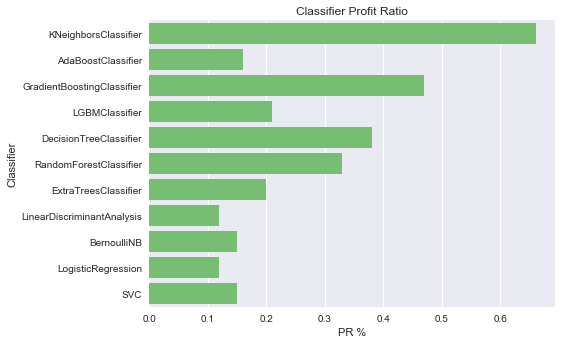

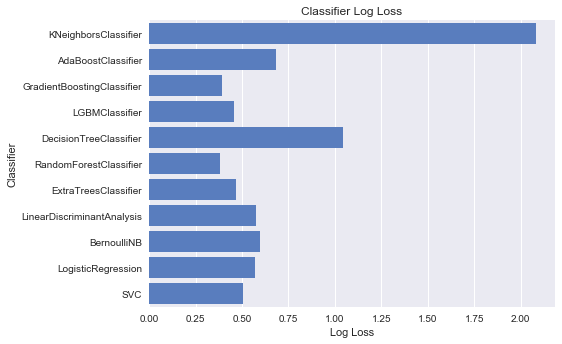

In [63]:
sns.set_color_codes("muted")
sns.barplot(x='BI', y='Classifier', data=logdropM2, color="g")

plt.xlabel('BI')
plt.title('Classifier Amount of Benefit Items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='CI', y='Classifier', data=logdropM2, color="r")

plt.xlabel('CI')
plt.title('Classifier Amount of cost items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='BO', y='Classifier', data=logdropM2, color="g")

plt.xlabel('BO %')
plt.title('Classifier Benefit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='IR', y='Classifier', data=logdropM2, color="b")

plt.xlabel('IR %')
plt.title('Improvement Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='PR', y='Classifier', data=logdropM2, color="g")

plt.xlabel('PR %')
plt.title('Classifier Profit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=logdropM2, color="b")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### 5.5.4 Visualise the Amount of the Benefit Items and the Cost Items: KFold with Smote X_TraindropM; y_TraindropM

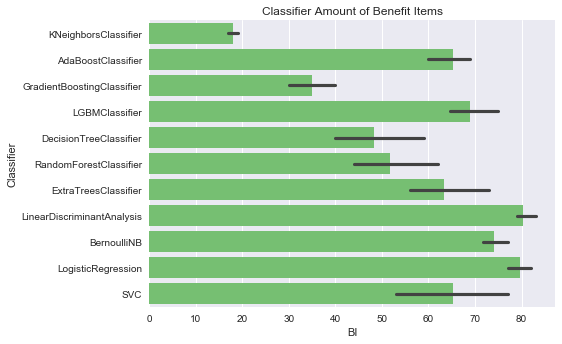

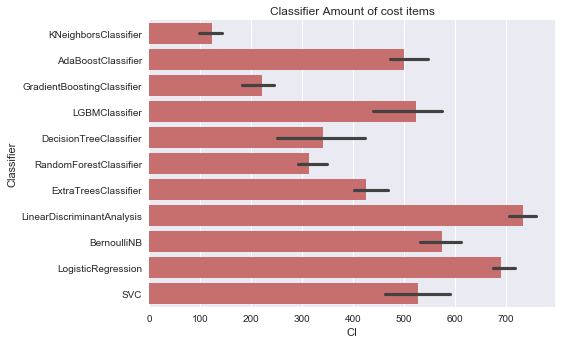

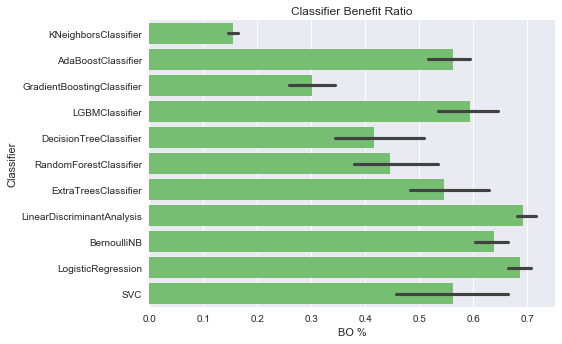

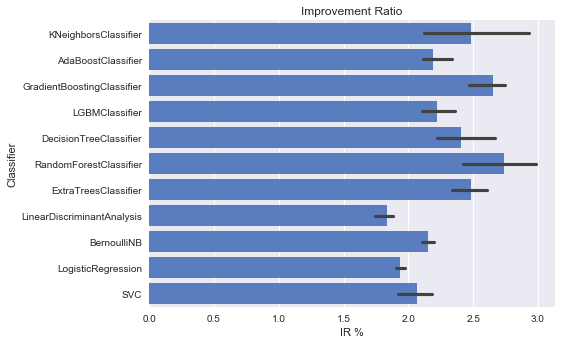

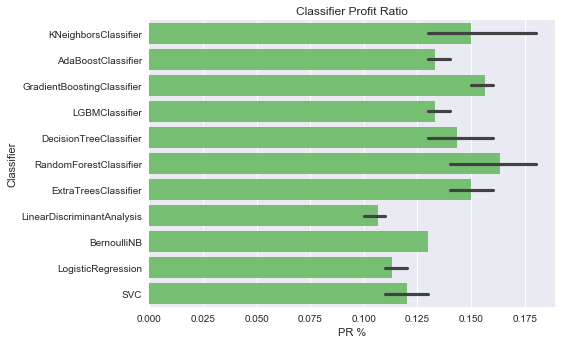

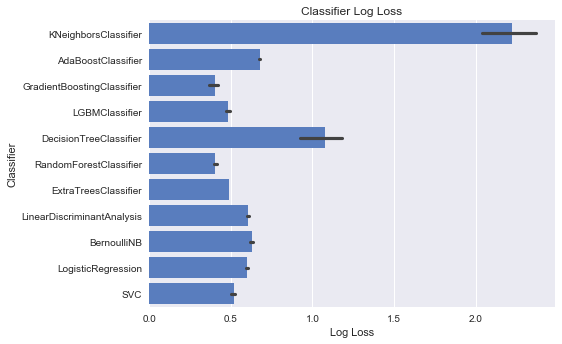

In [80]:
sns.set_color_codes("muted")
sns.barplot(x='BI', y='Classifier', data=logdropMSS, color="g")

plt.xlabel('BI')
plt.title('Classifier Amount of Benefit Items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='CI', y='Classifier', data=logdropMSS, color="r")

plt.xlabel('CI')
plt.title('Classifier Amount of cost items')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='BO', y='Classifier', data=logdropMSS, color="g")

plt.xlabel('BO %')
plt.title('Classifier Benefit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='IR', y='Classifier', data=logdropMSS, color="b")

plt.xlabel('IR %')
plt.title('Improvement Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='PR', y='Classifier', data=logdropMSS, color="g")

plt.xlabel('PR %')
plt.title('Classifier Profit Ratio')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=logdropMSS, color="b")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

# 6 Persona of the target group: Plotting the Dependency of prefering Caravan Policy 
- Contribution to Car policy with 6
- high purchase power
- high Contribution private third party insurance
- has contribution to boat policies 

## 6.1 Plotting the Dependency of prefering Caravan Policy based on Contribution of car policies

0    2845
6    2319
5     613
7      41
8       3
4       1
Name: C47PPERSAUT, dtype: int64
C86CARAVAN      0    1
C47PPERSAUT           
0            2773   72
4               1    0
5             599   14
6            2057  262
7              41    0
8               3    0


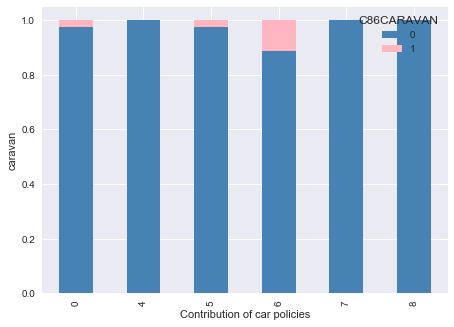

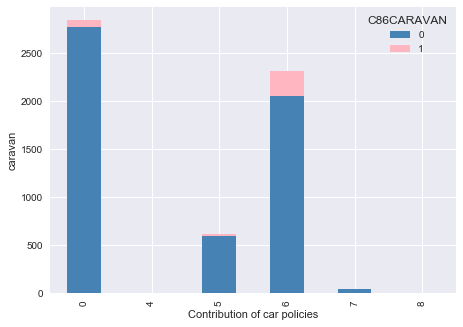

In [65]:
#Train['C68APERSAUT'].value_counts().plot(kind='bar', color='steelblue', grid=True)
#plt.xlabel('Number of car policies')
#plt.ylabel('count')

num_car_caravan = pd.crosstab(Train['C47PPERSAUT'], Train['C86CARAVAN'])
num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan_pct.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Contribution of car policies')
plt.ylabel('caravan')


num_car_caravan = pd.crosstab(Train['C47PPERSAUT'], Train['C86CARAVAN'])
#num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Contribution of car policies')
plt.ylabel('caravan')

#num_car_caravan = pd.crosstab(Train['C68APERSAUT'], Train['C86CARAVAN'])
##num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
#num_car_caravan.plot.pie(subplots=True)
#plt.xlabel('Number of car policies')
#plt.ylabel('caravan')
print Train['C47PPERSAUT'].value_counts()
print pd.crosstab(Train['C47PPERSAUT'], Train['C86CARAVAN'])

## 6.2 Plotting the Dependency of prefering Caravan Policy based on Purchasing power class

3    1524
4     902
6     901
1     587
5     583
7     474
8     426
2     425
Name: C43MKOOPKLA, dtype: int64
C86CARAVAN      0   1
C43MKOOPKLA          
1             569  18
2             410  15
3            1453  71
4             856  46
5             553  30
6             835  66
7             407  67
8             391  35


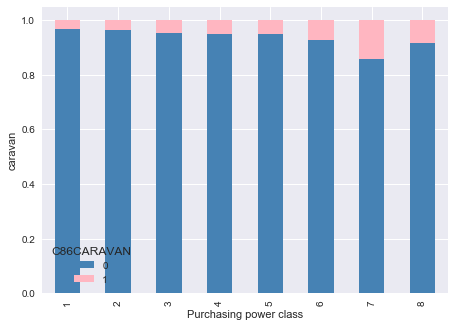

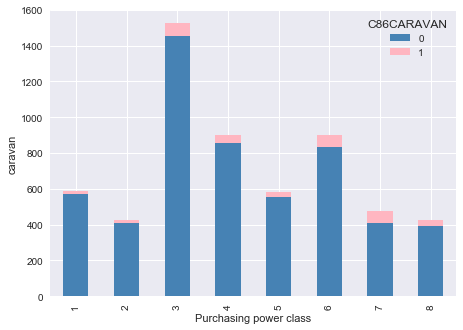

In [66]:
num_car_caravan = pd.crosstab(Train['C43MKOOPKLA'], Train['C86CARAVAN'])
num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan_pct.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Purchasing power class')
plt.ylabel('caravan')


num_car_caravan = pd.crosstab(Train['C43MKOOPKLA'], Train['C86CARAVAN'])
#num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Purchasing power class')
plt.ylabel('caravan')

#num_car_caravan = pd.crosstab(Train['C68APERSAUT'], Train['C86CARAVAN'])
##num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
#num_car_caravan.plot.pie(subplots=True)
#plt.xlabel('Number of car policies')
#plt.ylabel('caravan')
print Train['C43MKOOPKLA'].value_counts()
print pd.crosstab(Train['C43MKOOPKLA'], Train['C86CARAVAN'])

## 6.3 Plotting the Dependency of prefering Caravan Policy based on Contribution private third party insurance

0    3482
2    2128
1     201
3      11
Name: C44PWAPART, dtype: int64
C86CARAVAN     0    1
C44PWAPART           
0           3335  147
1            193    8
2           1937  191
3              9    2


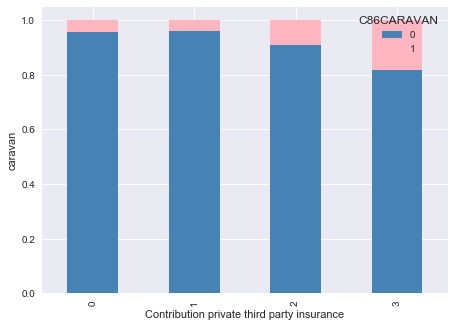

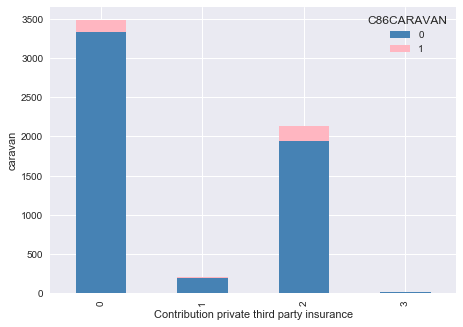

In [67]:
num_car_caravan = pd.crosstab(Train['C44PWAPART'], Train['C86CARAVAN'])
num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan_pct.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Contribution private third party insurance')
plt.ylabel('caravan')


num_car_caravan = pd.crosstab(Train['C44PWAPART'], Train['C86CARAVAN'])
#num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Contribution private third party insurance')
plt.ylabel('caravan')

#num_car_caravan = pd.crosstab(Train['C68APERSAUT'], Train['C86CARAVAN'])
##num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
#num_car_caravan.plot.pie(subplots=True)
#plt.xlabel('Number of car policies')
#plt.ylabel('caravan')
print Train['C44PWAPART'].value_counts()
print pd.crosstab(Train['C44PWAPART'], Train['C86CARAVAN'])

## 6.4 Plotting the Dependency of prefering Caravan Policy based on Contribution boat policies

0    5789
4      13
3       5
2       5
1       5
6       3
5       2
Name: C61PPLEZIER, dtype: int64
C86CARAVAN      0    1
C61PPLEZIER           
0            5454  335
1               2    3
2               3    2
3               3    2
4               9    4
5               2    0
6               1    2


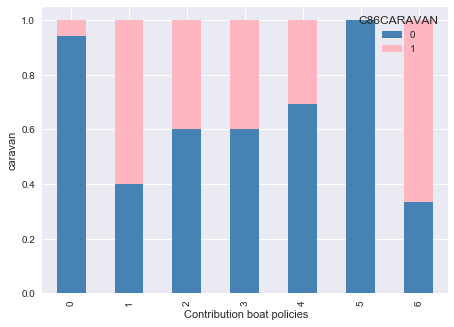

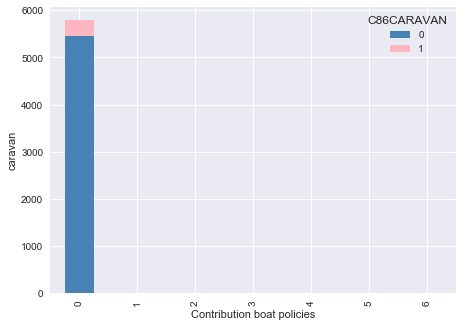

In [68]:
num_car_caravan = pd.crosstab(Train['C61PPLEZIER'], Train['C86CARAVAN'])
num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan_pct.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel(' Contribution boat policies')
plt.ylabel('caravan')


num_car_caravan = pd.crosstab(Train['C61PPLEZIER'], Train['C86CARAVAN'])
#num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
num_car_caravan.plot(kind='bar', stacked=True, color = ['steelblue', 'lightpink'], grid=True)
plt.xlabel('Contribution boat policies')
plt.ylabel('caravan')

#num_car_caravan = pd.crosstab(Train['C68APERSAUT'], Train['C86CARAVAN'])
##num_car_caravan_pct = num_car_caravan.div(num_car_caravan.sum(1).astype(float), axis=0)
#num_car_caravan.plot.pie(subplots=True)
#plt.xlabel('Number of car policies')
#plt.ylabel('caravan')
print Train['C61PPLEZIER'].value_counts()
print pd.crosstab(Train['C61PPLEZIER'], Train['C86CARAVAN'])